## Piecewise and Spline Regression Models
A piecewise function is a function that is defined on a sequence of intervals
In mathematics, a spline is a special function defined piecewise by polynomials

#### the Goal of this Project:
1. In the ask phase - wrote a clear statement of the business task: Is there a better way to model the NBA dataset to produce a better model that predicts points score3d by the NBA teams based on various attribures collected/provided.

2. In the prepare phase - you described the data sources you used: This data was provided by a anonymous sports agency that does not want to be identified due to potential liability. The data provides different data point like Point_Scored, Weightlifting, Yoga_Sessions, Laps_Run, Water_Intake and Player_Absent.

3. In the process phase - you documented your data cleaning and manipulation: The approach I took with this data is the following: 
* Data Reading
* Data Preprocessing
** Outlier Removal
** One Hot Encoding
** Imputing Missing Values
* Model Building
** Linear Regression
** Polynomial Regression
** Step Functions
** Piecewise Regression
** Basic Functions
** Spline Regression
  ** Univariate Model
  ** Bivariate Model
  ** Multivariate Adaptive Regression Splines (MARS) model
* Model Evaluation and Comparison
* Experiment Tracking with ML Foundry

In the analyze phase - you write a summary of your analysis: Analysis of this project will be found at the end of the project. 

In [1]:
#Import Libraries
import pandas as pd #data frame opertations
import numpy as np #arrays and math functions
import scipy as sp #scientific computing and technical computing
import matplotlib.pyplot as plt # comprehensive library for creating static, animated, and interactive visualizations 
%matplotlib inline #makes the plots generated by matplotlib show into the IPython shell 
import seaborn as sns #data visualization library based on matplotlibrary based on matplotlib

UsageError: unrecognized arguments: #makes the plots generated by matplotlib show into the IPython shell


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#upload the dataframe as df
data = pd.read_csv('NBA_Dataset_csv.csv')

In [4]:
#explore Data/familiarize with what we are working with
data.head(25)

Team  Points_Scored  Weightlifting_Sessions_Average  \
0   Lakers            242                            23.0   
1   Lakers            144                            24.0   
2   Lakers            156                            24.0   
3   Lakers            159                            26.0   
4   Lakers            106                            27.0   
5   Lakers             97                            27.0   
6   Lakers            158                            27.0   
7   Lakers            110                            28.0   
8   Lakers            154                       1111111.0   
9   Lakers            147                            29.0   
10  Lakers            140                            28.0   
11  Lakers            147                            29.0   
12  Lakers            104                            29.0   
13  Lakers            168                            30.0   
14  Lakers            148                            29.0   
15  Lakers            149                            29.0   
16  Lakers            134                            30.0   
17  Lakers            147                            30.0   
18  Lakers            155                             NaN   
19  Lakers            136                             NaN   
20  Lakers            166                             NaN   
21  Lakers            168                             NaN   
22  Lakers            102                             NaN   
23  Lakers            124                             NaN   
24  Lakers            159                            32.0   

    Yoga_Sessions_Average  Laps_Run_Per_Practice_Average  Water_Intake  \
0                    25.0                           30.0           5.0   
1                    26.0                           31.0           5.0   
2                    27.0                           31.0           5.0   
3                    29.0                           34.0           5.0   
4                     NaN                           34.0           5.0   
5                     NaN                           35.0           5.0   
6                     NaN                           35.0           6.0   
7                     NaN                           35.0           5.0   
8                     NaN                           35.0           6.0   
9                    26.0                           36.0           6.0   
10                   21.0                           36.0           6.0   
11                   20.0                           36.0           6.0   
12                   21.0                           36.0           6.0   
13                   27.0                           37.0           6.0   
14                   22.0                           37.0           6.0   
15                   25.0                           37.0           6.0   
16                   23.0                            NaN           6.0   
17                   25.0                           39.0           6.0   
18                   28.0                           39.0           6.0   
19                   23.0                           39.0           6.0   
20                   24.0                           40.0           6.0   
21                   25.0                           39.0           6.0   
22                   26.0                           40.0           6.0   
23                   25.0                           41.0           6.0   
24                   27.0                           41.0           6.0   

    Players_Absent_For_Sessions  
0                           4.0  
1                           8.0  
2                           7.0  
3                           1.0  
4                           6.0  
5                           1.0  
6                           3.0  
7                           7.0  
8                           8.0  
9                           NaN  
10                          NaN  
11                          NaN  
12                          NaN  
13                

This data presents information on the performance and fitness metrics of a basketball teams,  The data includes seven columns:
Team: Indicates the name of the teams, which is the Lakers in this case.
Points_Scored: Indicates the number of points the teams scored in a given practice.
Weightlifting_Sessions_Average: Indicates the average number of weightlifting sessions completed by players in a given practice.
Yoga_Sessions_Average: Indicates the average number of yoga sessions completed by players in a given practice.
Laps_Run_Per_Practice_Average: Indicates the average number of laps run by players in a given practice.
Water_Intake: Indicates the amount of water (in liters) consumed by players in a given practice.
Players_Absent_For_Sessions: Indicates the number of players who were absent for a given practice.
The data contains missing values denoted by "NaN" in some cells. Overall, the data provides a snapshot of the team's performance and fitness levels over the course of several practices.

In [5]:
#determine the dimensions of the dataframe
print('Dimension of the dataframe is= ', data.shape)

Dimension of the dataframe is=  (159, 7)


The pandas library provides a columns attribute for accessing the column labels of a DataFrame. This attribute is commonly used to either list the names of the columns or access specific columns by name.

The columns attribute plays a crucial role in data exploration and cleaning by enabling easy access and manipulation of specific columns in a DataFrame.

the columns attribute is a valuable tool for working with the columns of a DataFrame in the pandas library, providing a simple and effective way to explore and manipulate data.

In [6]:
#determine which columns are needed to be worked with
data.columns

Index(['Team', 'Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions'],
      dtype='object')

The info() method is a member of the DataFrame class within the pandas library, a tool used for data manipulation and analysis in Python. It provides a summary of the information contained in a DataFrame, including the data types of each column, the number of non-null values in each column, and the memory usage of the DataFrame.

By using the info() method, you can easily identify missing values, data types, and other issues that require attention before further analysis or modeling. This makes the method a helpful tool for data exploration and cleaning.

the info() method within the pandas library is an efficient and beneficial tool that assists in obtaining a comprehensive summary of the data within a DataFrame, and can enable better comprehension of the structure and content of the data.

In [7]:
#Determine what dtypes of columns are you working with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


The pandas library includes a method called rename(), which enables the renaming of labels within a DataFrame. Within the code provided, the rename() method has been utilized to rename the columns of a DataFrame by providing a mapping of old column names to new column names using a dictionary.

In data exploration and cleaning, the rename() method is frequently utilized to modify column names, making them more meaningful or easier to handle.

the rename() method in the pandas library provides a valuable tool for renaming labels within a DataFrame, specifically for the columns in this case. As such, it is a valuable asset in data exploration and cleaning.

In [8]:
#shorten column names by renaming
df = data.rename(columns={'Points_Scored' : 'PS', 'Weightlifting_Sessions_Average' : 'WL', 'Yoga_Sessions_Average' : 'YS', 'Laps_Run_Per_Practice_Average' : 'LRPP',
                        'Water_Intake' : 'WI', 'Players_Absent_For_Sessions' : 'PAFS'})

In [9]:
#check to ensure that the column names have changed
df.head()

Team   PS    WL    YS  LRPP   WI  PAFS
0  Lakers  242  23.0  25.0  30.0  5.0   4.0
1  Lakers  144  24.0  26.0  31.0  5.0   8.0
2  Lakers  156  24.0  27.0  31.0  5.0   7.0
3  Lakers  159  26.0  29.0  34.0  5.0   1.0
4  Lakers  106  27.0   NaN  34.0  5.0   6.0

In [10]:
#Start creating a distribution plot by determining what type of information is in the PS column
#Column holds int64 information

df.PS

0      242
1      144
2      156
3      159
4      106
      ... 
154     12
155     13
156     12
157     20
158      0
Name: PS, Length: 159, dtype: int64

In [11]:
#kept getting an error that sns was not defined by the import of seaborn that I did at the beginning of this project. 
#reinstalled it here and it seemed to work. 
import seaborn as sns

The seaborn library includes the distplot() function, which is designed to graphically depict the distribution of a dataset. The function achieves this by creating a histogram of the data and fitting a probability density function (PDF) or kernel density estimate (KDE) to the data.

In the provided code, the distplot() function is utilized to plot a histogram and fit a KDE of the PS column in the DataFrame named df. The output is saved to the variable ax.

Data exploration and visualization often employ the distplot() function, allowing for the identification of trends and patterns in the distribution of the dataset.

In conclusion, the distplot() function included in the seaborn library is an effective and useful tool for visually illustrating the distribution of a dataset.

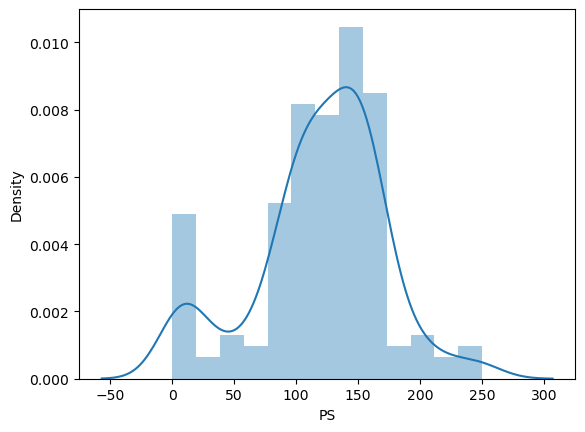

In [12]:
#DistPlot - A plotting function that combines matplolib histogram and a kernel density plot together. Smoothens out the histogram that we built and gives us a gerenal understanding of the shape of distribution
#sns.displot(df.PS) --> use this if the below code gives error
#highest density of points are around 150
#notice that there are a couple of values are near zero

ax = sns.distplot(df.PS)


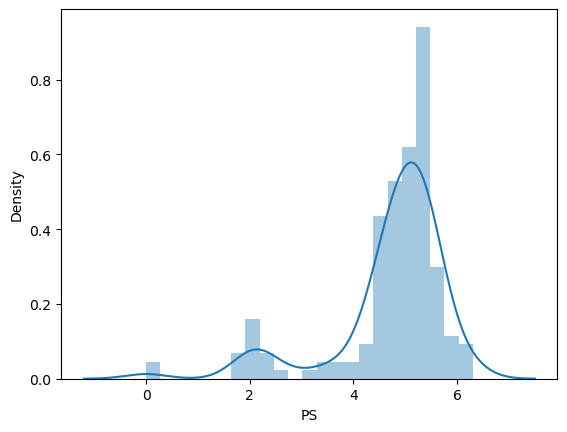

In [13]:
# tried using a ax = sns.distplot(np.log(df.PS)) but ran into an error because the log of 0 is undefined.
#that is why i used the cubed root (cbrt) for this graph.
ax =sns.distplot(np.cbrt(df.PS))

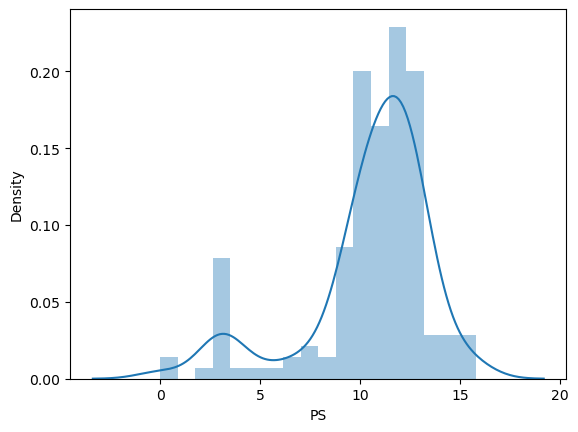

In [14]:
#Wanted to comapre the distplot cubed root with a distplot sqrt root to determine if there are any obvious differences.
#notice that the distplot sqrt verison is slightly smoother then the distplot cubed root(cbrt) 
ax = sns.distplot(np.sqrt(df.PS))

<AxesSubplot:xlabel='PS'>

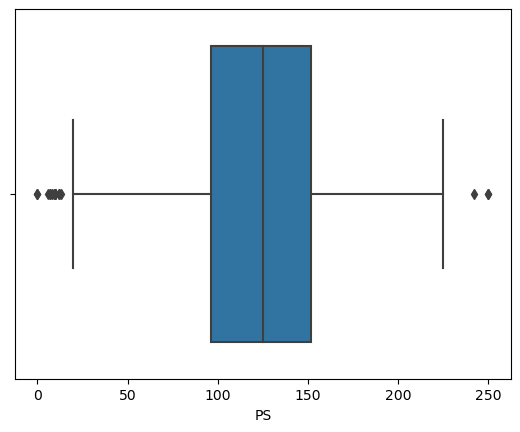

In [15]:
#boxplot visualization to see if there are any outliers
#I noticed that there were multiple outliers on bothends of the spectrum
#remember that outliers tell a story as well
sns.boxplot(df.PS)

Notice all the outliers. What is their impact on the effcacy of the information that we are gathering?

In [16]:
# I just wanted to see if there obvious outliers
# Notice that the data outliers span multiple teams and columns
df.head(100)

Team   PS    WL    YS  LRPP   WI  PAFS
0         Lakers  242  23.0  25.0  30.0  5.0   4.0
1         Lakers  144  24.0  26.0  31.0  5.0   8.0
2         Lakers  156  24.0  27.0  31.0  5.0   7.0
3         Lakers  159  26.0  29.0  34.0  5.0   1.0
4         Lakers  106  27.0   NaN  34.0  5.0   6.0
..           ...  ...   ...   ...   ...  ...   ...
95  Trailblazers  170  22.0  13.0  25.0  3.0   5.0
96  Trailblazers  225  22.0  15.0  26.0  3.0   5.0
97  Trailblazers  145  22.0  19.0  26.0  3.0   7.0
98  Trailblazers  188  23.0  19.0  26.0  3.0   1.0
99  Trailblazers  180  23.0  15.0  27.0  3.0   5.0

[100 rows x 7 columns]

In [17]:
# Creating a box plot and a violin plot function to determine how density and location of data points and outliers.
# This function is set up for each column
# Notice that WL column Violin and Box plot are distorted due to an outlier 
def plotting_box_violin_plots(df,x,y):
    fig,axes = plt.subplots(1,2,figsize=(18,10))
    fig.suptitle("Violin and Box Plots For Variable : {}" .format(y))

    sns.violinplot(ax=axes[0], x=x, y=y, data=df)
    sns.boxplot(ax=axes[1], data=df[y])
    
    axes[0].set_title("Violin Plots For Variable : {}" .format(y))
    axes[1].set_title("Box Plot For Variable : {}" .format(y))

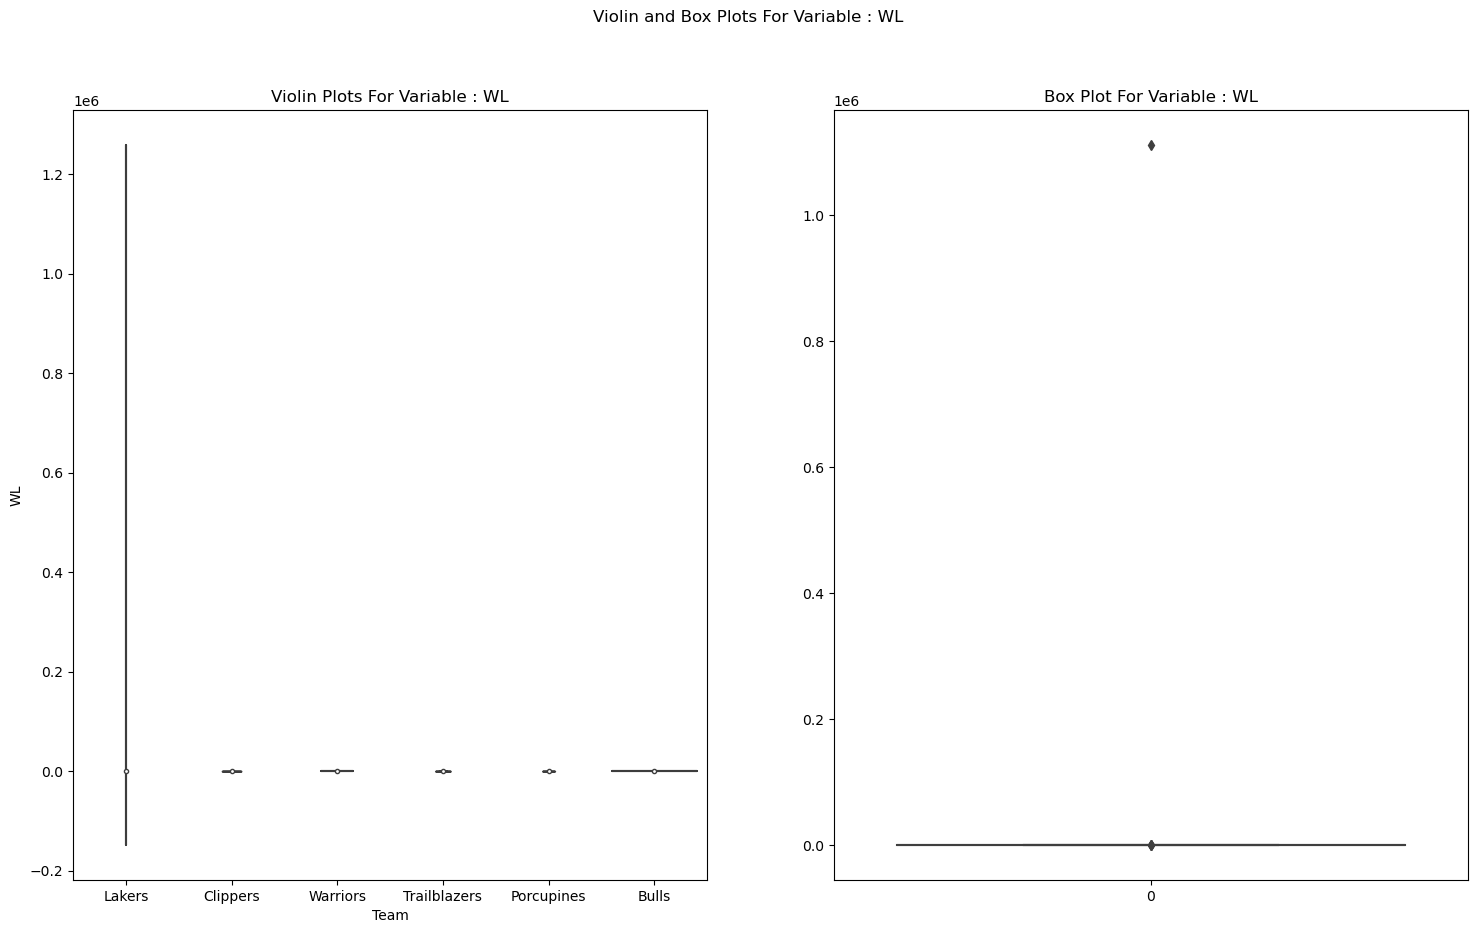

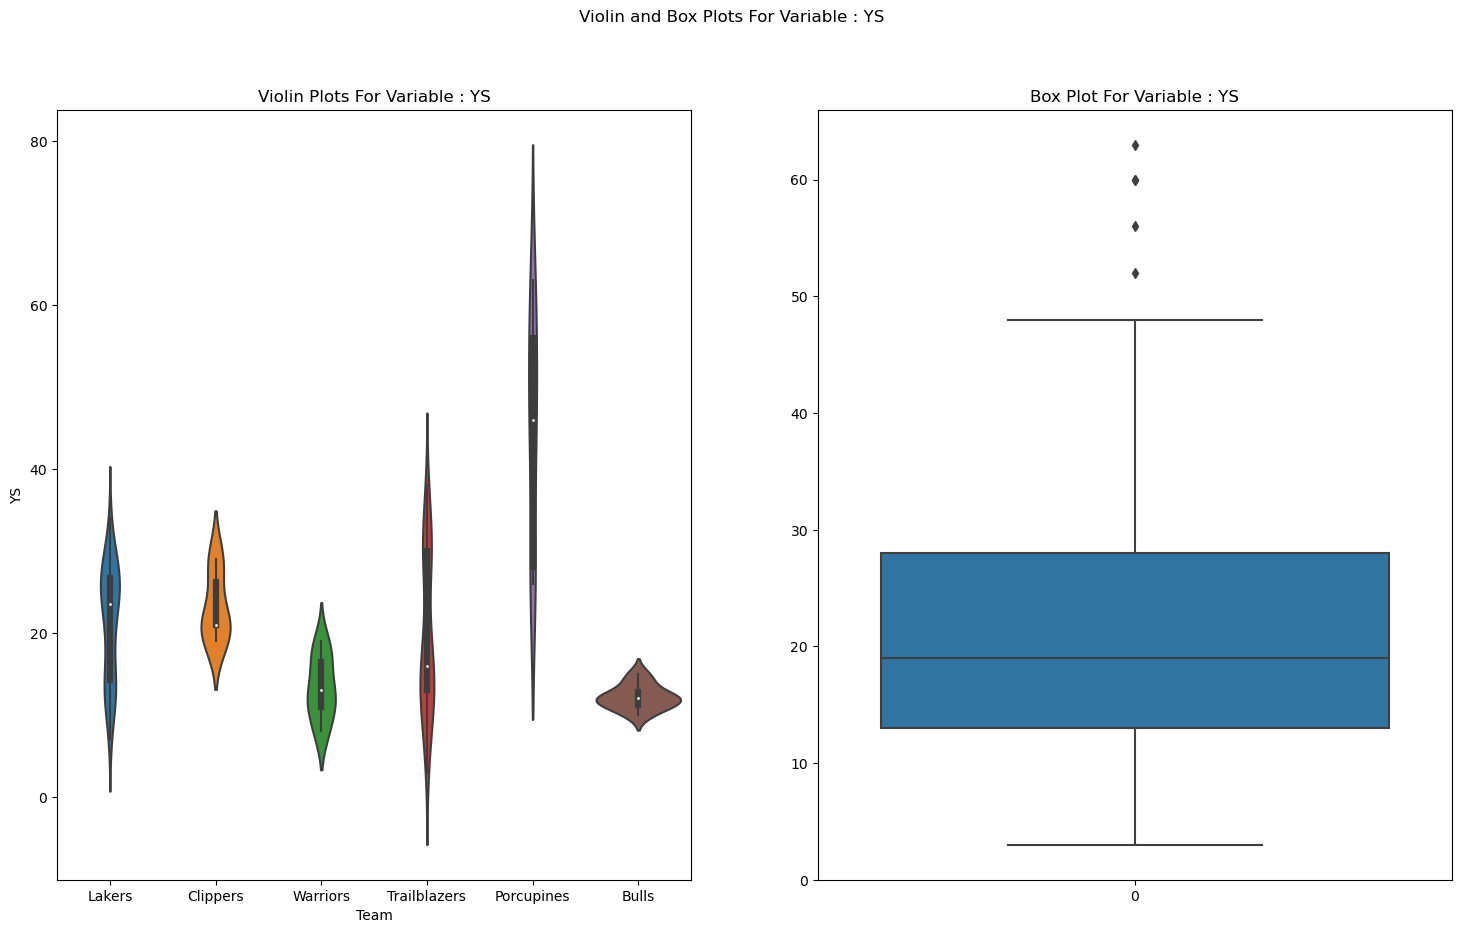

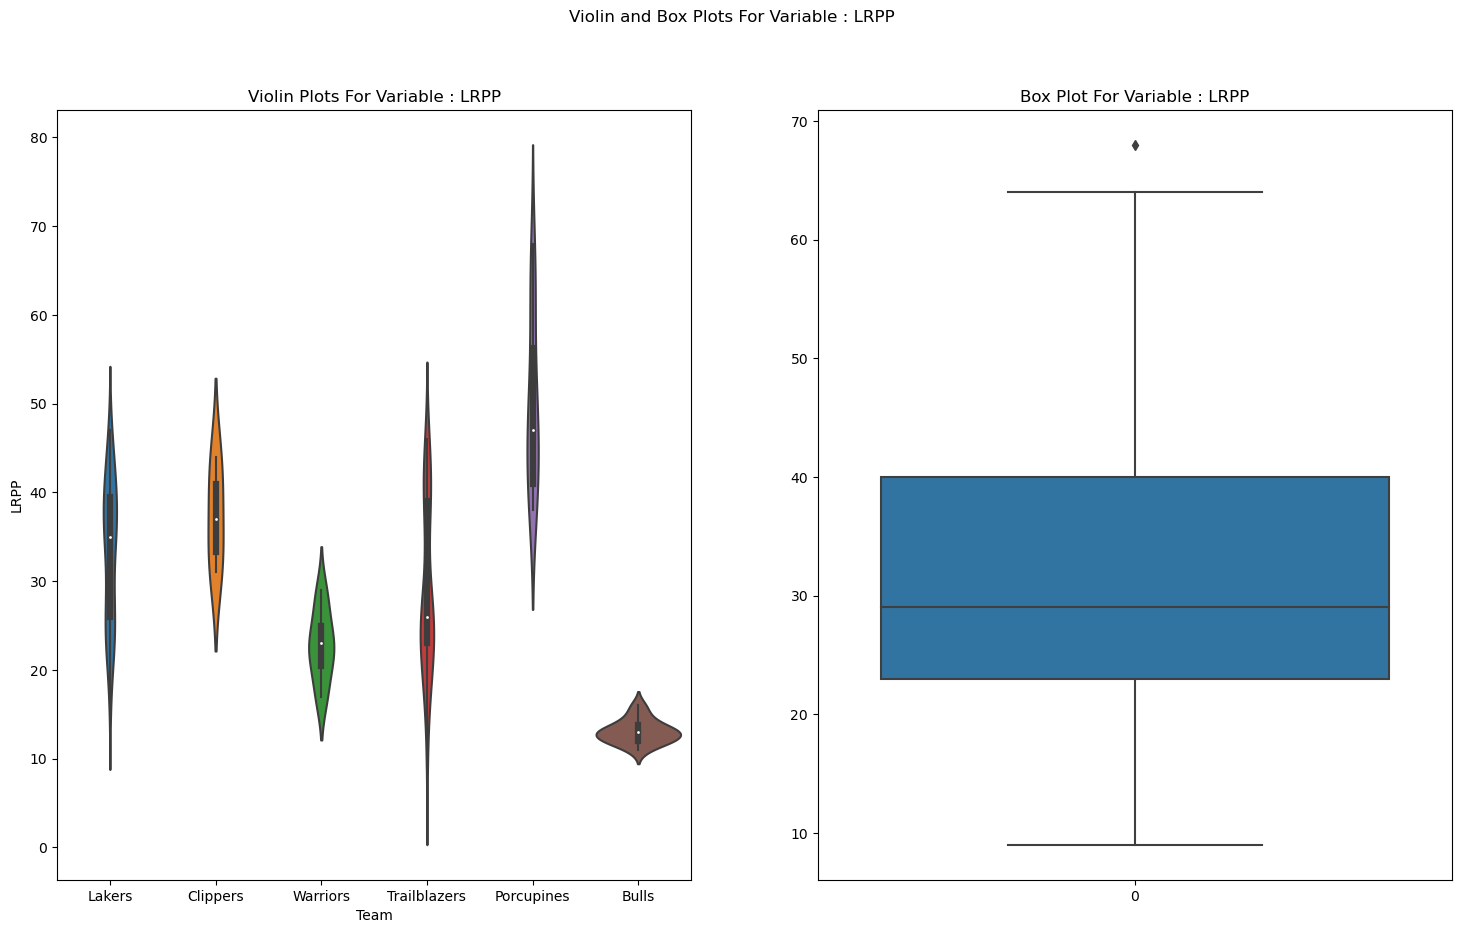

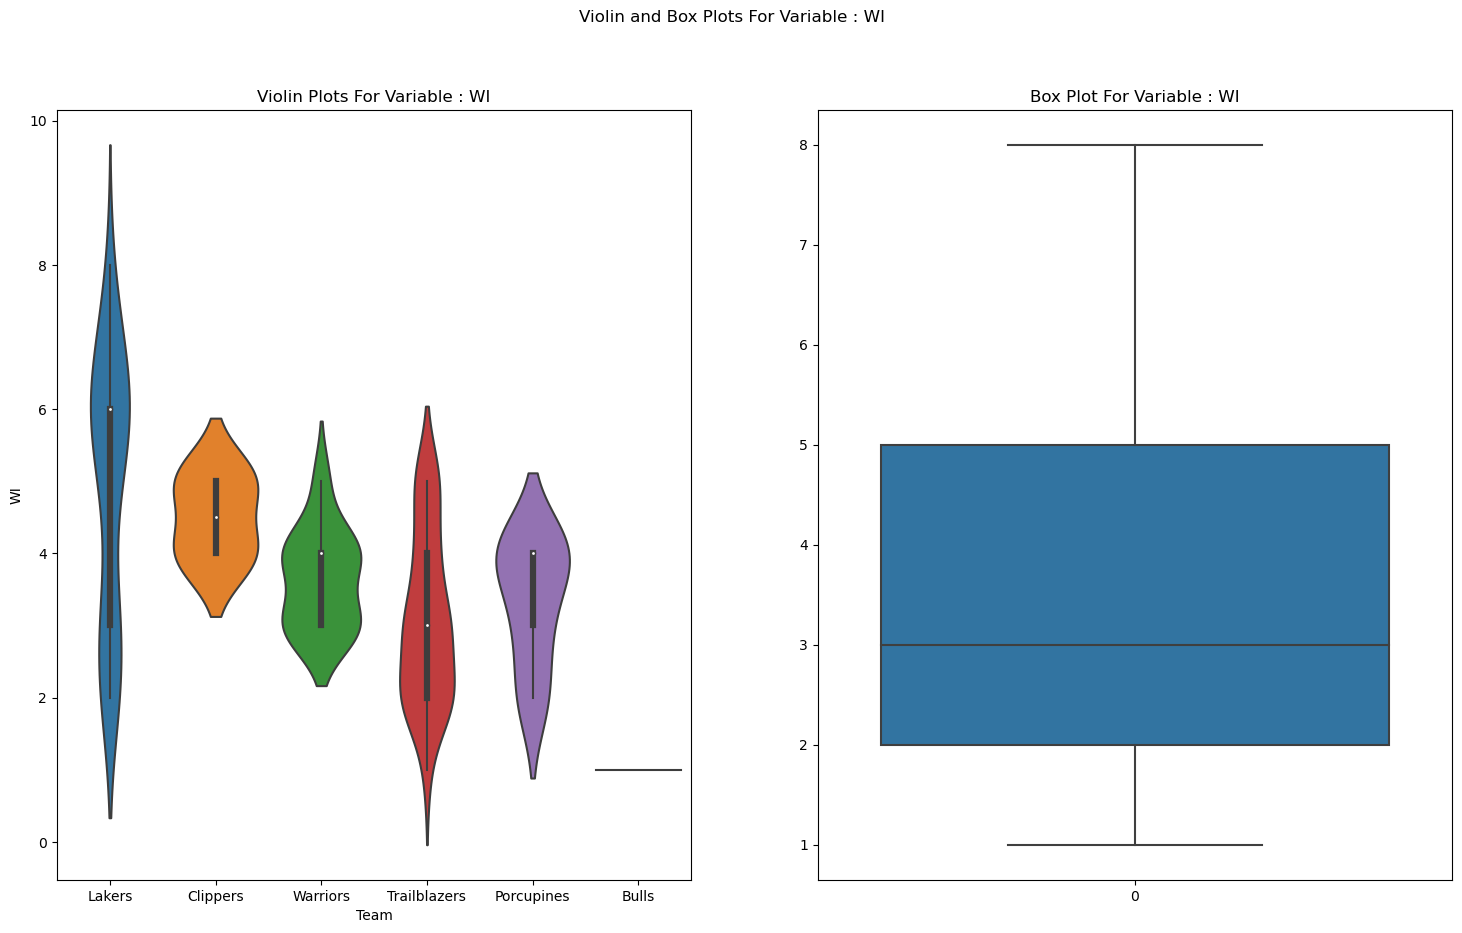

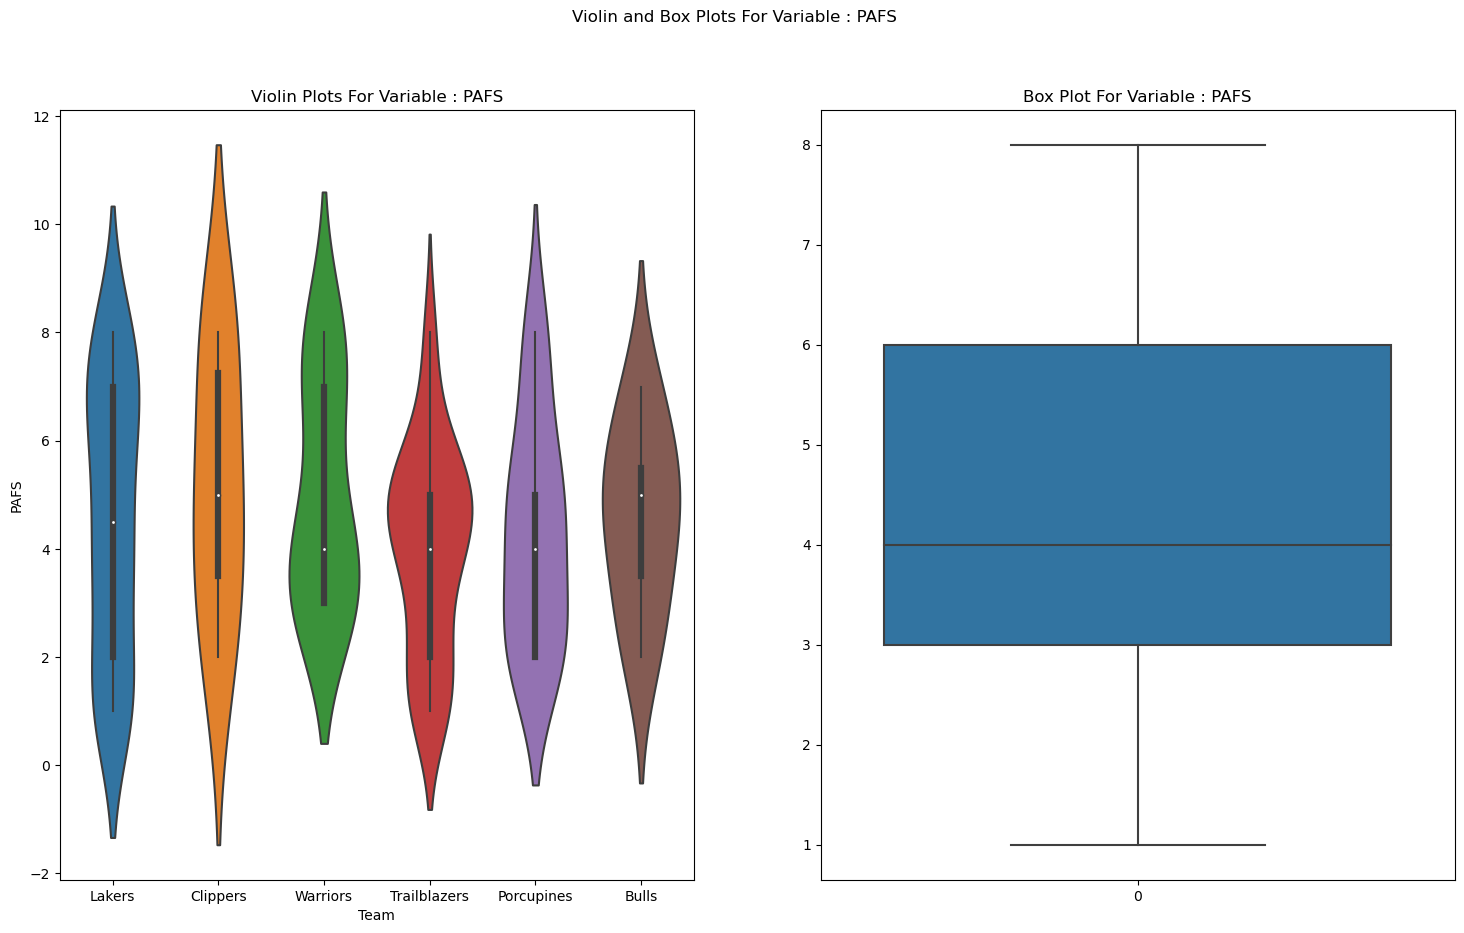

In [18]:
for x in['WL', 'YS', 'LRPP', 'WI', 'PAFS']:
    plotting_box_violin_plots(df,"Team", x)

By creating a custom function called "find_outliers" I will be able to better identify the impact of the outliers within a DataFrame. The function takes two arguments: the DataFrame and the name of the column to be analyzed.

Within the function, the first step is to calculate the first quartile (Q1) and third quartile (Q3) values for the specified column using the quantile() method. These values are used to compute the interquartile range (IQR) of the data.

Next, the function calculates the upper and lower ends of the acceptable range of data values. Any data points that fall outside this range are considered to be outliers. In this case, the function defines outliers as any observation that is more than 1.5 IQR above Q3 or more than 1.5 IQR below Q1.

Finally, the function selects any data points that are considered to be outliers according to the specified criteria and returns them as output.

Overall, this function helps in the identification of outliers within a DataFrame by defining parameters on what classifies an outlier based on the interquartile range. It provides a customized and flexible way to identify outliers and can be used for data cleaning and further analysis.

In [19]:
#function for finding out outliers by defining the parameters on what classifies an outlier using the Q1 to Q3
#setermined that any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.
# some use 2 IQR or even 3 IQR
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    Upper_End = Q3+1.5*IQR
    Lower_End = Q1-1.5*IQR
    
    outlier = df[column][(df[column]>Upper_End) | (df[column]<Lower_End) ]
    
    return outlier

In [20]:
#Run the above function across are columns to determine outliers
#notice WL columns 8, 142, 143, 144 are outliers
#notice YS columns 140, 141, 142, 143, 144 are outliers
#notice LRP columns 144 is an outlier
#notice WI, and PAFS do nt have any outliers
for column in ['WL', 'YS', 'LRPP', 'WI', 'PAFS']:
    print ('\n Outliers in column "%s"' %column)
    
    outlier = find_outliers(df, column)
    print(outlier)


 Outliers in column "WL"
8      1111111.0
142         56.0
143         56.0
144         59.0
Name: WL, dtype: float64

 Outliers in column "YS"
140    52.0
141    56.0
142    60.0
143    60.0
144    63.0
Name: YS, dtype: float64

 Outliers in column "LRPP"
144    68.0
Name: LRPP, dtype: float64

 Outliers in column "WI"
Series([], Name: WI, dtype: float64)

 Outliers in column "PAFS"
Series([], Name: PAFS, dtype: float64)


This data describes the presence of outliers in five different columns, "WL", "YS", "LRPP", "WI", and "PAFS".

For the "WL" column, there are four identified outliers, with values of 1111111.0, 56.0, 56.0, and 59.0.

For the "YS" column, there are five identified outliers, with values of 52.0, 56.0, 60.0, 60.0, and 63.0.

In the "LRPP" column, there is one identified outlier with a value of 68.0.

For the "WI" and "PAFS" columns, there are no identified outliers. This means that there are no values that are unusually high or low, beyond a specific range in these columns.

Overall, the data suggests that there are some outliers present in certain columns, which may require further investigation or cleaning before conducting further analysis. The lack of outliers in the "WI" and "PAFS" columns, on the other hand, may indicate that the data in these columns is relatively well-behaved, with values that are consistent with the overall range of the data.

In [21]:
#Confirming column names
df.columns

Index(['Team', 'PS', 'WL', 'YS', 'LRPP', 'WI', 'PAFS'], dtype='object')

In [22]:
#removing observation outliers 142, 143, 144
df_clean=df.drop([142,143,144])

In [23]:
#ensure that observations with determined outliers have been removed. Went from 159 observations to 156 observations
df_clean.shape

(156, 7)

In [24]:
df['WL']

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 159, dtype: float64

In [25]:
#Replacing the 1111111.0 data found in row 8 of the WL column with nan (not a number) for df_clean
df_clean['WL'][df_clean['WL']==1111111.0]=np.nan

In [26]:
df_clean['WL']

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

#### Missing Value Imputation Techniques

In [27]:
#create a dataframe that determines how many data points are missing 
ncounts=pd.DataFrame([df_clean.isna().mean()]).T

In [28]:
#See the percentage of data points missing 
#Notice that Team and PS are not missing anydata points, while PAFS is missing 18.5% 
ncounts

0
Team  0.000000
PS    0.000000
WL    0.064103
YS    0.128205
LRPP  0.089744
WI    0.089744
PAFS  0.185897

<AxesSubplot:title={'center':'% of Missing Values Across Each Column'}>

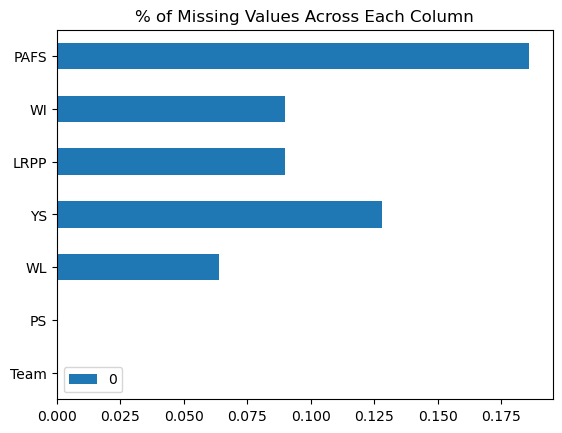

In [29]:
#plot out the percentage of missing points per column
ncounts.plot(kind ='barh', title='% of Missing Values Across Each Column')

#### three ways to fill in missing values
* #1. Pandas -> F fill and B fill, groupby
* #2. Sklearn -> Imputer -> Simple, Iterative, KNN
* #3. LGBM -> To fill in the missing vlaues

the logic that I use when determining if im going to drop a na/nan value. 
General rule I follow is to drop the least amount of data possible.
If missing few values are present from majority class then you can essentially drop them, but be cautious
Do not drop data from minority class

In [30]:
#this does not drop data, but will show you what your dataframe will look like if all observations with na or nan are dropped
#notice that the dataframe will drop from 156 to 94 observations. Not a good approach
df_clean.shape, df_clean.dropna(axis=0).shape

((156, 7), (94, 7))

In [31]:
#this does not drop data, but will show you what your dataframe will look like if columns with na or nan are dropped
#notice that the dataframe will drop from 7 columns to 2 columns. Not a good approach
df_clean.shape, df_clean.dropna(axis=1).shape

((156, 7), (156, 2))

#### Pandas Imputer

In [32]:
#check to see where and how many nulls you have per column
# Team and PS have zero nulls (confirmed)
# WL has 10 null values
# YS has 20 null values
# LRPP and WI has 14 null values
#PAFS has 29 null values

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    156 non-null    object 
 1   PS      156 non-null    int64  
 2   WL      146 non-null    float64
 3   YS      136 non-null    float64
 4   LRPP    142 non-null    float64
 5   WI      142 non-null    float64
 6   PAFS    127 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.8+ KB


In [33]:
#To quickly find the nan values by replacing nan with -1
df_clean['WL'].fillna(-1)

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

In [34]:
df_clean.head(100)

Team   PS    WL    YS  LRPP   WI  PAFS
0         Lakers  242  23.0  25.0  30.0  5.0   4.0
1         Lakers  144  24.0  26.0  31.0  5.0   8.0
2         Lakers  156  24.0  27.0  31.0  5.0   7.0
3         Lakers  159  26.0  29.0  34.0  5.0   1.0
4         Lakers  106  27.0   NaN  34.0  5.0   6.0
..           ...  ...   ...   ...   ...  ...   ...
95  Trailblazers  170  22.0  13.0  25.0  3.0   5.0
96  Trailblazers  225  22.0  15.0  26.0  3.0   5.0
97  Trailblazers  145  22.0  19.0  26.0  3.0   7.0
98  Trailblazers  188  23.0  19.0  26.0  3.0   1.0
99  Trailblazers  180  23.0  15.0  27.0  3.0   5.0

[100 rows x 7 columns]

In [35]:
#Dynamically compute the mean of the
df_clean['WL'].fillna(df_clean['WL'].mean())

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

<AxesSubplot:xlabel='WL', ylabel='Density'>

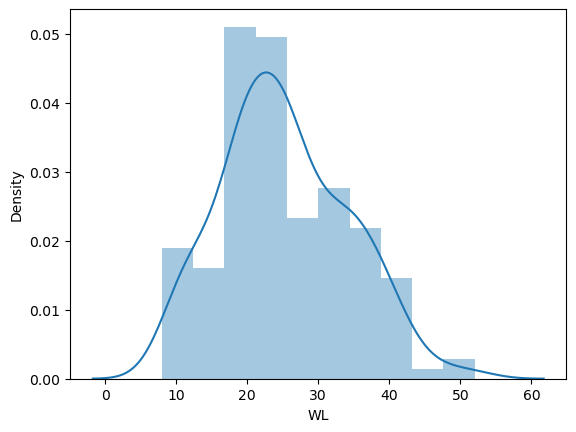

In [36]:
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].mean()))

<AxesSubplot:xlabel='WL', ylabel='Density'>

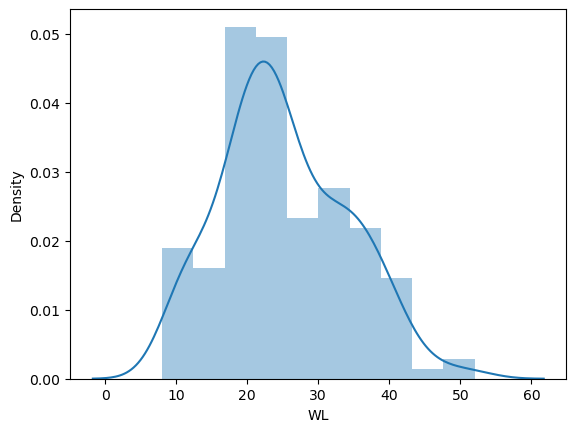

In [37]:
# The median graph will be more suseptiable to the influence of outliers when compared with the mean graph.
# by comparing the mean and the median I was able to determine that the dataframe was skewed in any way.
# the similiarity of both graphs indicate that there are no outliers skewing the results after placing the mean in for the null values.
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].median()))

In [38]:
# mean and median plots combined all teams information together, and does not indicate the mean of each team indivually. 
# To create a more accurate representation, replace nan values with the mean of the team that it is associated with
# Groupby each Team by their mean
mean_WL = df_clean.groupby('Team')['WL'].mean().to_dict() 

In [39]:
# Display the determined mean values 
# Bulls have the lost mean in the weightlifting column while Porcupines have the highest.
mean_WL

{'Bulls': 11.214285714285714,
 'Clippers': 29.0,
 'Lakers': 26.04255319148936,
 'Porcupines': 39.42857142857143,
 'Trailblazers': 25.425925925925927,
 'Warriors': 18.727272727272727}

In [40]:
#create a data frame that measure the mean of each team individually
WL_series = df_clean['WL'].replace(mean_WL)

<AxesSubplot:xlabel='WL', ylabel='Density'>

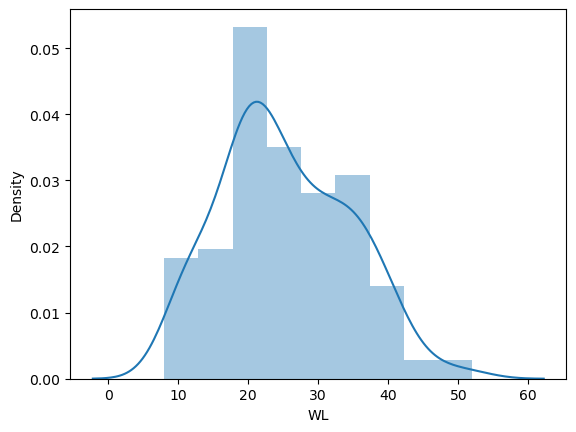

In [41]:
# Create a distplot that gvisually represents that mean of each team. 
# Notice the how the density of 23 to 26 decreased from just under 0.05 to roughly 3.65
sns.distplot(df_clean['WL'].replace(mean_WL))

#### Iterative and KNN Imputer

#1. Simple Imputer -
The SimpleImputer class provides basic strategies for imputing missing values.
Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. 
This class also allows for different missing values encodings.

In [42]:
#1. Simple Imputer
Features = ['WL', 'YS', 'LRPP', 'WI', 'PAFS']
from sklearn.impute import SimpleImputer
impt = SimpleImputer(strategy = 'mean') #here you put mean, median, most frequent or constant

#Fit and Transform
si_impt= impt.fit_transform(df_clean[Features])
si_impt_df = pd.DataFrame(si_impt,columns = Features)

si_impt_df

WL         YS  LRPP   WI      PAFS
0    23.0  25.000000  30.0  5.0  4.000000
1    24.0  26.000000  31.0  5.0  8.000000
2    24.0  27.000000  31.0  5.0  7.000000
3    26.0  29.000000  34.0  5.0  1.000000
4    27.0  20.823529  34.0  5.0  6.000000
..    ...        ...   ...  ...       ...
151  12.0  12.000000  13.0  1.0  4.417323
152  12.0  12.000000  14.0  1.0  4.417323
153  12.0  13.000000  14.0  1.0  4.417323
154  13.0  14.000000  15.0  1.0  6.000000
155  14.0  15.000000  16.0  1.0  5.000000

[156 rows x 5 columns]

A, B, & C ----> Y  #Trying to clarify 

10 NA 20

NA - > regression (A,C) --> To predict B _> Prediciton of B -> Is replaced
Least amount of NA's

Roman -> Right to Left

In [43]:
#Iterative Impute
#The IterativeImputer class is very flexible - 
#it can be used with a variety of estimators to do round-robin regression, treating every variable as an output in turn.
from sklearn.experimental import enable_iterative_imputer

In [44]:
from sklearn.impute import IterativeImputer

ITI = IterativeImputer(max_iter=10) #number of iteration that you want it to run to determine the best value to fit in the null

#Fit and Transform
ITI_impt = ITI.fit_transform(df_clean[Features])

ITI_impt_df = pd.DataFrame(ITI_impt,columns = Features)

ITI_impt_df

WL         YS  LRPP   WI      PAFS
0    23.0  25.000000  30.0  5.0  4.000000
1    24.0  26.000000  31.0  5.0  8.000000
2    24.0  27.000000  31.0  5.0  7.000000
3    26.0  29.000000  34.0  5.0  1.000000
4    27.0  22.063002  34.0  5.0  6.000000
..    ...        ...   ...  ...       ...
151  12.0  12.000000  13.0  1.0  4.413163
152  12.0  12.000000  14.0  1.0  4.413298
153  12.0  13.000000  14.0  1.0  4.413450
154  13.0  14.000000  15.0  1.0  6.000000
155  14.0  15.000000  16.0  1.0  5.000000

[156 rows x 5 columns]

notice that observation 4 has improved

#3. KNN Imputer
Imputation for completing missing values using k-Nearest Neighbors.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [45]:
from sklearn.impute import KNNImputer

KNN = KNNImputer(n_neighbors=3)

#Fit and Transform
KNN_impt = KNN.fit_transform(df_clean[Features])

KNN_impt_df = pd.DataFrame(KNN_impt,columns = Features)

KNN_impt_df

WL         YS  LRPP   WI      PAFS
0    23.0  25.000000  30.0  5.0  4.000000
1    24.0  26.000000  31.0  5.0  8.000000
2    24.0  27.000000  31.0  5.0  7.000000
3    26.0  29.000000  34.0  5.0  1.000000
4    27.0  22.666667  34.0  5.0  6.000000
..    ...        ...   ...  ...       ...
151  12.0  12.000000  13.0  1.0  4.666667
152  12.0  12.000000  14.0  1.0  5.333333
153  12.0  13.000000  14.0  1.0  6.000000
154  13.0  14.000000  15.0  1.0  6.000000
155  14.0  15.000000  16.0  1.0  5.000000

[156 rows x 5 columns]

LGBM Imputer
where I got this code from: https://github.com/analokmaus/kuma_utils

In [46]:
#After cloning the lightgbm from GitHub, I realized that I need to install the lightgbm package 
import subprocess

subprocess.check_call(["pip", "install", "lightgbm"])

0

In [47]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [48]:
#Clone the GitHub REPO to establish a path to the directory
!git clone https://github.com/analokmaus/kuma_utils.git

fatal: destination path 'kuma_utils' already exists and is not an empty directory.


In [49]:
#sys.path is a built-in variable within the sys module. It contains a list of directories that the interpreter will search 
#in for the required module. 
#sys.path is a built-in variable within the sys module. 
#It contains a list of directories that the interpreter will search in for the required module. 
import sys
sys.path.append('kuma_utils.git/')

In [50]:
#Import the LGBMImputer
from kuma_utils.preprocessing.imputer import LGBMImputer

In [51]:
%%time
#set up the function to run with 100 interations
lgbm_itr=LGBMImputer(n_iter=100,verbose=True)

df_itr=lgbm_itr.fit_transform(df_clean[Features])

df_itr_df=pd.DataFrame(df_itr,columns = Features)

  0%|          | 0/5 [00:00<?, ?it/s]

Wall time: 562 ms


In [52]:
df_itr_df

WL         YS  LRPP   WI      PAFS
0    23.0  25.000000  30.0  5.0  4.000000
1    24.0  26.000000  31.0  5.0  8.000000
2    24.0  27.000000  31.0  5.0  7.000000
3    26.0  29.000000  34.0  5.0  1.000000
4    27.0  24.357742  34.0  5.0  6.000000
..    ...        ...   ...  ...       ...
154  12.0  12.000000  13.0  1.0  3.805411
155  12.0  12.000000  14.0  1.0  3.805411
156  12.0  13.000000  14.0  1.0  3.953409
157  13.0  14.000000  15.0  1.0  6.000000
158  14.0  15.000000  16.0  1.0  5.000000

[156 rows x 5 columns]

In [53]:
df_new = df_itr_df

#### Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data. Some ways you can describe patterns found in univariate data include central tendency (mean, mode and median) and dispersion: range , variance, maximum, minimum, quartiles (including the interquartile range), and standard deviation.

In [54]:
df_new.columns

Index(['WL', 'YS', 'LRPP', 'WI', 'PAFS'], dtype='object')

<AxesSubplot:xlabel='WL', ylabel='Density'>

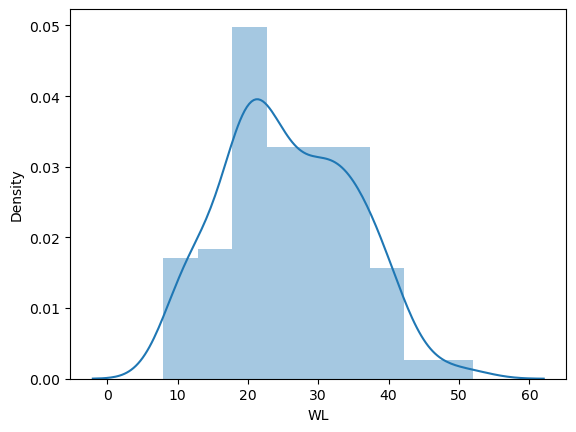

In [55]:
#checking for normal distribution you know who came out with a really good album christmas album whatever that's fully snappy what's the other ones they've got some in Spanish and it's a sensible way what's happening yeah that's why I don't care tucsone they die stay up that Italian or you said so pretty I'm like Shinde and Taylor Stirling is a Spanish blanca Navida spanish is that my page So here how do you **** don't use this one but it's a great book I know I use it I have it on my phone ohh do you ohh I bought it the book there there is about money that I was very helpful like it says it's not about money it's about you yeah it says on this beautiful this is there's no album wait did you know what this family actually no it's not it's not are we tired of Andrea are you are you tired of him I used him for my safe space I had another account i'm going to go back i'll get there
#WL variable
sns.distplot(df_new ['WL'])

<AxesSubplot:xlabel='WL'>

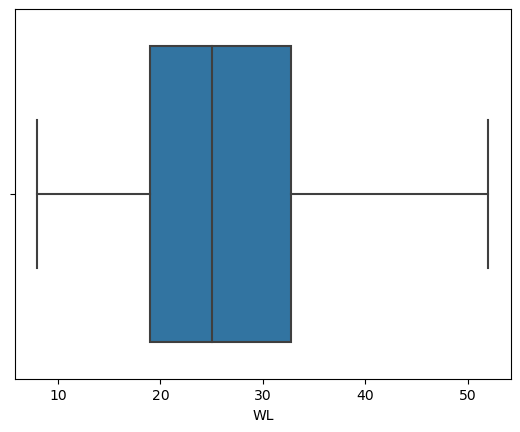

In [56]:
#checking for outliers
sns.boxplot(df_new ['WL'])

<AxesSubplot:>

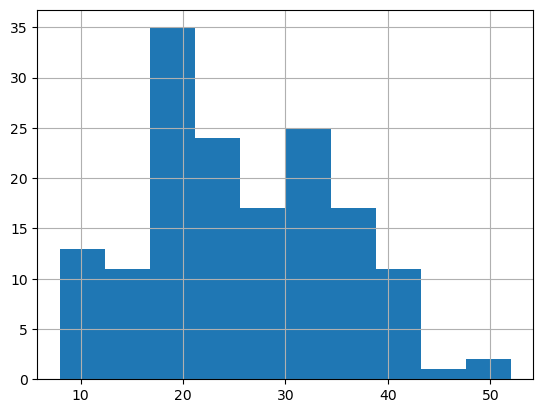

In [57]:
#checking distrobution of dataframe - distributed more to the left
df_new ['WL'].hist()

<AxesSubplot:xlabel='WL', ylabel='Density'>

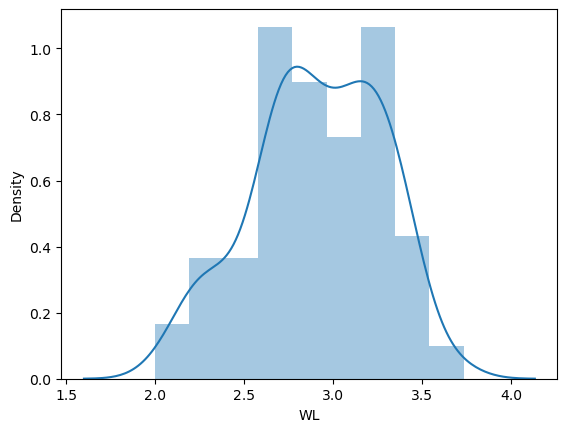

In [58]:
#checking to see if cube root makes the data look better - not great
sns.distplot(np.cbrt(df_new ['WL']))

<AxesSubplot:xlabel='WL', ylabel='Density'>

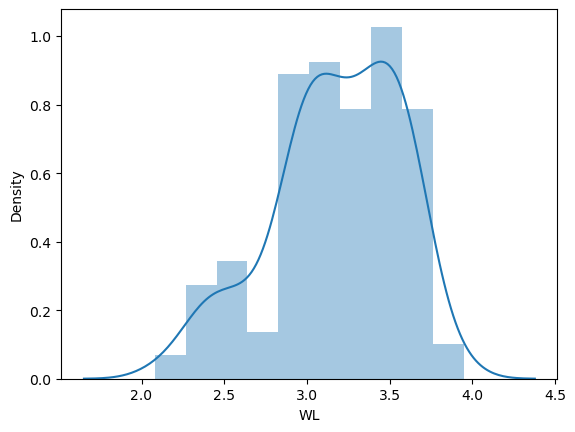

In [59]:
#checking to see if log makes the plot less skewed - not much better
sns.distplot(np.log(df_new ['WL']))

<AxesSubplot:xlabel='WL', ylabel='Density'>

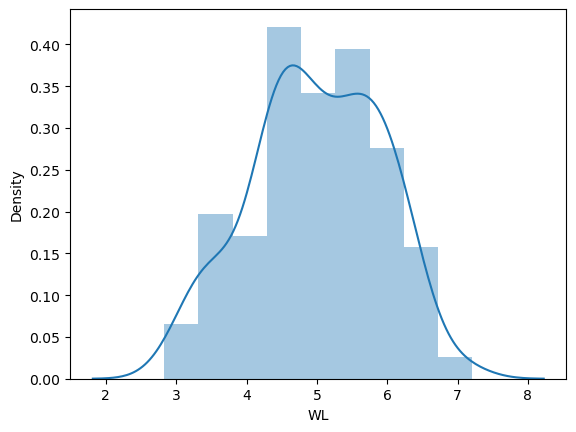

In [60]:
#checking to see if a sqrt makes the data look better - a little better
sns.distplot(np.sqrt(df_new ['WL']))

<AxesSubplot:>

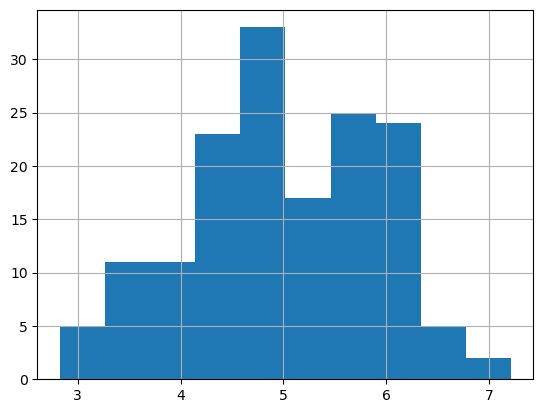

In [61]:
#draw a histogram on top of the sqrt distplot
np.sqrt(df_new['WL']).hist()

<AxesSubplot:>

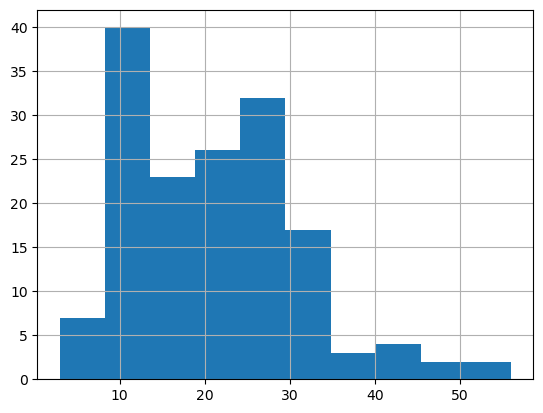

In [62]:
#Yoga Variable
#Check for how skewed the data is - data is pretty skewed to the left
df_new['YS'].hist()

<AxesSubplot:xlabel='YS', ylabel='Density'>

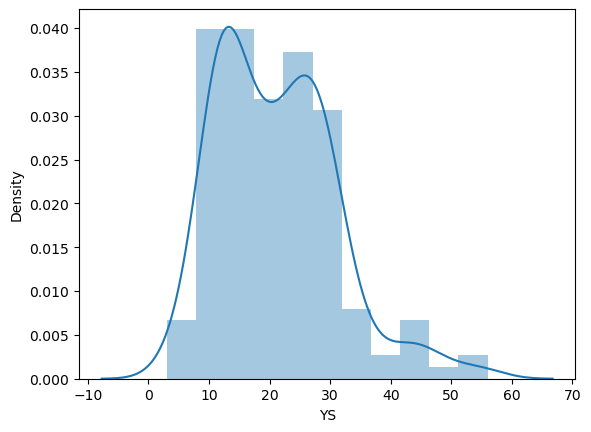

In [63]:
#check to see if cbrt will help the data
sns.distplot(df_new ['YS'])

<AxesSubplot:xlabel='YS', ylabel='Density'>

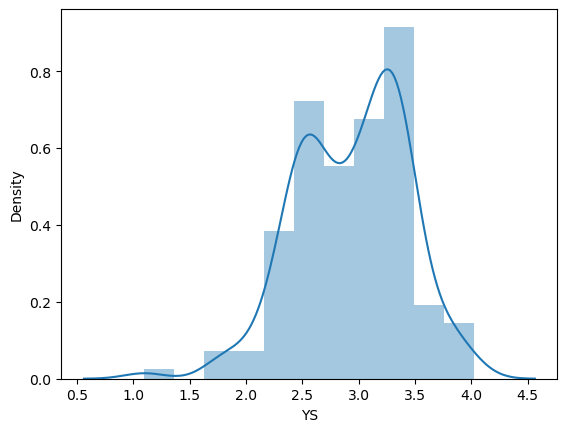

In [64]:
sns.distplot(np.log(df_new ['YS']))

<AxesSubplot:xlabel='YS', ylabel='Density'>

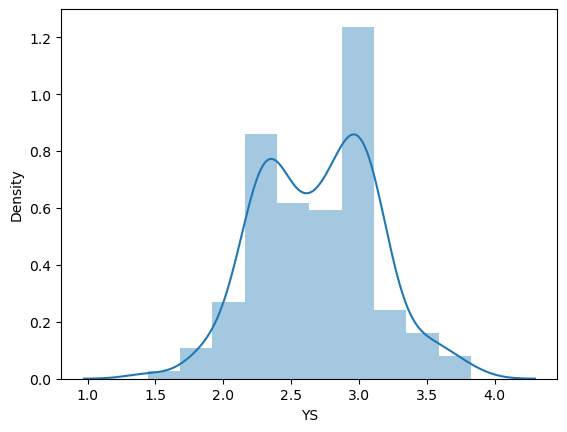

In [65]:
sns.distplot(np.cbrt(df_new ['YS']))

<AxesSubplot:xlabel='YS', ylabel='Density'>

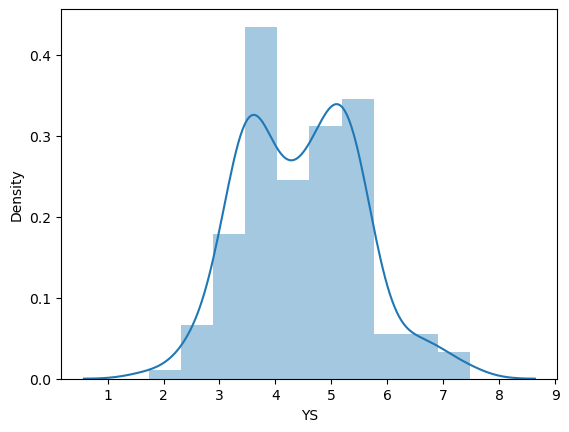

In [66]:
sns.distplot(np.sqrt(df_new ['YS']))

<AxesSubplot:>

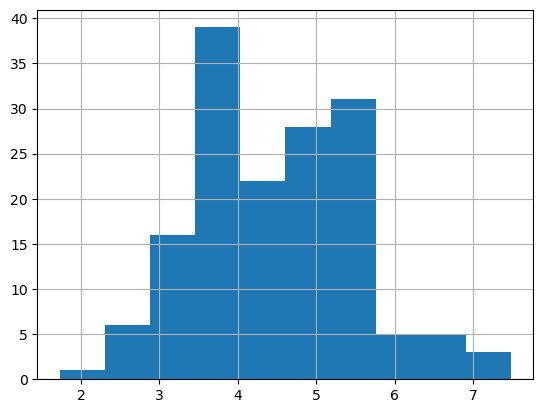

In [67]:
#draw a histogram on top of the sqrt distplot
np.sqrt(df_new['YS']).hist()

<AxesSubplot:>

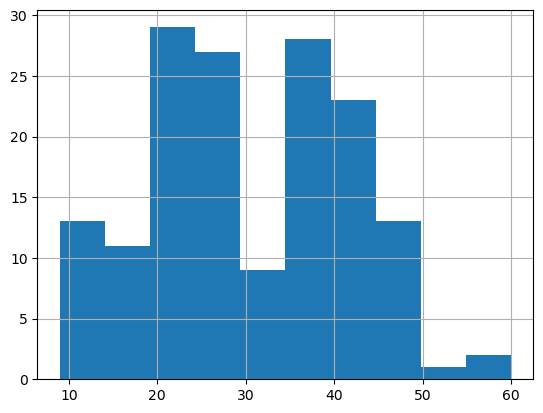

In [68]:
#Laps_Run_Per_Practice_Average Variable
#Check for how skewed the data is - data is pretty skewed to the left
df_new['LRPP'].hist()

<AxesSubplot:xlabel='LRPP', ylabel='Density'>

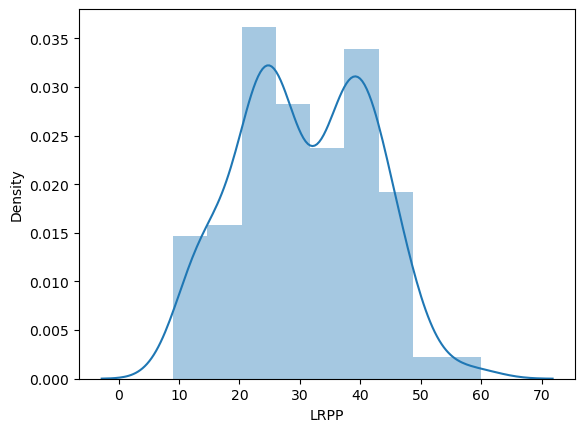

In [69]:
sns.distplot(df_new ['LRPP'])

<AxesSubplot:xlabel='LRPP', ylabel='Density'>

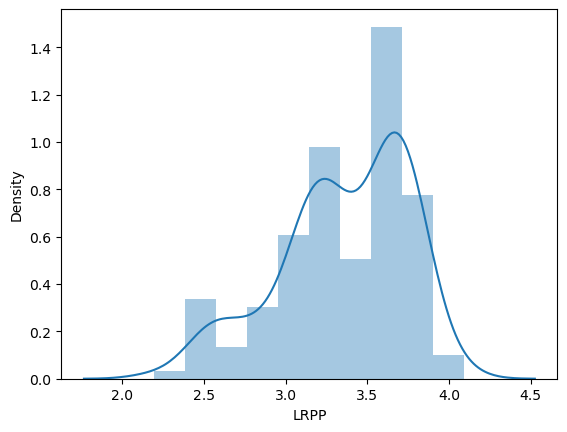

In [70]:
sns.distplot(np.log(df_new ['LRPP']))

<AxesSubplot:xlabel='LRPP', ylabel='Density'>

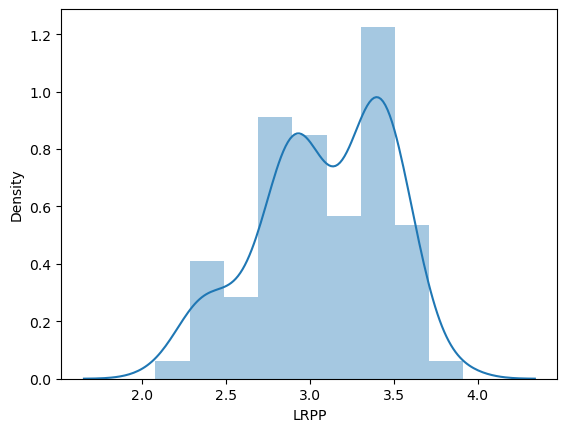

In [71]:
sns.distplot(np.cbrt(df_new ['LRPP']))

<AxesSubplot:xlabel='LRPP', ylabel='Density'>

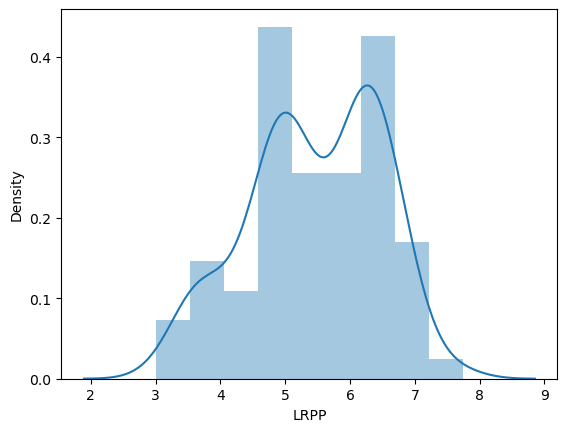

In [72]:
sns.distplot(np.sqrt(df_new ['LRPP']))

<AxesSubplot:>

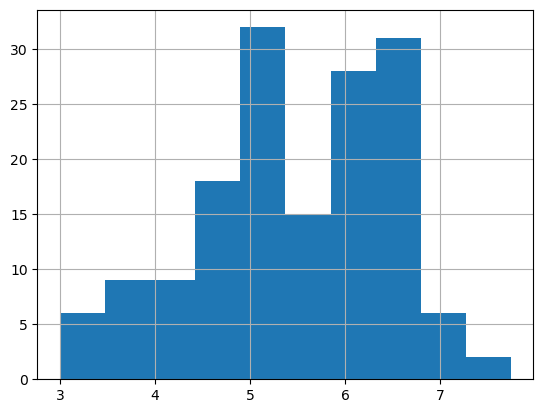

In [73]:
#Laps_Run_Per_Practice_Average Variable
#draw a histogram on top of the sqrt distplot
np.sqrt(df_new['LRPP']).hist()

<AxesSubplot:>

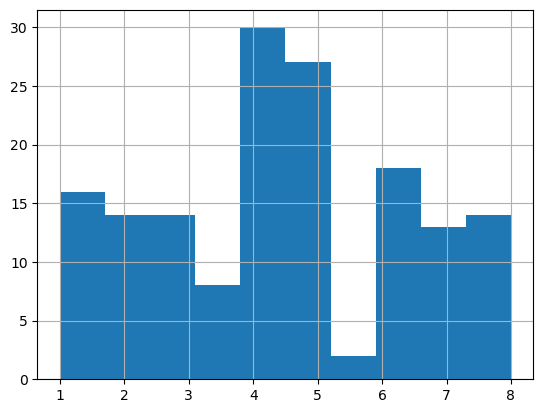

In [74]:
#Players_Absent_For_Sessions
#Check for how skewed the data is - data is pretty skewed to the left
df_new['PAFS'].hist()

<AxesSubplot:xlabel='PAFS', ylabel='Density'>

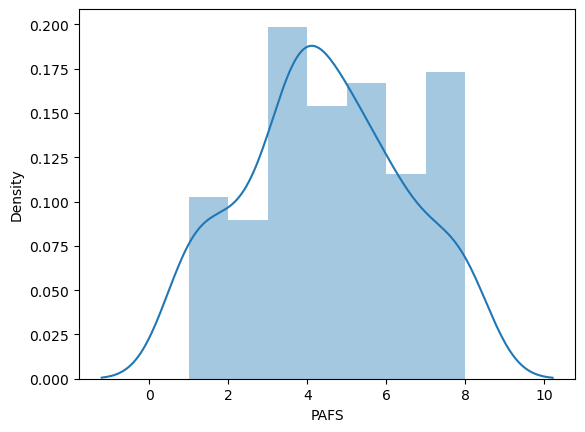

In [75]:
sns.distplot(df_new ['PAFS'])

<AxesSubplot:xlabel='PAFS', ylabel='Density'>

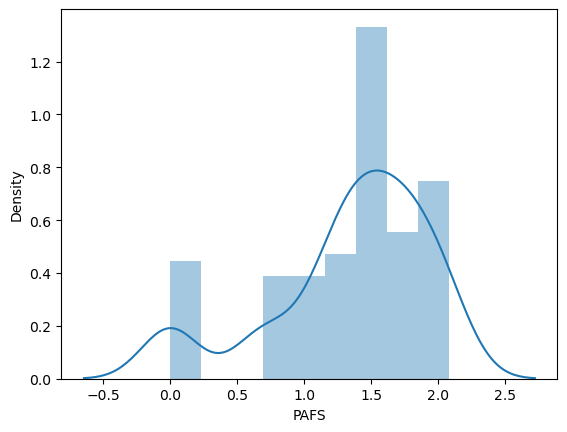

In [76]:
sns.distplot(np.log(df_new ['PAFS']))

<AxesSubplot:xlabel='PAFS', ylabel='Density'>

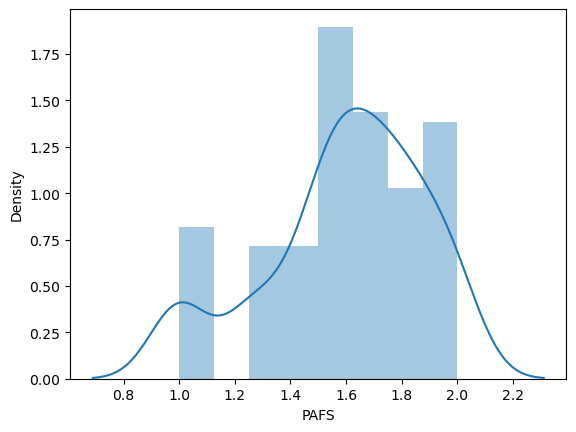

In [77]:
sns.distplot(np.cbrt(df_new ['PAFS']))

<AxesSubplot:xlabel='PAFS', ylabel='Density'>

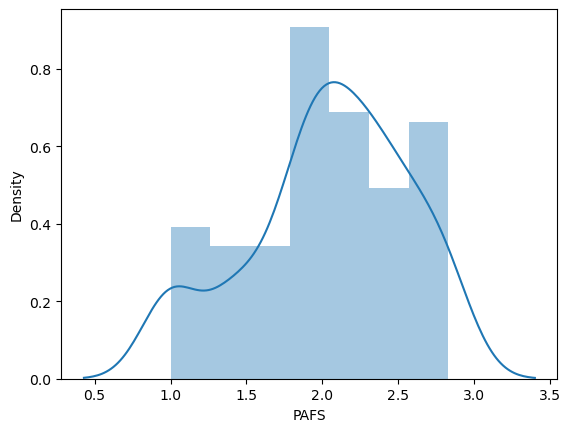

In [78]:
sns.distplot(np.sqrt(df_new ['PAFS']))

<AxesSubplot:>

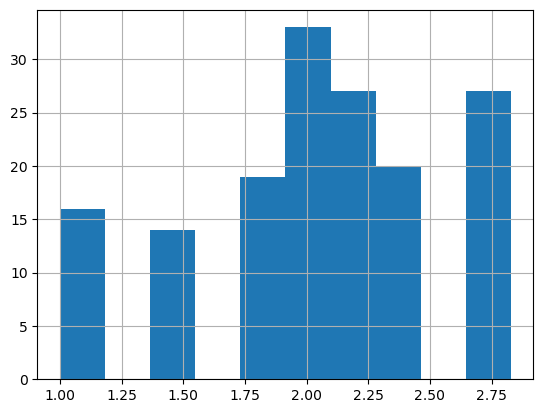

In [79]:
# Players_Absent_For_Sessions Variable
#draw a histogram on top of the sqrt distplot
np.sqrt(df_new['PAFS']).hist()

#### Bivariate Analsis
1. Linear Correlation --> Pearson Corelation

y = x^2

In [80]:
df_clean.shape,df_new.shape

((156, 7), (156, 5))

In [81]:
df_clean.columns

Index(['Team', 'PS', 'WL', 'YS', 'LRPP', 'WI', 'PAFS'], dtype='object')

In [82]:
df_new.columns

Index(['WL', 'YS', 'LRPP', 'WI', 'PAFS'], dtype='object')

In [83]:
df_new['PS']=df_clean['PS']
df_new['Team']=df_clean['Team']

In [84]:
df_new.corr()

WL        YS      LRPP        WI      PAFS        PS
WL    1.000000  0.940899  0.989656  0.716546  0.001012  0.448556
YS    0.940899  1.000000  0.927862  0.617798  0.026512  0.343593
LRPP  0.989656  0.927862  1.000000  0.776036  0.024935  0.479233
WI    0.716546  0.617798  0.776036  1.000000  0.129837  0.425148
PAFS  0.001012  0.026512  0.024935  0.129837  1.000000  0.048566
PS    0.448556  0.343593  0.479233  0.425148  0.048566  1.000000

Text(0.5, 1.0, 'Linear Correlation Matrix')

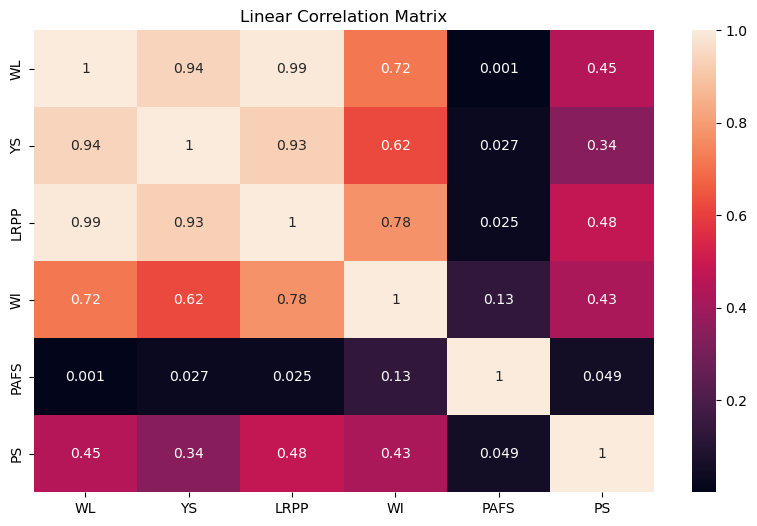

In [85]:
plt.rcParams['figure.figsize']=(10,6)
sns.heatmap(df_new.corr(),annot=True,)

plt.title('Linear Correlation Matrix')

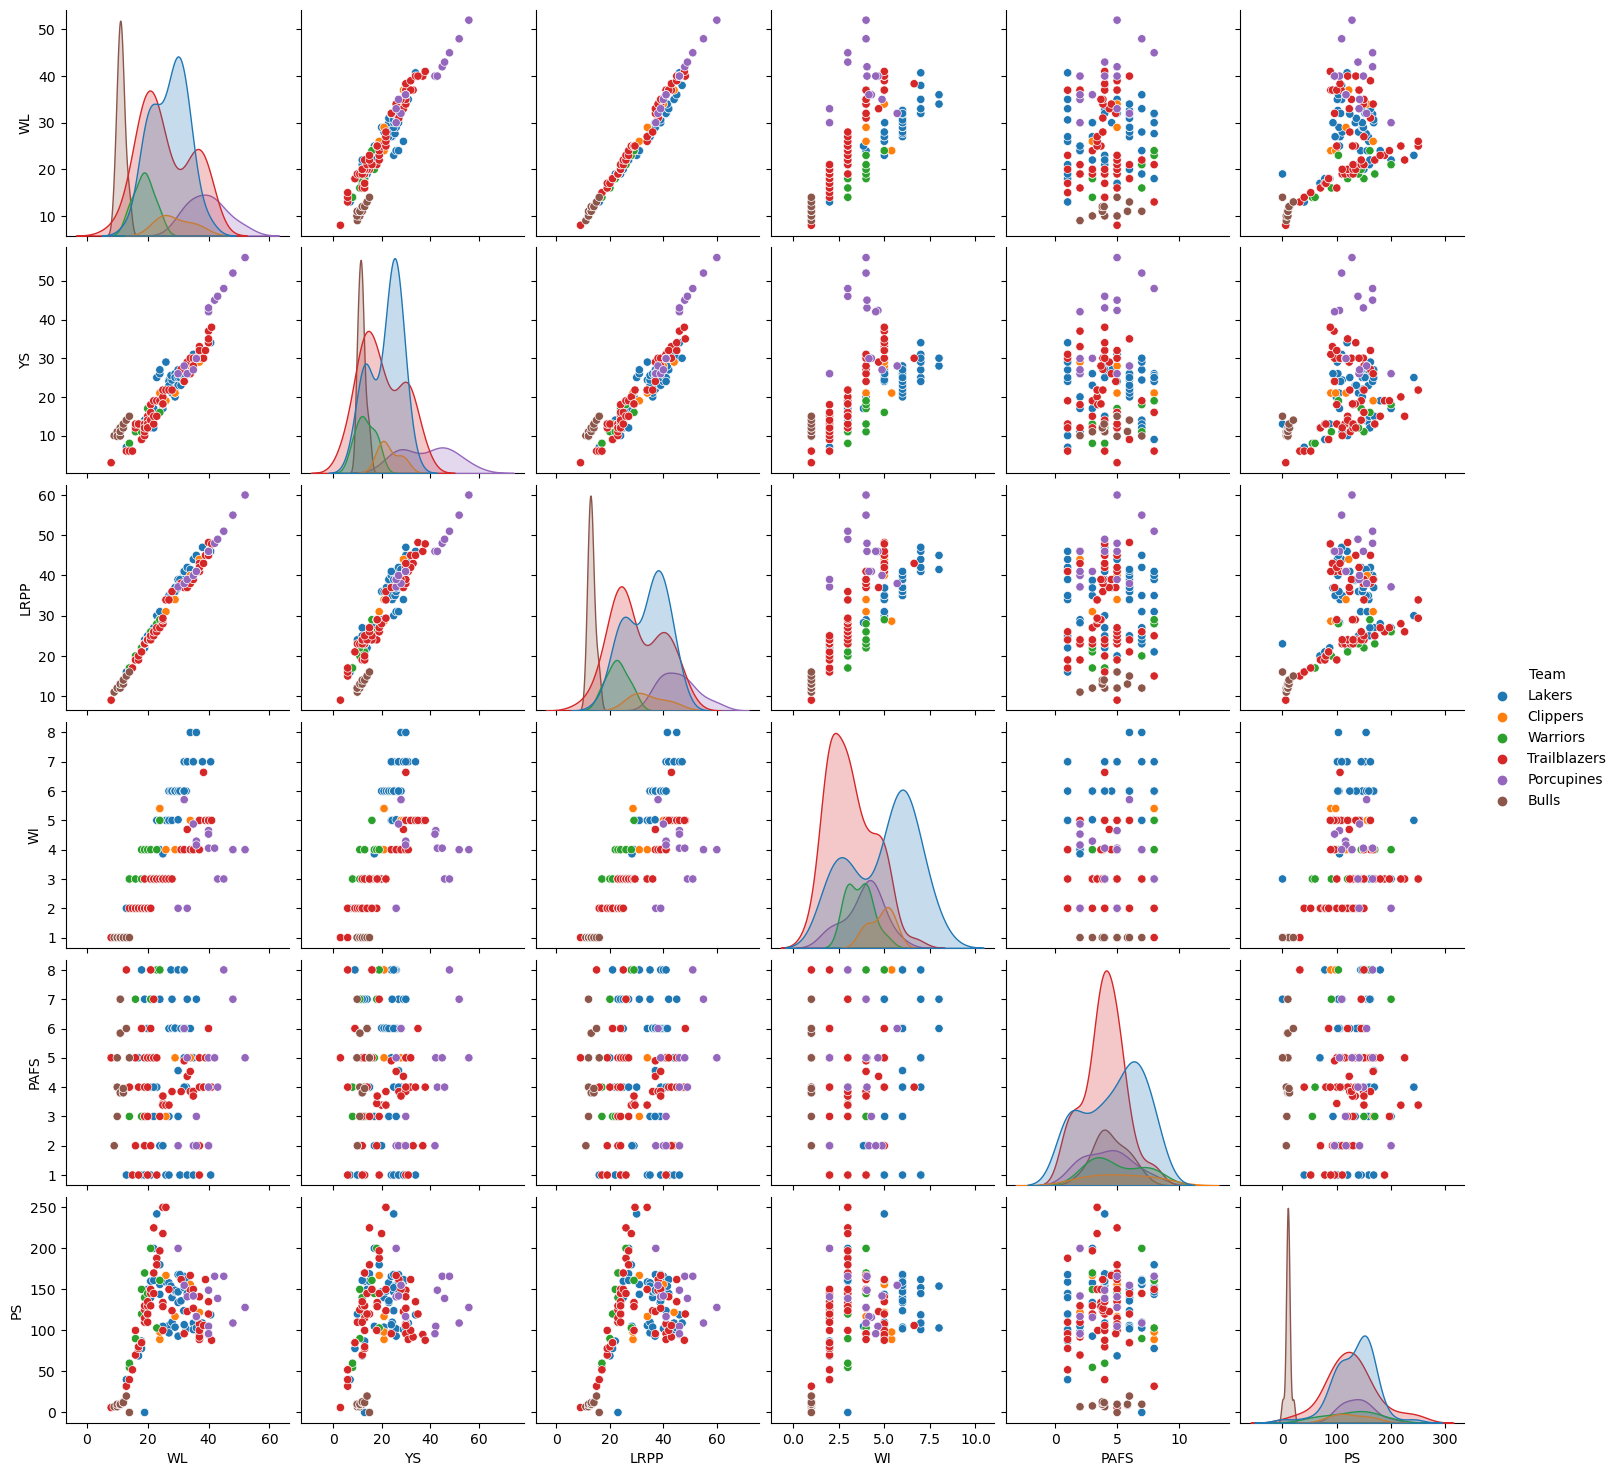

In [86]:
sns.pairplot(df_new, kind = 'scatter', hue = 'Team')

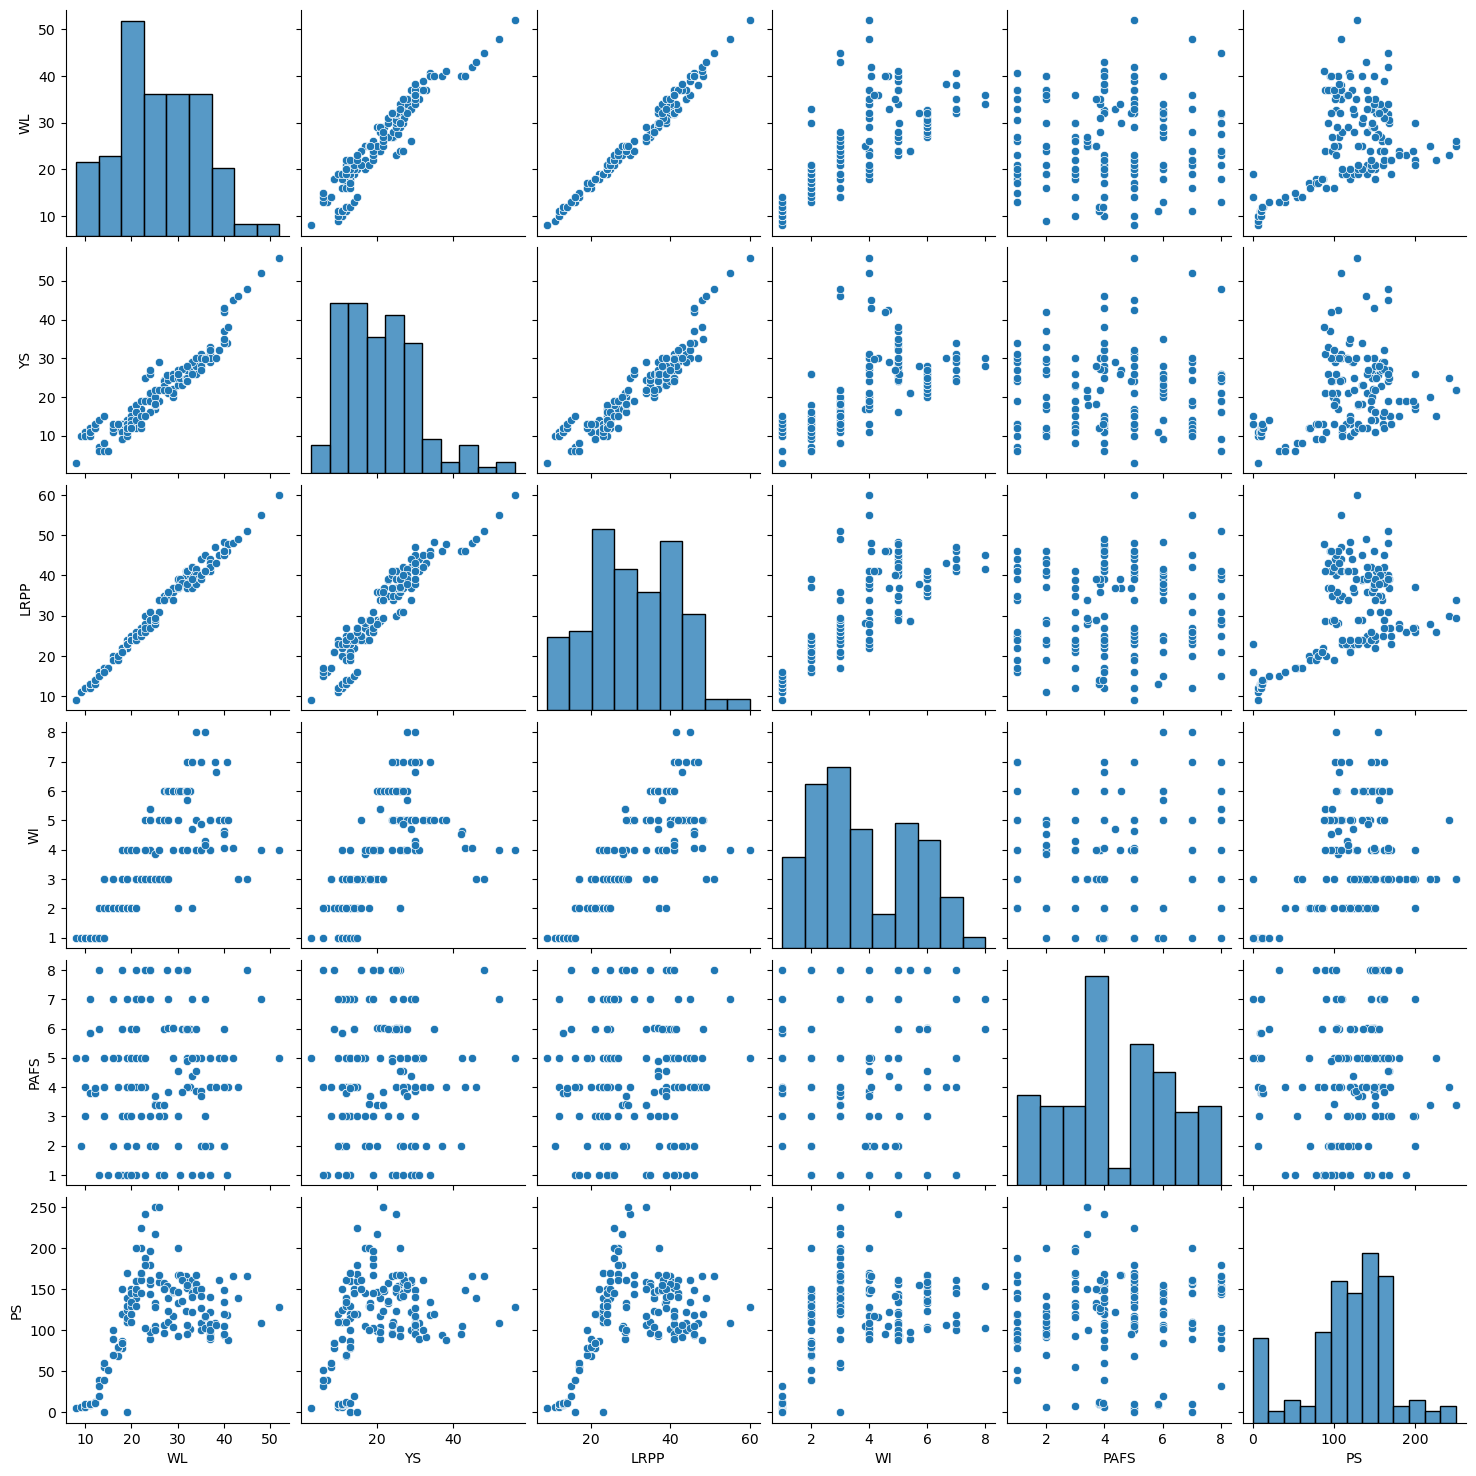

In [87]:
sns.pairplot(df_new, kind = 'scatter')

In [88]:
def chatterjee_corr(df,x,y):
    N = df.shape[0]
    df_rank = df
    
    df_rank['rank'] = df_rank[y].rank()
   #print(df_rank['rank'])
    
    df_rank['rank_x'] = df_rank[x].rank()
    
    df_rank = df_rank.sort_values(by = 'rank_x')
    #1-3*(abs(sum(xri-1 - Xie))))/n square-1
    #Diff --> Summation -> absolute
    
    chatt_corr = 1-3*df_rank['rank'].diff().abs().sum() / (pow(N,2)-1)
    
    return chatt_corr

In [89]:
chatterjee_corr(df_new,'WL','PS')

0.4062872405999589

In [90]:
chatterjee_corr(df_new,'WI','PS')

0.39198685021573865

In [91]:
chatterjee_corr(df_new,'YS','PS')

0.2911444421614958

In [92]:
chatterjee_corr(df_new,'LRPP','PS')

0.4229299363057325

In [93]:
chatterjee_corr(df_new,'PAFS','PS')

0.0019930141771111742

### Single Way ANOVA

determine whether team essentially affects the points variable for the dataset

In [94]:
import random

nba_id = list(df_new.index.unique())

random.seed(13)

sample_match_id = random.sample(nba_id,50)

sample_df = df_new[df_new.index.isin(sample_match_id)].reset_index(drop = True)

In [95]:
import random

nba_id=list(df_new.index.unique())

random.seed(13)

In [96]:
nba_id

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158]

In [97]:
sample_df

WL         YS       LRPP        WI      PAFS   PS          Team  \
0   26.000000  29.000000  34.000000  5.000000  1.000000  159        Lakers   
1   28.000000  24.366748  35.000000  5.000000  7.000000  110        Lakers   
2   29.000000  25.000000  37.000000  6.000000  6.014168  149        Lakers   
3   30.000000  25.000000  39.000000  6.000000  8.000000  147        Lakers   
4   32.712197  28.000000  39.000000  6.000000  4.000000  155        Lakers   
5   30.604567  25.000000  39.000000  6.000000  1.000000  168        Lakers   
6   36.000000  30.000000  45.000000  8.000000  7.000000  103        Lakers   
7   40.701081  34.000000  46.000000  7.000000  1.000000  119        Lakers   
8   13.000000   7.000000  16.000000  2.000000  1.000000   40        Lakers   
9   18.000000   9.000000  21.000000  2.000000  8.000000   78        Lakers   
10  19.000000  13.000000  23.000000  3.000000  7.000000    0        Lakers   
11  21.000000  14.000000  24.000000  3.000000  7.000000  145        Lakers   
12  21.000000  15.000000  25.000000  3.000000  4.000000  160        Lakers   
13  30.000000  26.000000  36.896815  5.020284  3.000000   93        Lakers   
14  24.000000  21.000000  28.637014  5.404490  8.000000   89      Clippers   
15  24.000000  21.000000  28.637014  5.404490  8.000000   98      Clippers   
16  26.000000  19.000000  31.000000  4.000000  3.000000  167      Clippers   
17  34.000000  28.000000  40.000000  5.000000  5.000000  156      Clippers   
18  18.000000  11.000000  22.000000  4.000000  3.000000  150      Warriors   
19  19.000000  12.000000  23.000000  3.000000  4.000000  140      Warriors   
20  19.000000  13.000000  23.000000  4.000000  3.000000  170      Warriors   
21  23.000000  19.000000  28.000000  4.000000  8.000000  103      Warriors   
22  14.000000   6.000000  16.000000  2.000000  4.000000   40  Trailblazers   
23  15.000000   6.000000  17.000000  2.000000  1.000000   52  Trailblazers   
24  16.000000  12.000000  19.000000  2.000000  2.000000   70  Trailblazers   
25  17.000000  13.000000  19.000000  2.000000  1.000000   78  Trailblazers   
26  18.000000   9.000000  21.000000  2.000000  6.000000   85  Trailblazers   
27  19.000000  13.000000  23.000000  2.000000  5.000000  115  Trailblazers   
28  20.000000  15.000000  24.000000  2.000000  3.000000  120  Trailblazers   
29  20.000000  13.000000  24.000000  2.000000  5.000000  130  Trailblazers   
30  21.000000  18.000000  24.000000  2.000000  2.000000  130  Trailblazers   
31  21.000000  14.000000  24.000000  2.000000  6.000000  145  Trailblazers   
32  22.000000  13.000000  25.000000  3.000000  5.000000  170  Trailblazers   
33  25.000000  18.000000  29.000000  3.000000  3.439736  100  Trailblazers   
34  25.000000  18.192346  29.000000  3.000000  3.694077  129  Trailblazers   
35  31.000000  27.124361  38.065495  4.000000  3.847673  162  Trailblazers   
36  32.000000  24.000000  37.000000  4.000000  4.897022   96  Trailblazers   
37  33.000000  29.000000  37.000000  4.689462  4.366982  123  Trailblazers   
38  34.000000  30.000000  38.000000  4.000000  3.854774  149  Trailblazers   
39  35.000000  28.000000  39.000000  4.000000  3.695275  150  Trailblazers   
40  40.000000  34.000000  45.000000  5.000000  4.000000  135  Trailblazers   
41  41.000000  38.000000  47.845387  5.000000  4.000000   88  Trailblazers   
42  32.000000  28.000000  38.000000  5.707211  6.000000  155    Porcupines   
43  40.000000  43.000000  46.000000  4.051511  4.000000  149    Porcupines   
44  45.000000  48.000000  51.000000  3.000000  8.000000  166    Porcupines   
45  11.000000  12.000000  13.000000  1.000000  3.805411   10         Bulls   
46  11.000000  11.059925  13.000000  1.000000  5.842175   10         Bulls   
47  12.000000  12.000000  13.000000  1.000000  3.805411   12         Bulls   
48  12.000000  12.000000  14.000000  1.000000  3.805411   13         Bulls   
49  12.000000  13.000000  14.000000  1.000000  3.953409   12         Bulls   

     rank  rank_x  
0   126.5   

In [98]:
sample_match_id=random.sample(nba_id,50)

In [99]:
sample_df=df_new[df_new.index.isin(sample_match_id)].reset_index(drop=True)

In [100]:
sample_df = sample_df[['Team','PS']]

groups = sample_df.groupby('Team').count().reset_index()

In [101]:
groups

Team  PS
0         Bulls   5
1      Clippers   4
2        Lakers  14
3    Porcupines   3
4  Trailblazers  20
5      Warriors   4

#### Normality

In [102]:
import scipy.stats as stats

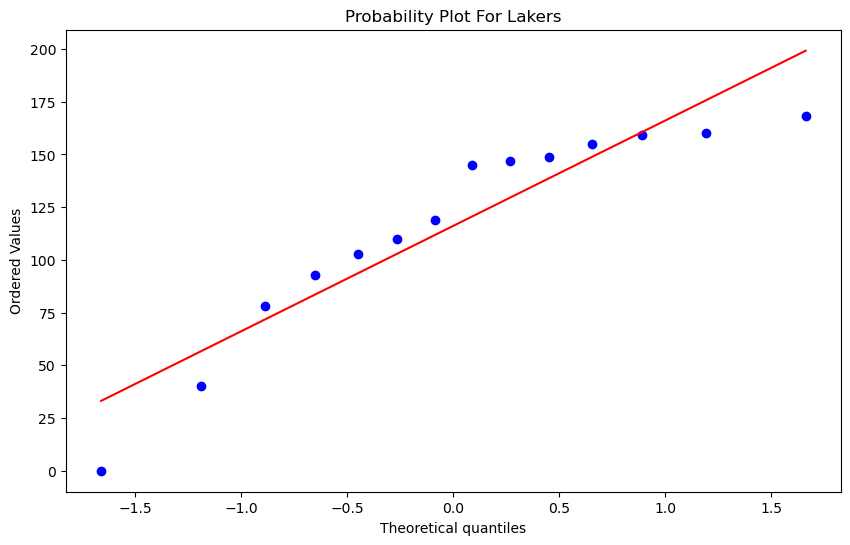

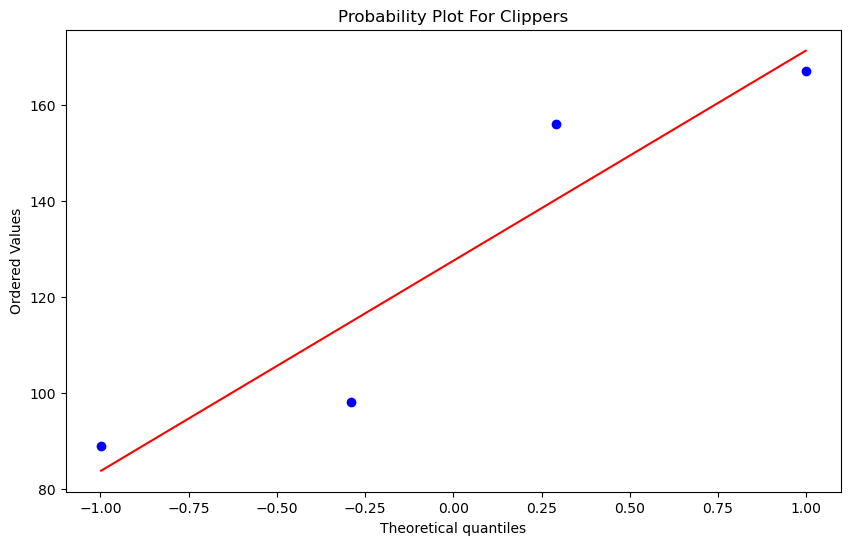

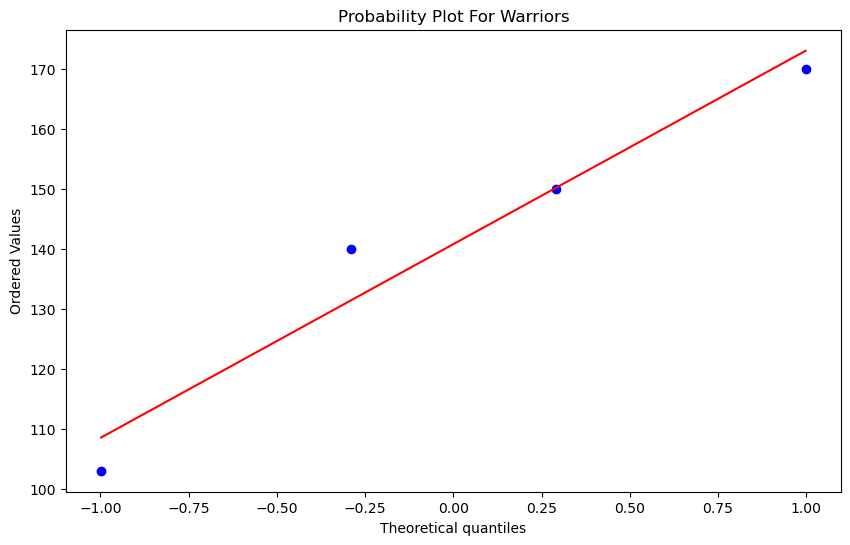

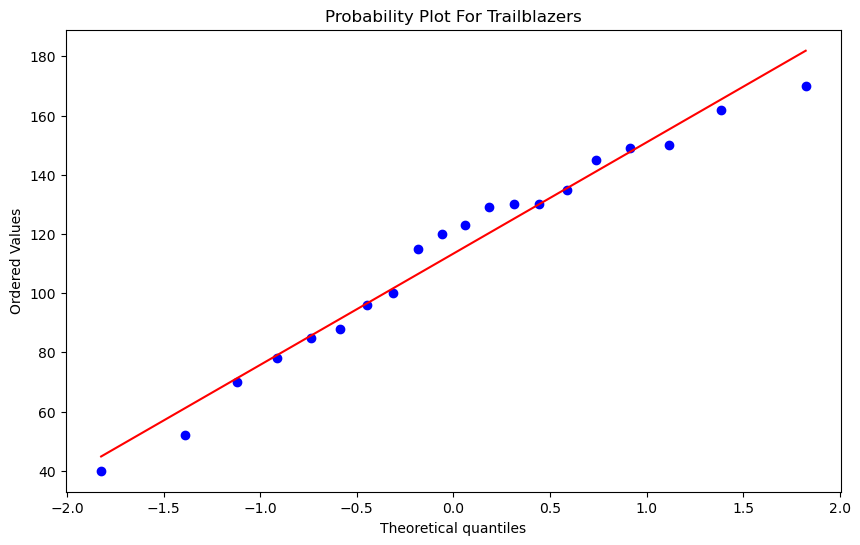

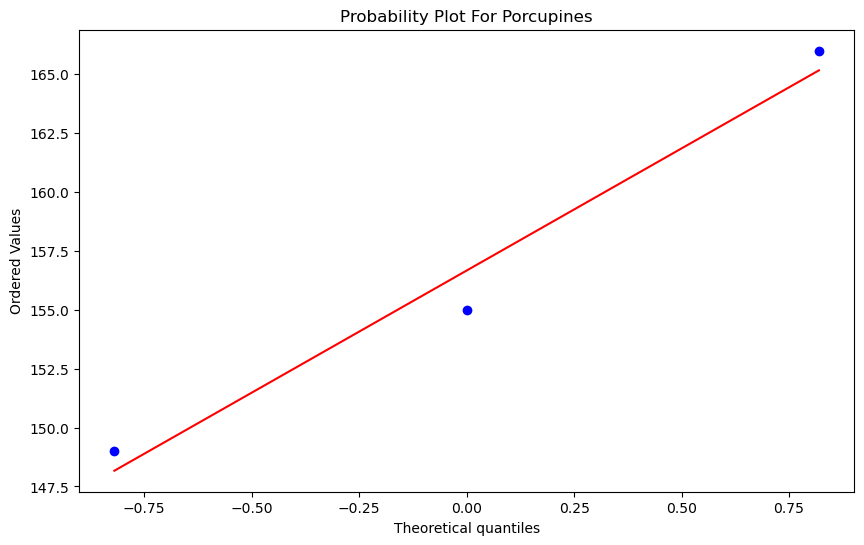

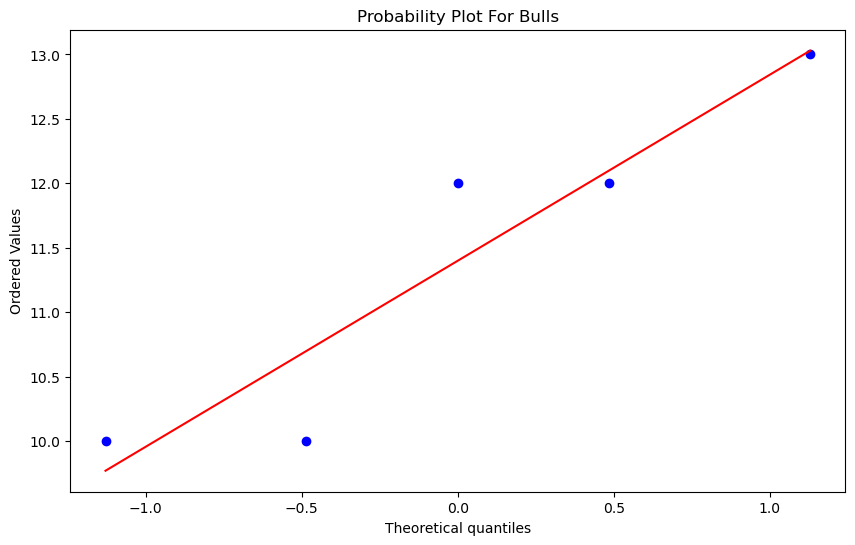

In [103]:
unique_teams = sample_df['Team'].unique()

for i in unique_teams:
    stats.probplot(sample_df[sample_df['Team']==i]['PS'], dist='norm', plot=plt)
    plt.title('Probability Plot For '+i)
    plt.show()

In [104]:
ratio = sample_df.groupby('Team').std().max() / sample_df.groupby('Team').std().min()
ratio

PS    37.164289
dtype: float64

In [105]:
#implement ANOVA from Scratch
data = [['Between Groups','','','','','',''],['Within Groups','','','','','',''],['Total','','','','','','']]

anova_table = pd.DataFrame(data, columns = ['Variation','SS','df','MS', 'F value','P value','F critical'])

anova_table.set_index('Variation', inplace=True)

In [106]:
x_bar = sample_df['PS'].mean()
SSTR = sample_df.groupby('Team').count()*(sample_df.groupby('Team').mean()-x_bar)**2

In [107]:
anova_table['SS']['Between Groups'] = SSTR['PS'].sum()

In [108]:
anova_table

SS df MS F value P value F critical
Variation                                                    
Between Groups  60902.139048                                 
Within Groups                                                
Total

In [109]:
SSE = (sample_df.groupby('Team').count()-1)*sample_df.groupby('Team').std()**2

In [110]:
SSE

PS
Team                      
Bulls             7.200000
Clippers       4725.000000
Lakers        32319.714286
Porcupines      148.666667
Trailblazers  24798.550000
Warriors       2366.750000

In [111]:
anova_table['SS']['Within Groups'] = SSE['PS'].sum()

In [112]:
anova_table

SS df MS F value P value F critical
Variation                                                    
Between Groups  60902.139048                                 
Within Groups   64365.880952                                 
Total

In [113]:
Total = SSE['PS'].sum() + SSTR['PS'].sum()

In [114]:
anova_table['SS']['Total'] = Total

In [115]:
anova_table

SS df MS F value P value F critical
Variation                                                    
Between Groups  60902.139048                                 
Within Groups   64365.880952                                 
Total              125268.02

In [116]:
anova_table['df']['Between Groups'] = sample_df['Team'].nunique()-1
anova_table['df']['Within Groups'] = sample_df.shape[0]-sample_df['Team'].nunique()-1
anova_table['df']['Total'] = sample_df.shape[0]-1

In [117]:
anova_table

SS  df MS F value P value F critical
Variation                                                     
Between Groups  60902.139048   5                              
Within Groups   64365.880952  43                              
Total              125268.02  49

In [118]:
anova_table['MS'] = anova_table['SS']/anova_table['df']
anova_table['F value']['Between Groups'] = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']

anova_table['P value']['Between Groups'] = 1-stats.f.cdf(anova_table['F value']['Between Groups'], 
                                                        anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

In [119]:
anova_table

SS  df           MS   F value   P value F critical
Variation                                                                   
Between Groups  60902.139048   5  12180.42781  8.137205  0.000018           
Within Groups   64365.880952  43  1496.880952                               
Total              125268.02  49  2556.490204

In [120]:
alpha = 0.05

hypothesis_type = "two tailed"

if hypothesis_type:
    alpha = alpha/2
    
anova_table['F critical']['Between Groups'] = stats.f.ppf(1-alpha,
                                                           anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

In [121]:
anova_table

SS  df           MS   F value   P value F critical
Variation                                                                   
Between Groups  60902.139048   5  12180.42781  8.137205  0.000018   2.878716
Within Groups   64365.880952  43  1496.880952                               
Total              125268.02  49  2556.490204

In [122]:
#P value approach

print('Approach for P value')


conclusion = 'Failed to Reject Null Hypothesis'

if anova_table['P value']['Between Groups'] <= alpha:
    conclusion = 'Null Hypothesis is Rejected'

print('P value for the table is ', anova_table['F value']['Between Groups'], 'and p value is ', anova_table['P value']['Between Groups'])


print(conclusion)

Approach for P value
P value for the table is  8.137205427158056 and p value is  1.7975922821267254e-05
Null Hypothesis is Rejected


### Data Processing
processing data for modeling

In [124]:
one_hot_df = pd.get_dummies(df_clean, columns = ['Team'], drop_first = True)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [126]:
one_hot_df.head()

PS    WL    YS  LRPP   WI  PAFS  Team_Clippers  Team_Lakers  \
0  242  23.0  25.0  30.0  5.0   4.0              0            1   
1  144  24.0  26.0  31.0  5.0   8.0              0            1   
2  156  24.0  27.0  31.0  5.0   7.0              0            1   
3  159  26.0  29.0  34.0  5.0   1.0              0            1   
4  106  27.0   NaN  34.0  5.0   6.0              0            1   

   Team_Porcupines  Team_Trailblazers  Team_Warriors  
0                0                  0              0  
1                0                  0              0  
2                0                  0              0  
3                0                  0              0  
4                0                  0              0

In [127]:
one_hot_df.columns

Index(['PS', 'WL', 'YS', 'LRPP', 'WI', 'PAFS', 'Team_Clippers', 'Team_Lakers',
       'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors'],
      dtype='object')

In [128]:
X = one_hot_df[['WL', 'YS', 'LRPP', 'WI', 'PAFS', 'Team_Clippers', 'Team_Lakers',
       'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]
y = one_hot_df['PS']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

print('X train dimension is ', X_train.shape)
print('y train dimension is ', y_train.shape)
print('X test dimension is ', X_test.shape)
print('y test dimension is ', y_test.shape)

X train dimension is  (124, 10)
y train dimension is  (124,)
X test dimension is  (32, 10)
y test dimension is  (32,)


In [129]:
X_train.head(1)

WL    YS  LRPP   WI  PAFS  Team_Clippers  Team_Lakers  Team_Porcupines  \
93  21.0  14.0  24.0  2.0   6.0              0            0                0   

    Team_Trailblazers  Team_Warriors  
93                  1              0

In [130]:
#Start Imputing here

imputer=LGBMImputer(n_iter=15,verbose=True)

X_train_full=imputer.fit_transform(X_train)

X_train_clean=pd.DataFrame(X_train_full,columns=X_train.columns)

X_train_clean.head()

  0%|          | 0/5 [00:00<?, ?it/s]

WL         YS  LRPP        WI      PAFS  Team_Clippers  Team_Lakers  \
93   21.0  14.000000  24.0  2.000000  6.000000              0            0   
153  11.0  13.232576  13.0  1.000000  4.505323              0            0   
2    24.0  27.000000  31.0  5.000000  7.000000              0            1   
132  36.0  29.021729  41.0  4.001022  3.000000              0            0   
59   34.0  28.000000  40.0  5.000000  5.000000              1            0   

     Team_Porcupines  Team_Trailblazers  Team_Warriors  
93                 0                  1              0  
153                0                  0              0  
2                  0                  0              0  
132                1                  0              0  
59                 0                  0              0

### Modeling
Linear Regression Modeling (requires less time)

In [131]:
X_test

WL    YS  LRPP   WI  PAFS  Team_Clippers  Team_Lakers  Team_Porcupines  \
139  45.0  48.0  51.0  3.0   8.0              0            0                1   
63   16.0  11.0  20.0  3.0   7.0              0            0                0   
70   23.0  19.0  28.0  4.0   8.0              0            0                0   
73   13.0   6.0  15.0  1.0   8.0              0            0                0   
53   25.0  17.0   NaN  NaN   2.0              0            1                0   
38   18.0  13.0  22.0  2.0   1.0              0            1                0   
33    NaN  34.0  46.0  7.0   1.0              0            1                0   
115  35.0  28.0  39.0  4.0   NaN              0            0                0   
88   20.0  13.0  24.0  2.0   5.0              0            0                0   
60   37.0  29.0  44.0  5.0   2.0              1            0                0   
71   24.0  16.0  29.0  5.0   8.0              0            0                0   
61   14.0   8.0  17.0  3.0   3.0              0            0                0   
57   26.0  19.0  31.0  4.0   3.0              1            0                0   
11   29.0  20.0  36.0  6.0   NaN              0            1                0   
74   14.0   6.0  16.0  2.0   4.0              0            0                0   
121  37.0  32.0  42.0  5.0   4.0              0            0                0   
1    24.0  26.0  31.0  5.0   8.0              0            1                0   
129  32.0  28.0  38.0  NaN   6.0              0            0                1   
34   38.0  30.0  47.0  7.0   4.0              0            1                0   
75   15.0   6.0  17.0  2.0   1.0              0            0                0   
27   33.0  29.0  42.0  7.0   7.0              0            1                0   
141  52.0  56.0  60.0  4.0   5.0              0            0                1   
36   17.0  12.0  20.0  2.0   5.0              0            1                0   
65   18.0  11.0  22.0  4.0   3.0              0            0                0   
83   19.0  13.0  23.0  2.0   5.0              0            0                0   
77   16.0  13.0  19.0  2.0   5.0              0            0                0   
32   36.0  30.0  45.0  8.0   7.0              0            1                0   
62   14.0   8.0  17.0  3.0   4.0              0            0                0   
94   21.0  16.0  25.0  2.0   8.0              0            0                0   
64   18.0  13.0  21.0  3.0   3.0              0            0                0   
106  26.0   NaN   NaN  3.0   NaN              0            0                0   
47   21.0  15.0  25.0  3.0   4.0              0            1                0   

     Team_Trailblazers  Team_Warriors  
139                  0              0  
63                   0              1  
70                   0              1  
73                   1              0  
53                   0              0  
38                   0              0  
33                   0              0  
115                  1              0  
88                   1              0  
60                   0              0  
71                   0              1  
61                   0              1  
57                   0              0  
11                   0              0  
74                   1              0  
121                  1              0  
1                    0              0  
129                  0              0  
34                   0              0  
75                   1              0  
27                   0              0  
141                  0              0  
36                   0              0  
65                   0              1  
83                   1              0  
77                   1              0  
32                   0              0  
62                   0              1  
94                   1              0  
64                   0              1  
106                  1              0  
47                   0              0

In [137]:
pip install mlfoundry


Note: you may need to restart the kernel to use updated packages.


In [138]:
import mlfoundry
# Login
mlfoundry.login()

# Get client
client = mlfoundry.get_client()


Opening:- https://app.truefoundry.com/authorize/device?userCode=G8GGXX
Please click on the above link if it is not automatically opened in a browser window.
logged in to 'https://app.truefoundry.com' as 'j-dub64' (joewankelman@gmail.com)
[mlfoundry] 2023-03-04T18:26:12-0800 INFO Logged in to 'https://app.truefoundry.com' as 'j-dub64' (joewankelman@gmail.com)


In [139]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def truefoundry_model_tracker(project_name,run_name,model_object,model_name,framework,description,test,pred):
  #We are tracking metrics using this function. We will not be tracking plots and dataset through this function
  #That can be done separately
  client = mlfoundry.get_client()
  run = client.create_run(project_name=project_name, run_name=run_name)
  try:
    run.log_params(model_object.params.to_dict())
  except:
    run.log_params(model_object.get_params())
  run.log_model(name=model_name,model=model_object,framework=framework,description=description)
  run.log_metrics({
    "mean_absolute_error": mean_absolute_error(test,pred),
    "mean_square_error": mean_squared_error(test,pred),
    "root_mean_square_error": np.sqrt(mean_squared_error(test,pred)),
    "r2_score": r2_score(test,pred)
  })

In [140]:
#requires less time 

import statsmodels.api as sm

result=sm.OLS(y_train,X_train_clean).fit()

#run.log_params(result.params.to_dict())

In [141]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                     PS   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              137.7
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                    8.65e-59
Time:                        18:26:28   Log-Likelihood:                         -620.79
No. Observations:                 124   AIC:                                      1262.
Df Residuals:                     114   BIC:                                      1290.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

This data presents the results of an OLS regression analysis, which is a statistical method used to identify relationships between a dependent variable and a set of independent variables. The table shows the coefficients, standard errors, t-values, and p-values for each of the independent variables in the regression model. The R-squared value indicates the proportion of variance in the dependent variable that can be explained by the independent variables in the model, with a value of 0.915 indicating a strong relationship. The p-values indicate the statistical significance of each independent variable, with values less than 0.05 indicating a significant relationship.

In [142]:
X_const=sm.add_constant(X_train_clean)

result=sm.OLS(y_train,X_const).fit()

#run.log_model(name='Statsmodellr',model=result,framework='statsmodels',description='Linear Regression using Statsmodels.api')


print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PS   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     14.30
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           4.43e-16
Time:                        18:26:32   Log-Likelihood:                -620.67
No. Observations:                 124   AIC:                             1263.
Df Residuals:                     113   BIC:                             1294.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.2639     15.58

This data shows the results of an OLS regression analysis, which is a statistical method used to analyze the relationship between one or more independent variables and a dependent variable. The R-squared value of 0.496 indicates that 49.6% of the variation in the dependent variable (PS) can be explained by the independent variables in the model. The P-values in the table indicate the significance of each independent variable in relation to the dependent variable. For example, the variables "WL," "Team_Clippers," "Team_Lakers," "Team_Porcupines," "Team_Trailblazers," and "Team_Warriors" are significant in predicting the dependent variable, while the variables "YS," "LRPP," "WI," and "PAFS" are not significant. The data also provides information on the standard errors, t-values, and confidence intervals for each variable.

In [143]:
test=pd.DataFrame(imputer.transform(X_test))

  0%|          | 0/5 [00:00<?, ?it/s]

In [144]:
imputer.transform(X_test)

  0%|          | 0/5 [00:00<?, ?it/s]

WL         YS       LRPP        WI      PAFS  Team_Clippers  \
139  45.000000  48.000000  51.000000  3.000000  8.000000              0   
63   16.000000  11.000000  20.000000  3.000000  7.000000              0   
70   23.000000  19.000000  28.000000  4.000000  8.000000              0   
73   13.000000   6.000000  15.000000  1.000000  8.000000              0   
53   25.000000  17.000000  28.713738  4.049409  2.000000              0   
38   18.000000  13.000000  22.000000  2.000000  1.000000              0   
33   35.699611  34.000000  46.000000  7.000000  1.000000              0   
115  35.000000  28.000000  39.000000  4.000000  3.773007              0   
88   20.000000  13.000000  24.000000  2.000000  5.000000              0   
60   37.000000  29.000000  44.000000  5.000000  2.000000              1   
71   24.000000  16.000000  29.000000  5.000000  8.000000              0   
61   14.000000   8.000000  17.000000  3.000000  3.000000              0   
57   26.000000  19.000000  31.000000  4.000000  3.000000              1   
11   29.000000  20.000000  36.000000  6.000000  4.813497              0   
74   14.000000   6.000000  16.000000  2.000000  4.000000              0   
121  37.000000  32.000000  42.000000  5.000000  4.000000              0   
1    24.000000  26.000000  31.000000  5.000000  8.000000              0   
129  32.000000  28.000000  38.000000  4.071179  6.000000              0   
34   38.000000  30.000000  47.000000  7.000000  4.000000              0   
75   15.000000   6.000000  17.000000  2.000000  1.000000              0   
27   33.000000  29.000000  42.000000  7.000000  7.000000              0   
141  52.000000  56.000000  60.000000  4.000000  5.000000              0   
36   17.000000  12.000000  20.000000  2.000000  5.000000              0   
65   18.000000  11.000000  22.000000  4.000000  3.000000              0   
83   19.000000  13.000000  23.000000  2.000000  5.000000              0   
77   16.000000  13.000000  19.000000  2.000000  5.000000              0   
32   36.000000  30.000000  45.000000  8.000000  7.000000              0   
62   14.000000   8.000000  17.000000  3.000000  4.000000              0   
94   21.000000  16.000000  25.000000  2.000000  8.000000              0   
64   18.000000  13.000000  21.000000  3.000000  3.000000              0   
106  26.000000  23.635432  34.403015  3.000000  4.326479              0   
47   21.000000  15.000000  25.000000  3.000000  4.000000              0   

     Team_Lakers  Team_Porcupines  Team_Trailblazers  Team_Warriors  
139            0                1                  0              0  
63             0                0                  0              1  
70             0                0                  0              1  
73             0                0                  1              0  
53             1                0                  0              0  
38             1                0                  0              0  
33             1                0                  0              0  
115            0                0                  1              0  
88             0                0                  1              0  
60             0                0                  0              0  
71             0                0                  0              1  
61             0                0                  0              1  
57             0                0                  0              0  
11             1                0                  0              0  
74             0                0                  1              0  
121            0                0                  1              0  
1              1                0                  0              0  
129            0                1                  0              0  
34             1                0                  0              0  
75             0                0                  1              0  
27             1                0                  0              

In [154]:
test=pd.DataFrame(imputer.transform(X_test))

  0%|          | 0/5 [00:00<?, ?it/s]

In [155]:
#If you do not add the constant you will recieve an error because the data frame knows there are 10 dimensions, 
#but in the modeling we created 11 dimensions
res = result.predict(sm.add_constant(test[['WL', 'YS', 'LRPP', 'WI', 'PAFS', 'Team_Clippers', 'Team_Lakers',
       'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]))

In [156]:
#RMSE, MAE, MSE

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [157]:
test.columns

Index(['WL', 'YS', 'LRPP', 'WI', 'PAFS', 'Team_Clippers', 'Team_Lakers',
       'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors'],
      dtype='object')

In [158]:
#RMSE, MAE, MSE

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [159]:
print('MAE of the model is', mean_absolute_error(y_test,res))

MAE of the model is 38.85661625865232


In [160]:
print('MSE of the model is', mean_squared_error(y_test,res))

MSE of the model is 2402.5897658782096


In [161]:
print('RMSE of the model is', np.sqrt(mean_squared_error(y_test, res)))

RMSE of the model is 49.01621941641572


In [162]:
from sklearn import metrics
print('R2 Scopre for test is', metrics.r2_score(y_test, res))

R2 Scopre for test is -0.19099521678457765


In [163]:
#truefoundry_model_tracker(project_name,run_name,model_object,model_name,framework,description,test,pred)
truefoundry_model_tracker("SplinesProject","SplinesRegressionProject",result,"LinearRegression","statsmodels","Doing the first run for LR",y_test,res)


[mlfoundry] 2023-03-04T18:33:14-0800 INFO project SplinesProject does not exist. Creating SplinesProject.
Link to the dashboard for the run: https://app.truefoundry.com/mlfoundry/613/run/a05e763d46404dd3ace38341bbc87881/
[mlfoundry] 2023-03-04T18:33:16-0800 WARNING failed to log git info because git repository is not present
[mlfoundry] 2023-03-04T18:33:16-0800 INFO Run 'truefoundry/j-dub64/SplinesProject/SplinesRegressionProject' has started.
[mlfoundry] 2023-03-04T18:33:17-0800 INFO Parameters logged successfully
[mlfoundry] 2023-03-04T18:33:17-0800 INFO Logging model and additional files, this might take a while ...
[mlfoundry] 2023-03-04T18:33:17-0800 INFO Serializing model files to model version contents
[mlfoundry] 2023-03-04T18:33:24-0800 INFO Packaging and uploading files to remote ...
[mlfoundry] 2023-03-04T18:33:33-0800 INFO Logged model successfully with fqn 'model:truefoundry/j-dub64/SplinesProject/LinearRegression:1'
[mlfoundry] 2023-03-04T18:33:34-0800 INFO Metrics logged

In [164]:
#Line is not a good fit and so we are going for polynomials
#We will create a line as well as a polynomial for comparison

#numpy.polyfit
#numpy.linespace -> create space and plot values -> Space creation using args
#numpy.poly1d -> To create the polynomial equation

This function generates a scatter plot with three polynomial regression models overlaid on top. It takes two arguments, feature and label, and fits three polynomial models (degree 1, 2, and 3) to the data using the polyfit() function from numpy. The function then plots the original data as a scatter plot and the three polynomial models using the scatter() and plot() functions from matplotlib. Finally, it adds axis labels and a legend, and displays the plot using the show() function. The create_polynomial_plot() function is useful in data science projects for visualizing the relationship between variables and selecting the best polynomial regression model for predicting the target variable.

In [165]:
def create_polynomial_plot(feature, label):
    #convert to 1d
    x_coordinates=feature
    y_coordinates=np.squeeze(label)
    
    linear_poly = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
    quadratic_poly = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))
    cubic_poly = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 3))
    
    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))
    plt.scatter(x_coordinates, y_coordinates, color= 'blue')
    plt.plot(values, linear_poly(values), color = 'cyan', label = 'Linear Model')
    plt.plot(values, quadratic_poly(values), color = 'red', label = 'Quadratic Model')
    plt.plot(values, cubic_poly(values), color = 'orange', label = 'Cubic Model')
    
    plt.xlabel('%s from data' %(feature.name))
    plt.ylabel('Points Scored')
    
    plt.rcParams['figure.figsize']=(12,6)
    plt.legend()
    plt.title('Linear vs Quadratic')
    
    plt.show()

In [166]:
df_clean.head()

Team   PS    WL    YS  LRPP   WI  PAFS
0  Lakers  242  23.0  25.0  30.0  5.0   4.0
1  Lakers  144  24.0  26.0  31.0  5.0   8.0
2  Lakers  156  24.0  27.0  31.0  5.0   7.0
3  Lakers  159  26.0  29.0  34.0  5.0   1.0
4  Lakers  106  27.0   NaN  34.0  5.0   6.0

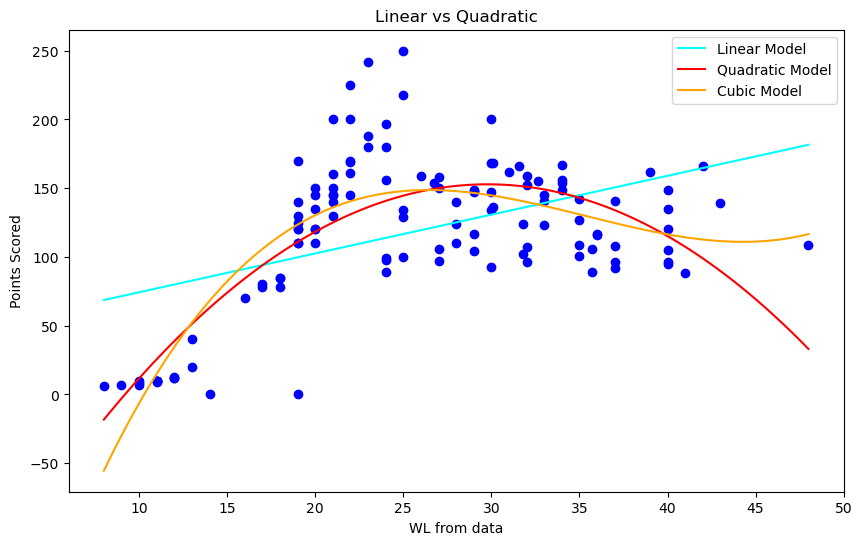

In [167]:
create_polynomial_plot(X_train_clean.WL, y_train )

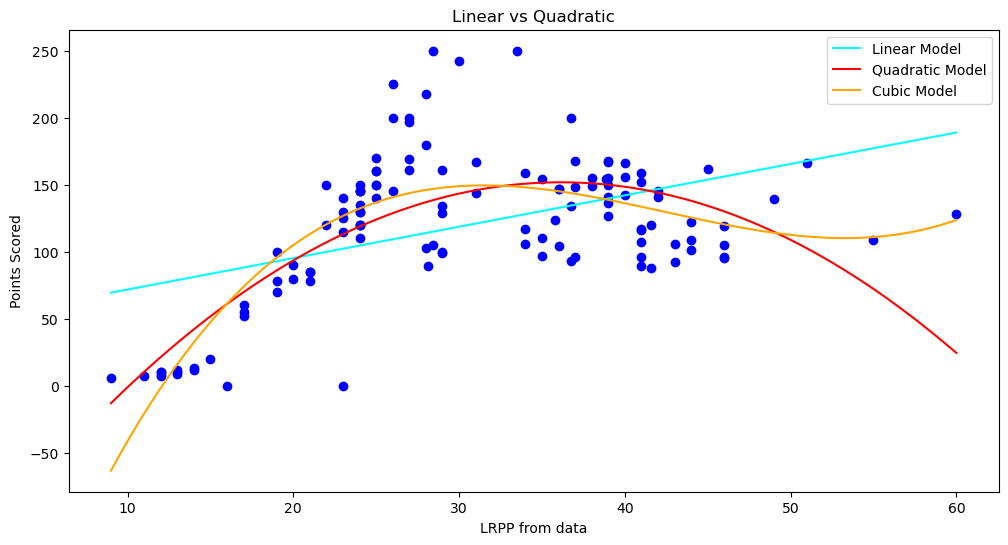

In [187]:
create_polynomial_plot(X_train_clean.LRPP, y_train )

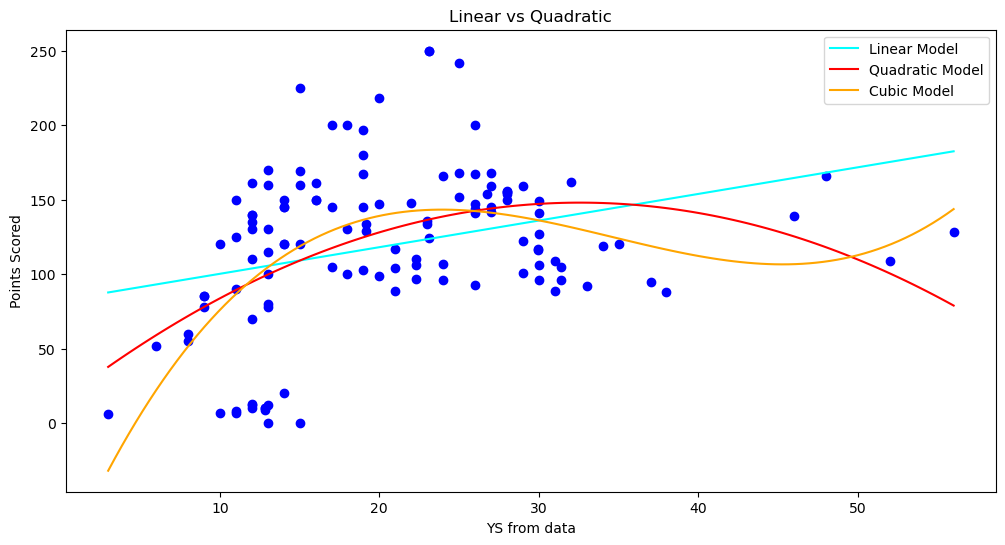

In [188]:
create_polynomial_plot(X_train_clean.YS, y_train )

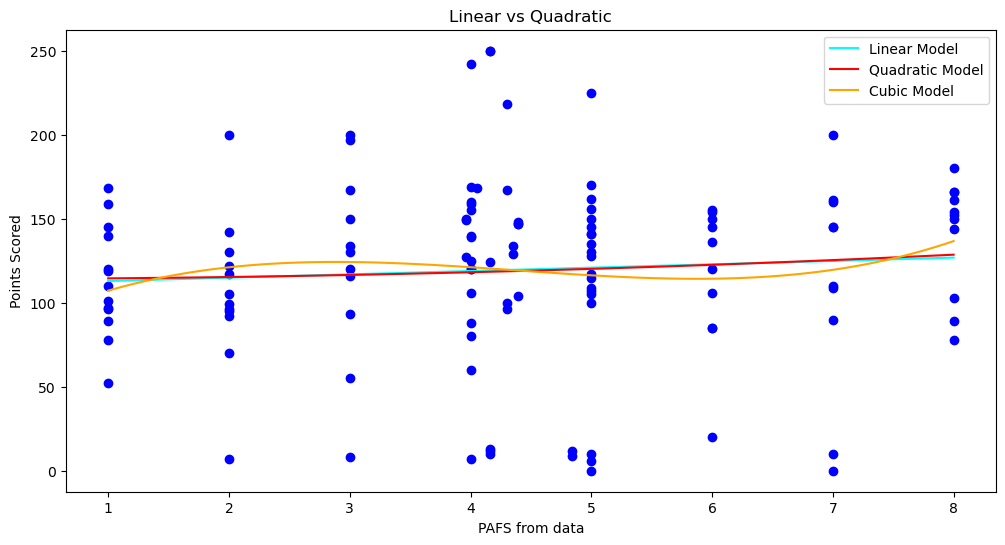

In [189]:
create_polynomial_plot(X_train_clean.PAFS, y_train )

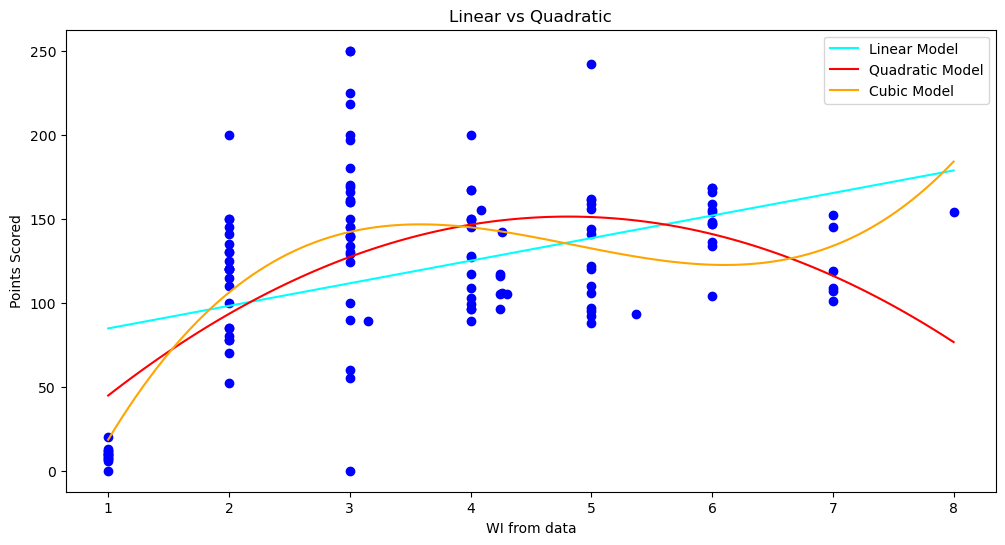

In [190]:
create_polynomial_plot(X_train_clean.WI, y_train )

In [168]:
#######
#1. Create a set of polynomial features
#2. Apply a linear regressioon
######

In [169]:
from sklearn.preprocessing import PolynomialFeatures

In [170]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train_clean)

poly.fit(X_poly,y_train)

PolynomialFeatures(degree=4)

In [171]:
from sklearn import linear_model

lm=linear_model.LinearRegression()

lm.fit(X_poly,y_train)

LinearRegression()

In [172]:
#Doing predictions on test data

predictions=lm.predict(poly.fit_transform(test))

print("R2 score for test is",r2_score(y_test,predictions))


R2 score for test is -937.2344456283257


In [173]:
print("RMSE of the model is",np.sqrt(mean_squared_error(y_test,predictions)))

RMSE of the model is 1375.7530661200806


In [174]:
#Degree 1 --> RMSE - 47.4 R2 - 0.23
#Degree 2 --> RMSE - 39.8 R2 - 0.45
#Degree 3 --> RMSE - 297 R2 - -29
#truefoundry_model_tracker(project_name,run_name,model_object,model_name,framework,description,test,pred)
truefoundry_model_tracker("SplinesProject","SplinesRegressionProject",lm,"PolynomialRegression","sklearn","Doing the first run for PR",y_test,predictions)


Link to the dashboard for the run: https://app.truefoundry.com/mlfoundry/613/run/667596ce63ac41bb87dce299c8e76b11/
[mlfoundry] 2023-03-04T18:38:00-0800 WARNING failed to log git info because git repository is not present
[mlfoundry] 2023-03-04T18:38:01-0800 INFO Run 'truefoundry/j-dub64/SplinesProject/SplinesRegressionProject-2' has started.
[mlfoundry] 2023-03-04T18:38:01-0800 INFO Parameters logged successfully
[mlfoundry] 2023-03-04T18:38:01-0800 INFO Logging model and additional files, this might take a while ...
[mlfoundry] 2023-03-04T18:38:01-0800 INFO Serializing model files to model version contents
[mlfoundry] 2023-03-04T18:38:07-0800 INFO Packaging and uploading files to remote ...
[mlfoundry] 2023-03-04T18:38:17-0800 INFO Logged model successfully with fqn 'model:truefoundry/j-dub64/SplinesProject/PolynomialRegression:1'
[mlfoundry] 2023-03-04T18:38:17-0800 INFO Metrics logged successfully


In [175]:
#You can also use below function for polynomial regression
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# pp=Pipeline([
#     ('poly',PolynomialFeatures(degree=2)),
#     ('model',LinearRegression())
# ])

# pp.fit(X_train_clean,y_train)
# y_pred=pp.predict(test)

### PieceWise Regression

In [177]:
pip install piecewise_regression

Note: you may need to restart the kernel to use updated packages.


In [178]:
import piecewise_regression

In [179]:
# 2 dimensions
# 1 dependent and 1 independent 
# X_train_clean (no missing values) --> NA ---> 

In [180]:
X_train_clean.WL, y_train

(93     21.000000
 153    11.000000
 2      24.000000
 132    36.000000
 59     34.000000
          ...    
 45     21.000000
 147    10.000000
 21     30.094188
 78     17.000000
 52     24.000000
 Name: WL, Length: 124, dtype: float64,
 93     145
 153     10
 2      156
 132    116
 59     156
       ... 
 45     160
 147      7
 21     168
 78      78
 52      99
 Name: PS, Length: 124, dtype: int64)

[mlfoundry] 2023-03-04T18:41:02-0800 INFO Setting run status of 'truefoundry/j-dub64/SplinesProject/SplinesRegressionProject-2' to 'FINISHED'
Finished run: 'truefoundry/j-dub64/SplinesProject/SplinesRegressionProject-2', Dashboard: https://app.truefoundry.com/mlfoundry/613/run/667596ce63ac41bb87dce299c8e76b11/


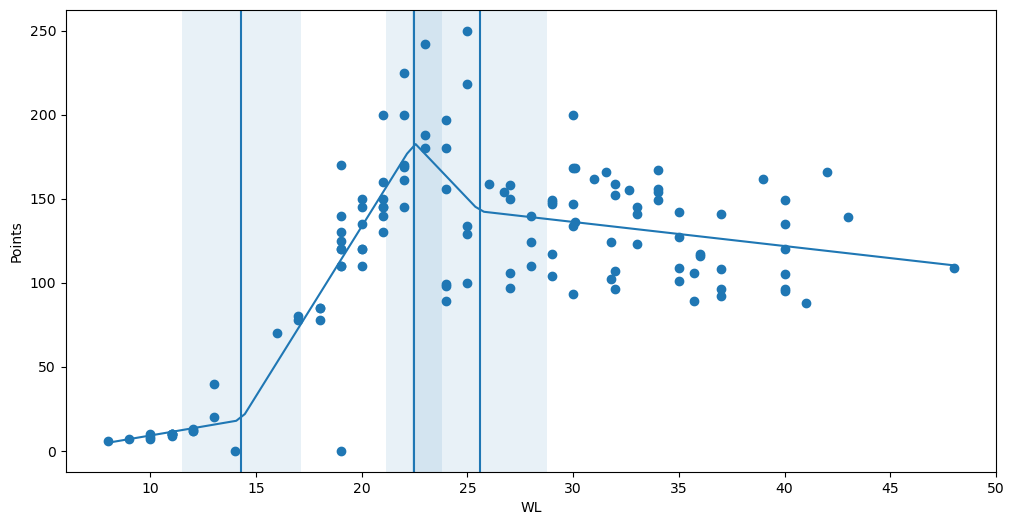

In [181]:
pw_fit=piecewise_regression.Fit(X_train_clean.WL.ravel(),y_train.ravel(),n_breakpoints=3)
pw_fit.plot()
plt.xlabel("WL")
plt.ylabel("Points")
plt.show()

In [182]:
print(pw_fit.summary())


                    Breakpoint Regression Results                     
No. Observations                      124
No. Model Parameters                    8
Degrees of Freedom                    116
Res. Sum of Squares           1.04085e+05
Total Sum of Squares          3.66284e+05
R Squared                        0.715835
Adjusted R Squared               0.696067
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               -12.4615         56.2     -0.22159         0.825      -123.84        98.92
alpha1               2.15385         5.01      0.42992         0.668      -7.7688       12.077
beta1                18.0387         5.97       3.0206             -       6.2108       29.867
beta2               -33.3962         11.3      -2.9649             -      -55.706      -11.086
beta3            

This data appears to be the output of a breakpoint regression model. Here is a summary of the information that is provided:

The model was fit to 124 observations, with 8 parameters estimated.
The model has an R-squared value of 0.715835, which means that approximately 72% of the variance in the response variable is explained by the model.

The estimated values for the model parameters are provided, along with their standard errors, t-values, and p-values.
There are three breakpoints in the model, which divide the range of the predictor variable into four segments. For each segment, the estimated value of the gradient (alpha) is calculated from the estimated values of the change in gradient (beta) at the breakpoints. The estimated values for the breakpoints and the gradients are provided in the table.
The data includes 95% confidence intervals for the estimated parameter values.

Based on this output, you can use the estimated model parameters to make predictions about the response variable given a new set of predictor variable values. However, you should also evaluate the model's performance using additional metrics and methods to ensure that it is a good fit for the data and that it is not overfitting.

In [183]:
# non zero difference in slopes (slope params) when there are segments

In [184]:
overall_model=piecewise_regression.ModelSelection(X_train_clean.WL.ravel(),y_train.ravel(),max_breakpoints=5)

Running fit with n_breakpoint = 0 . . 
Running fit with n_breakpoint = 1 . . 
Running fit with n_breakpoint = 2 . . 
Running fit with n_breakpoint = 3 . . 
Running fit with n_breakpoint = 4 . . 
Running fit with n_breakpoint = 5 . . 

                 Breakpoint Model Comparision Results                 
n_breakpoints            BIC    converged          RSS 
----------------------------------------------------------------------------------------------------
0                     971.16         True   2.8907e+05 
1                     867.23         True   1.1568e+05 
2                     868.91         True   1.0849e+05 
3                     873.41         True   1.0409e+05 
4                     881.08         True   1.0244e+05 
5                     887.69         True   9.9965e+04 

Min BIC (Bayesian Information Criterion) suggests best model


This data shows the results of comparing breakpoint models with different numbers of breakpoints. The models were fit to some data, and the comparison was based on the Bayesian Information Criterion (BIC) which measures the trade-off between model complexity and model fit.

Here are some key points to consider when interpreting this data:

The models were run with up to 5 breakpoints. This means that the models were fit to different data segments that were defined by the breakpoints.
For each model, the BIC value, converged status, and residual sum of squares (RSS) are provided. The BIC value is used to compare the models and select the best one. A lower BIC value indicates a better model fit, while a higher BIC value indicates a model that is too complex or overfitting the data.
Based on the BIC values, the best model is the one with 5 breakpoints, as it has the lowest BIC value of 887.69. This model fits the data better than the other models.

It is important to note that the best model may not necessarily be the most useful or practical one. Adding more breakpoints may make the model more complex and harder to interpret, and may not add much value to the predictions or insights gained from the model. Therefore, it is important to consider the trade-offs between model fit and model complexity when choosing the best model.

Plotting fit for the model with 1 breakpoints


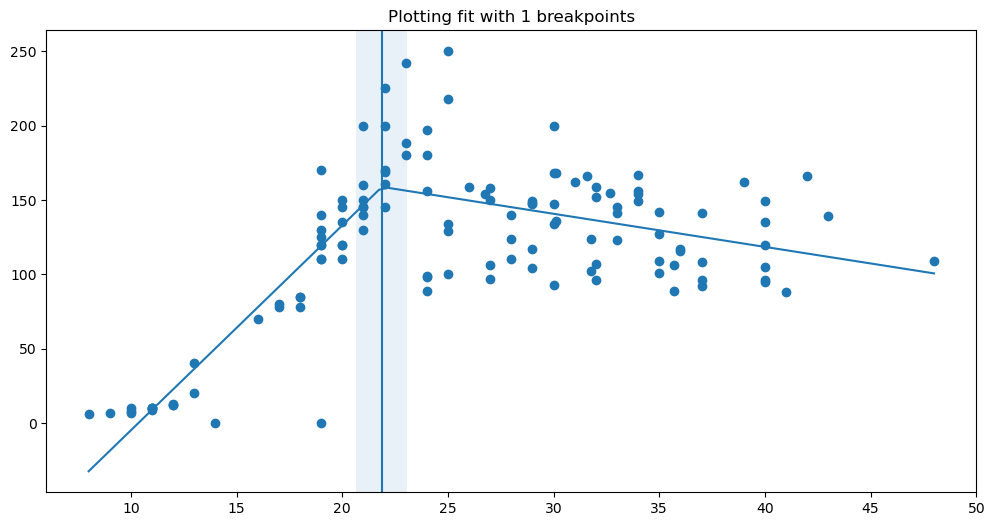

Plotting fit for the model with 2 breakpoints


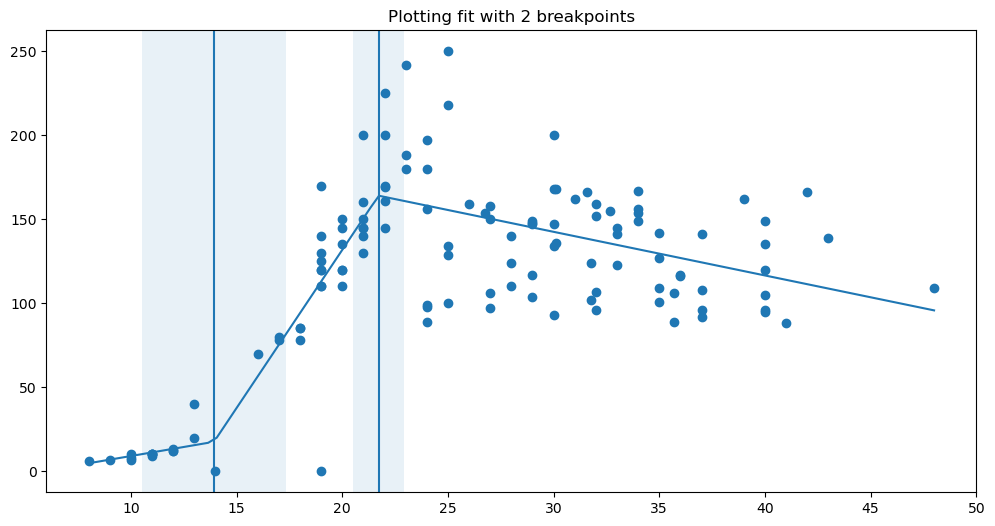

Plotting fit for the model with 3 breakpoints


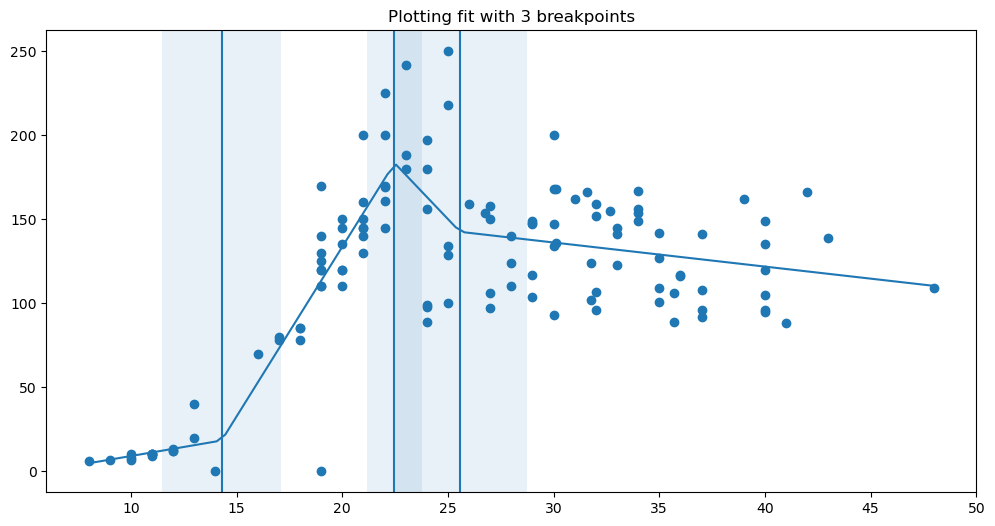

Plotting fit for the model with 4 breakpoints


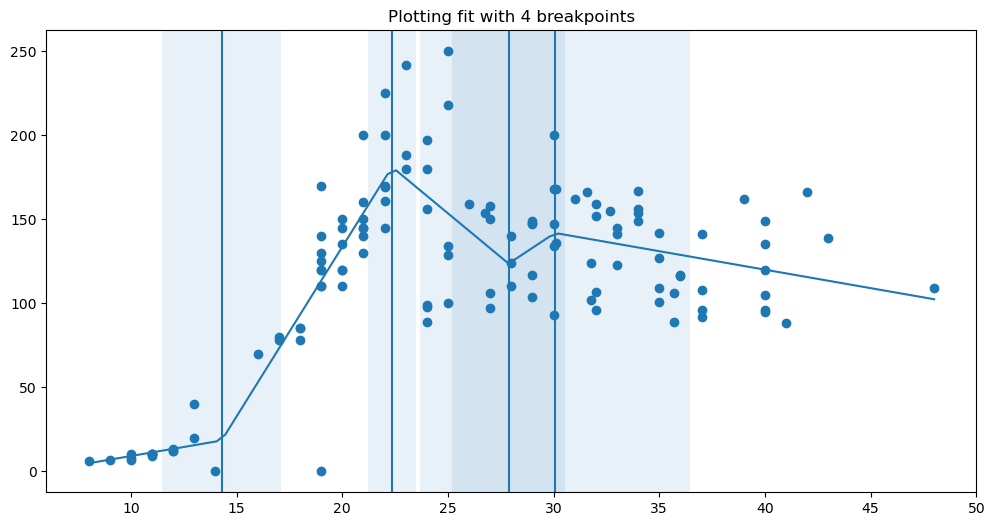

Plotting fit for the model with 5 breakpoints


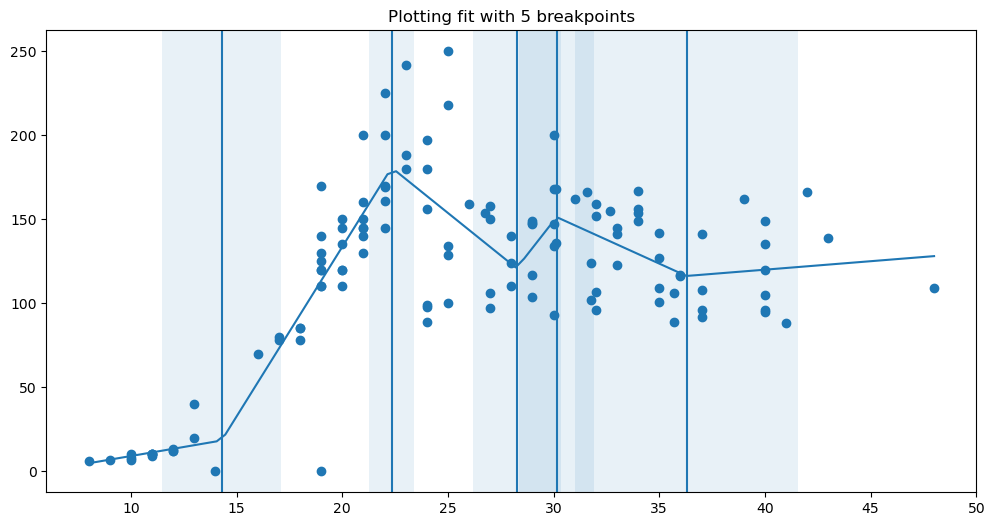

In [185]:
for model in overall_model.models:
  print("Plotting fit for the model with {} breakpoints".format(model.n_breakpoints))
  model.plot()
  plt.title("Plotting fit with {} breakpoints".format(model.n_breakpoints))
  plt.show()

This code loops through each model in an object called overall_model and produces a plot for each model's fit. The plot shows the relationship between two variables (typically a predictor and response variable), with the fitted model overlaid on the scatter plot of the data.

For each model, the code prints a message indicating the number of breakpoints in the model, and then produces the plot using the model.plot() method. The title of each plot also includes the number of breakpoints in the model. Finally, the plot is displayed using the plt.show() function.

Overall, this code is useful for visualizing the fit of different models and understanding how the number of breakpoints affects the fit of the model. It can help identify the best model with the optimal number of breakpoints based on the visual inspection of the data and the model's fit.

In [186]:
pw_fit=piecewise_regression.Fit(X_train_clean.WL.ravel(),y_train.ravel(),n_breakpoints=1)

In [187]:
pw_fit.get_results()

{'estimates': {'const': {'estimate': -142.7578184591917,
   'se': 17.737372055302103,
   'confidence_interval': (-177.87658069721778, -107.6390562211656),
   't_stat': -8.048419913282371,
   'p_t': 6.834143020672123e-13},
  'beta1': {'estimate': -16.010352804128896,
   'se': 1.1937771517279379,
   'confidence_interval': (-18.37394848369234, -13.64675712456545),
   't_stat': -13.411508823866031,
   'p_t': '-'},
  'breakpoint1': {'estimate': 21.878446243651663,
   'se': 0.6092550747576223,
   'confidence_interval': (20.672163596706344, 23.08472889059698),
   't_stat': '-',
   'p_t': '-'},
  'alpha1': {'estimate': 13.782735825069917,
   'se': 1.0086522078404845,
   'confidence_interval': (11.785674650642928, 15.779796999496906),
   't_stat': 13.664507664716893,
   'p_t': 3.2614854087766634e-26},
  'alpha2': {'estimate': -2.227616979058979,
   'se': 0.63853317189177,
   'confidence_interval': (-3.491868220722285, -0.9633657373956728),
   't_stat': -3.4886472263598476,
   'p_t': 0.000679516

The data is an output of a breakpoint regression analysis. The analysis produced estimates of several parameters, including the intercept (const), two slopes (alpha1 and alpha2), and a breakpoint (breakpoint1). The estimate of the intercept is -142.7578, and the estimate of beta1 is -16.0104. The estimate of alpha1 is 13.7827, and the estimate of alpha2 is -2.2276. The analysis converged, and the BIC is 867.2295, which is the Bayesian Information Criterion that is used to compare models. The residual sum of squares (RSS) is 115679.0300. The confidence intervals are also provided for each of the estimates.

In [188]:
#2 ways ---> Sklearn linear tree regressor - > Bin --> 2
#piecewise

In [193]:
!git clone https://github.com/DataDog/piecewise.git

fatal: destination path 'piecewise' already exists and is not an empty directory.


In [194]:
import sys
sys.path.append('piecewise/')

In [212]:
!python "C:\Users\Joseph\OneDrive\Documents\Data Analyst Projects\Build Piecewise and Spline Regression Models\setup.py" install

running install
running bdist_egg
running egg_info
creating piecewise.egg-info
writing piecewise.egg-info\PKG-INFO
writing dependency_links to piecewise.egg-info\dependency_links.txt
writing requirements to piecewise.egg-info\requires.txt
writing top-level names to piecewise.egg-info\top_level.txt
writing manifest file 'piecewise.egg-info\SOURCES.txt'
reading manifest file 'piecewise.egg-info\SOURCES.txt'
writing manifest file 'piecewise.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
creating build
creating build\lib
creating build\lib\piecewise
copying piecewise\setup.py -> build\lib\piecewise
creating build\bdist.win-amd64
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\piecewise
copying build\lib\piecewise\setup.py -> build\bdist.win-amd64\egg\piecewise
byte-compiling build\bdist.win-amd64\egg\piecewise\setup.py to setup.cpython-39.pyc
creating build\bdist.win-amd64\egg\EGG-INFO
copying piecewise.

C:\Users\Joseph\anaconda3\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
C:\Users\Joseph\anaconda3\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
zip_safe flag not set; analyzing archive contents...


In [213]:
from piecewise.regressor import piecewise

In [214]:
model_piecewise=piecewise(X_train_clean.WL.ravel(),y_train.ravel())

In [215]:
model_piecewise

FittedModel with segments:
* FittedSegment(start_t=8.0, end_t=24.0, coeffs=(-149.27476696293087, 14.25251101958234))
* FittedSegment(start_t=24.0, end_t=48.0, coeffs=(186.24284623321475, -1.6255275173889074))

In [216]:
len(model_piecewise.segments)

2

In [217]:
y_pred=model_piecewise.predict(test.WL.ravel())

In [218]:
y_pred

array([113.09410795,  78.76540935, 178.53298649,  36.00787629,
       145.6046583 , 107.27043139, 128.21214644, 129.34938312,
       135.77545343, 126.09832809, 147.23018582,  50.26038731,
       143.97913078, 139.10254823,  50.26038731, 126.09832809,
       147.23018582, 134.22596568, 124.47280057,  64.51289833,
       132.60043816, 101.71541533,  93.01792037, 107.27043139,
       121.52294241,  78.76540935, 127.72385561,  50.26038731,
       150.02796445, 107.27043139, 143.97913078, 150.02796445])

In [219]:
from sklearn.metrics import r2_score,mean_squared_error

print(r2_score(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5297573113310377
30.79965336042145


In [224]:
def truefoundry_model_tracker(project_name, run_name, model_object, model_name, framework, description, test, pred):
  run = mlfoundry.create_run(project_name, run_name)
  try:
    if hasattr(model_object, 'params'):
      run.log_params(model_object.params.to_dict())
    else:
      raise AttributeError('Model object has no params attribute')
  except AttributeError:
    run.log_params({'params': 'not available'})
  run.log_model(name=model_name, model=model_object, framework=framework, description=description)
  run.log_metrics({
    'r2_score': metrics.r2_score(test,pred),
    'explained_variance_score': metrics.explained_variance_score(test,pred),
    'max_error': metrics.max_error(test,pred),
    'mean_absolute_error': metrics.mean_absolute_error(test,pred),
    'mean_squared_error': metrics.mean_squared_error(test,pred),
    'mean_squared_log_error': metrics.mean_squared_log_error(test,pred),
    'median_absolute_error': metrics.median_absolute_error(test,pred),
  })
  run.finish()

## Splines! Are Here! 

In [226]:
from patsy import dmatrix
x = np.linspace(0., 1., 500)
knots = [0.2, 0.5, 0.9]

B0 = dmatrix("bs(x, knots=knots, degree=0, include_intercept=True) - 1", 
             {"x": x, "knots":knots})
B1 = dmatrix("bs(x, knots=knots, degree=1, include_intercept=True) - 1",
             {"x": x, "knots":knots})
B3 = dmatrix("bs(x, knots=knots, degree=5,include_intercept=True) - 1",
             {"x": x, "knots":knots})

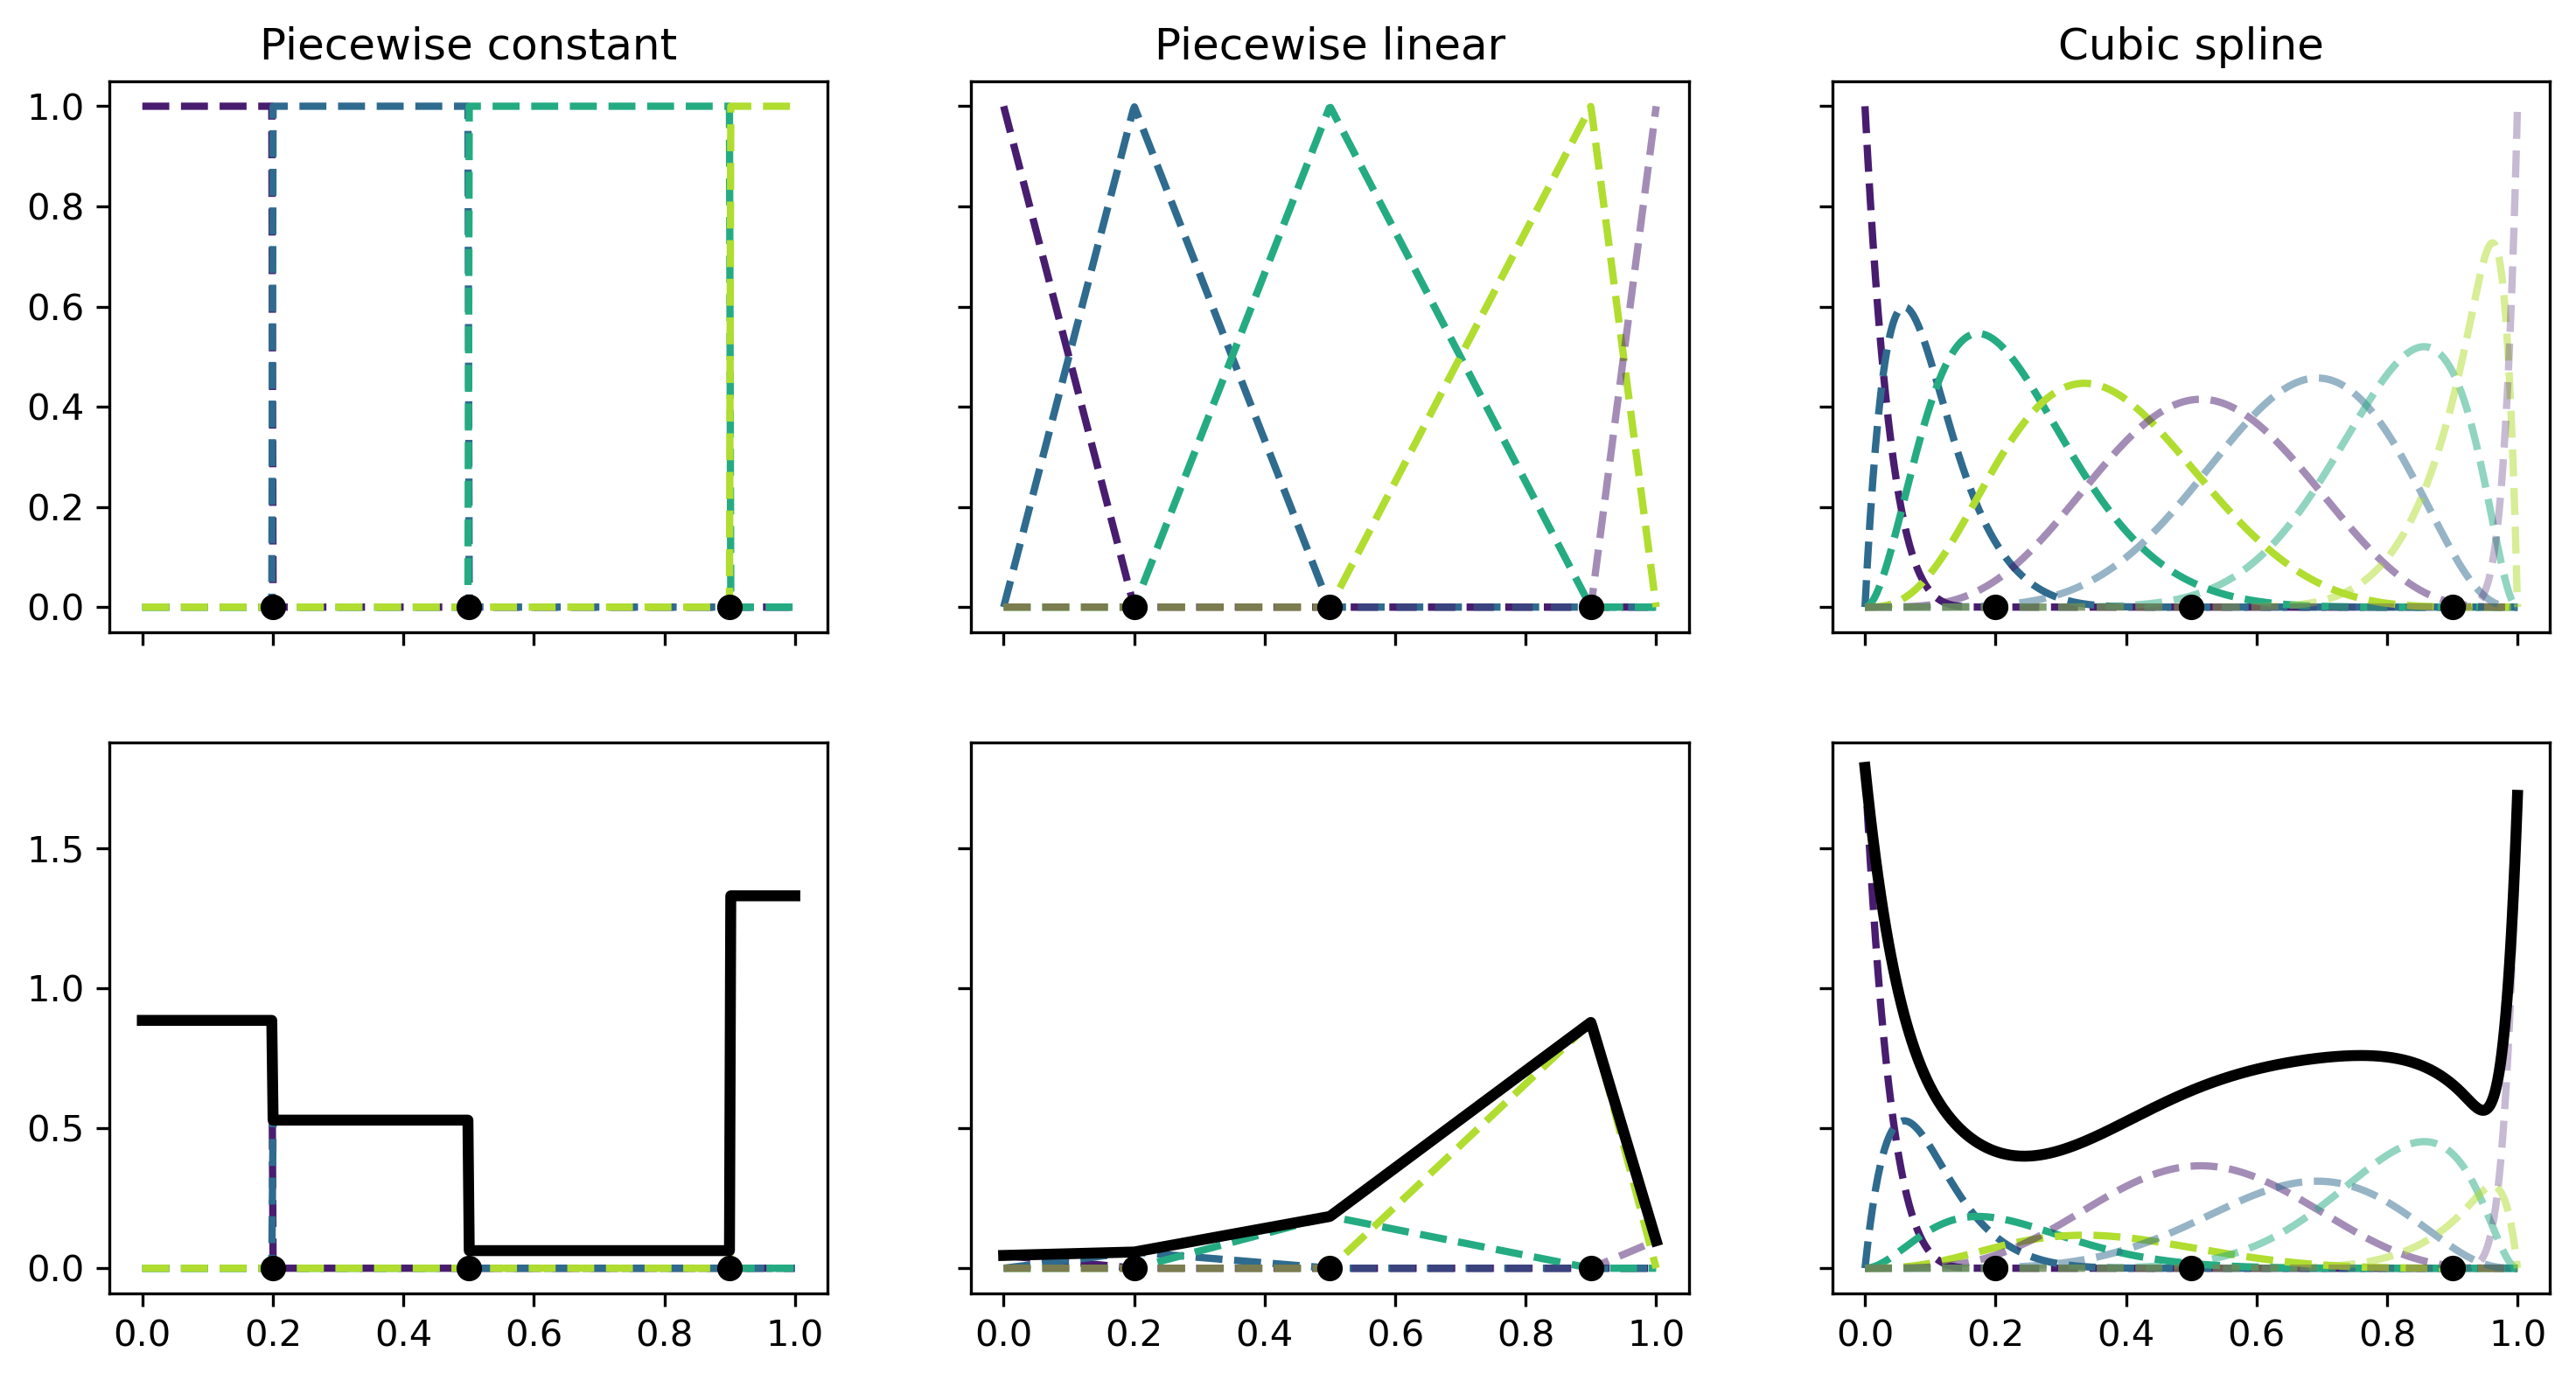

In [231]:
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
import pandas as pd
from scipy import stats
from patsy import bs, dmatrix

#from scripts.splines import splines


plt.rcParams["figure.dpi"] = 300
np.random.seed(435)
viridish = [(0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 1.0),
            (0.1843137254901961, 0.4196078431372549, 0.5568627450980392, 1.0),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 1.0),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 1.0),
            (0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 0.5),
            (0.1843137254901961, 0.4196078431372549, 0.5568627450980392, 0.5),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 0.5),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 0.5),
            (0.2823529411764706, 0.11372549019607843, 0.43529411764705883, 0.3),
            (0.1843137254901961, 0.4196078431372549, 0.5568627450980392, 0.3),
            (0.1450980392156863, 0.6705882352941176, 0.5098039215686274, 0.3),
            (0.6901960784313725, 0.8666666666666667, 0.1843137254901961, 0.3)]


_, axes = plt.subplots(2, 3, sharex=True, sharey="row")
for idx, (B, title) in enumerate(zip((B0, B1, B3),
                                     ("Piecewise constant",
                                      "Piecewise linear",
                                      "Cubic spline"))):
    # plot spline basis functions
    for i in range(B.shape[1]):
        axes[0, idx].plot(x, B[:, i],color=viridish[i], lw=2, ls="--")
    # we generate some positive random coefficients 
    # there is nothing wrong with negative values
    β = np.abs(np.random.normal(0, 1, size=B.shape[1]))
    # plot spline basis functions scaled by its β
    for i in range(B.shape[1]):
        axes[1, idx].plot(x, B[:, i]*β[i],color=viridish[i], lw=2, ls="--")
    # plot the sum of the basis functions
    axes[1, idx].plot(x, np.dot(B, β), color="k", lw=3)
    # plot the knots
    axes[0, idx].plot(knots, np.zeros_like(knots), "ko")
    axes[1, idx].plot(knots, np.zeros_like(knots), "ko")
    axes[0, idx].set_title(title)

Text(0, 0.5, 'Points')

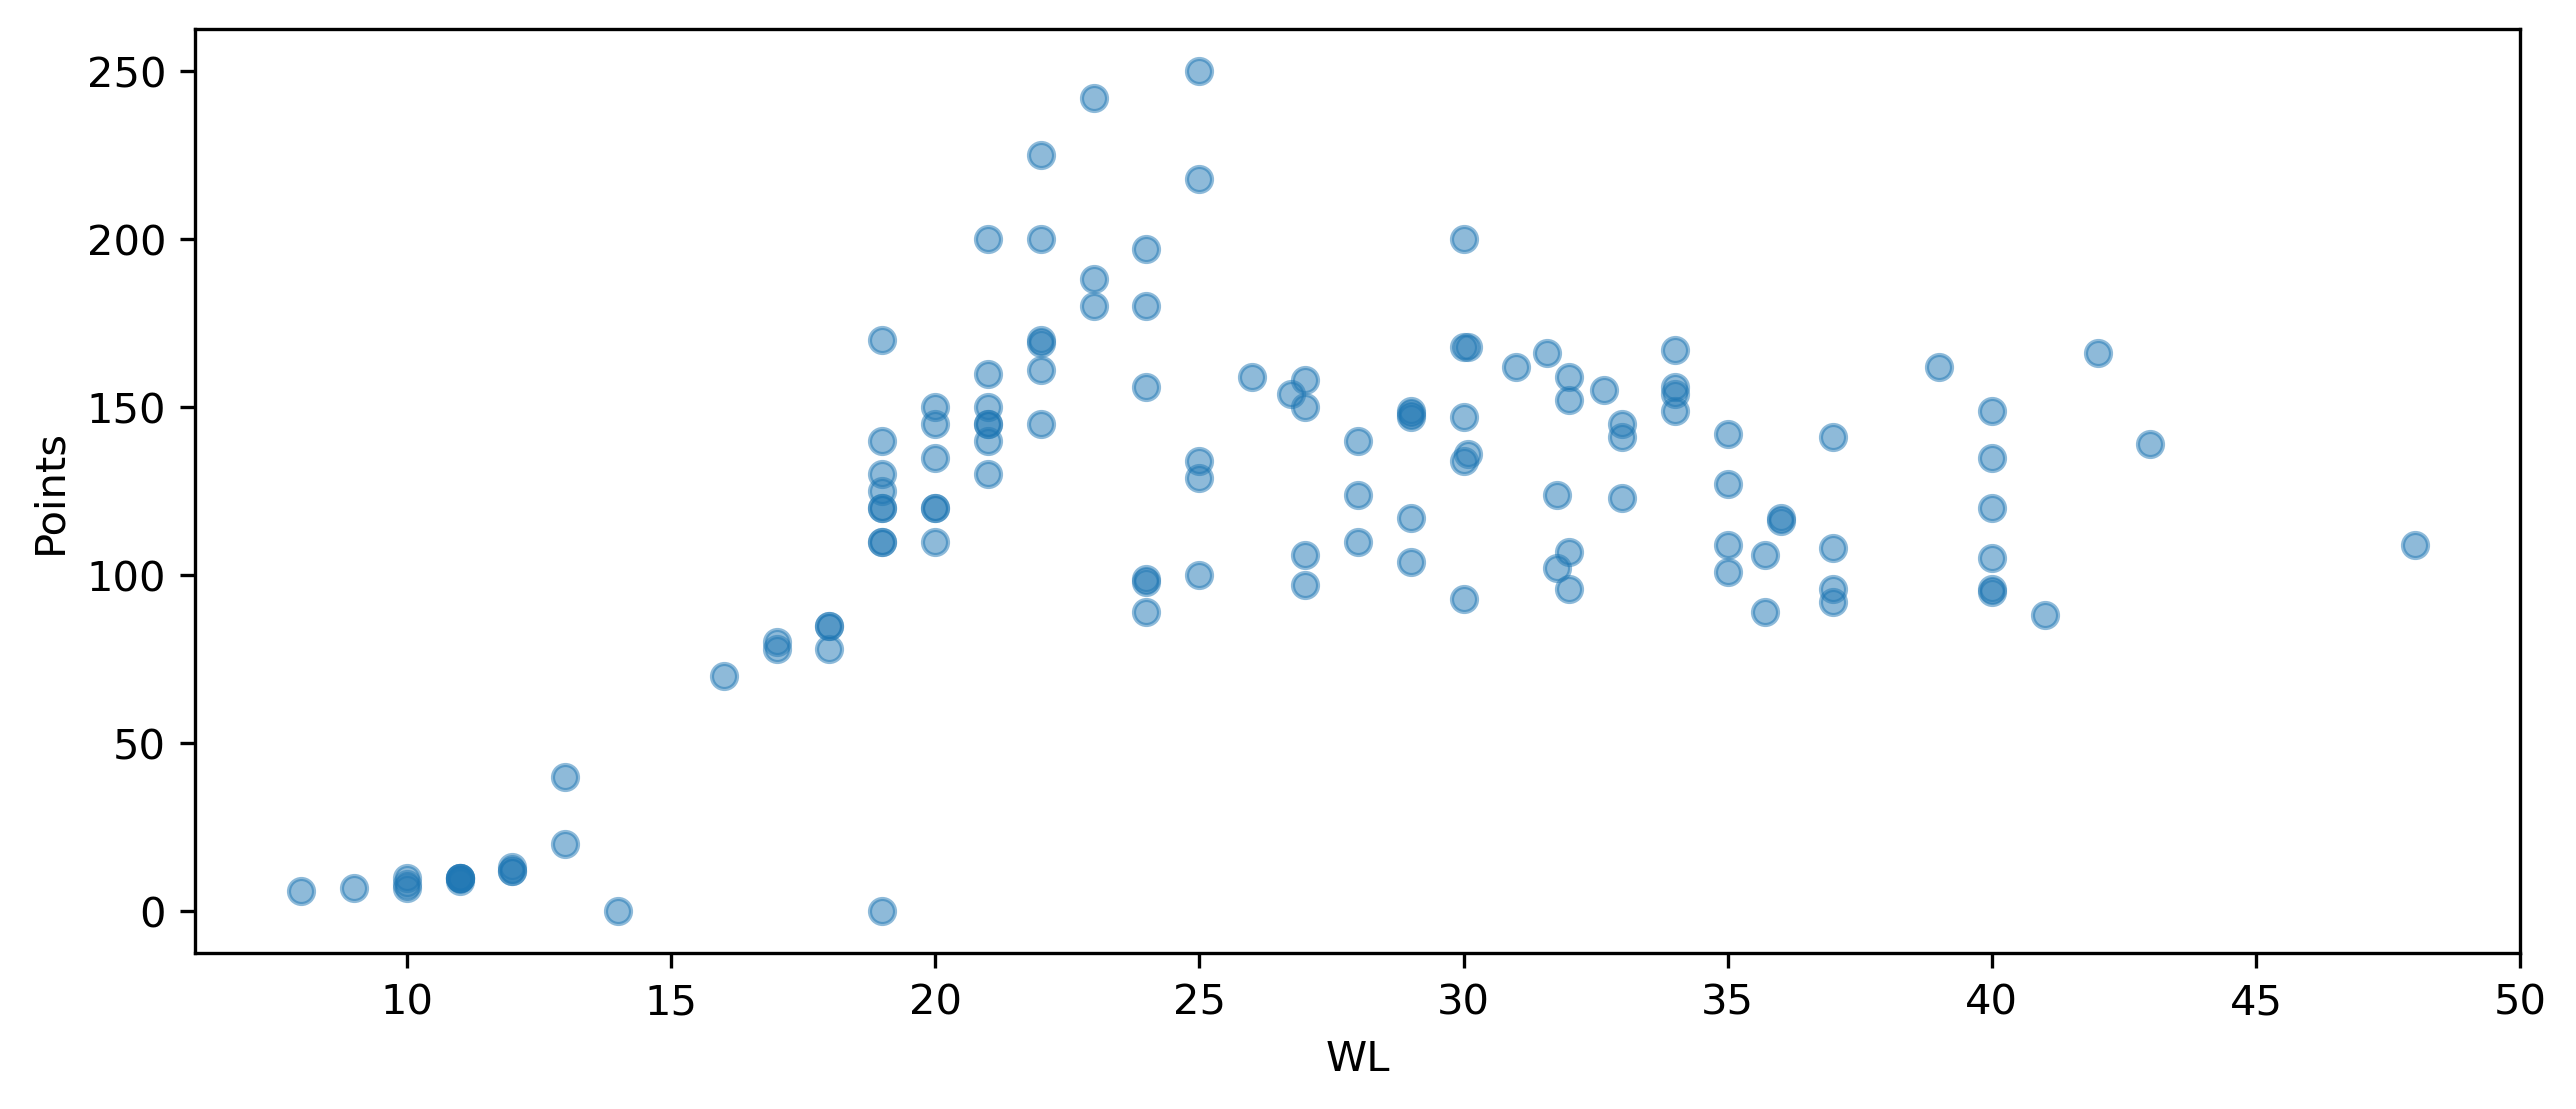

In [232]:
_,ax=plt.subplots(1,1,figsize=(10,4))
ax.plot(X_train_clean.WL,y_train,"o",alpha=0.5)
ax.set_xlabel("WL")
ax.set_ylabel("Points")

In [233]:
from patsy import dmatrix

In [234]:
X_spline=dmatrix('bs(x,df=5,degree=3,include_intercept=False)',{'x':X_train_clean.WL},return_type='dataframe')

In [235]:
spline_fit=sm.GLM(y_train,X_spline).fit()

In [236]:
spline_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     PS   No. Observations:                  124
Model:                            GLM   Df Residuals:                      118
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                          964.59
Method:                          IRLS   Log-Likelihood:                -598.92
Date:                Sat, 04 Mar 2023   Deviance:                   1.1382e+05
Time:                        19:05:02   Pearson chi2:                 1.14e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8790
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                            26.9061     20.780      1.295      0.195     -13.822      67.635
bs(x, df=5, degree=3, include_intercept=False)[0]   -83.3708     40.775     -2.045      0.041    -163.289      -3.453
bs(x, df=5, degree=3, include_intercept=False)[1]   186.9353     19.408      9.632      0.000     148.897     224.974
bs(x, df=5, degree=3, include_intercept=False)[2]    73.2419     30.615      2.392      0.017      13.238     133.246
bs(x, df=5, degree=3, include_intercept=False)[3]   106.3741     28.197      3.773      0.000      51.109     161.639
bs(x, df=5, degree=3, include_intercept=False)[4]    86.8721     36.802      2.361      0.018      14.742     159.002
=====================================================================================================================
"""

This is the summary output of a generalized linear model regression analysis. The dependent variable is "PS" and the model is a Gaussian GLM with an identity link function. There are 5 predictors, which are each represented by a bs(x,...) term. These terms represent a basis spline function of degree 3 with 5 degrees of freedom.

The summary includes the coefficients for each predictor, their standard error, z-score, p-value, and a 95% confidence interval. The intercept coefficient is 26.9061 with a standard error of 20.780, and it is not statistically significant with a p-value of 0.195. The second predictor has a coefficient of -83.3708 and is statistically significant with a p-value of 0.041. The third, fourth, and fifth predictors have coefficients of 186.9353, 73.2419, and 106.3741, respectively, and all are statistically significant with p-values less than 0.05. The deviance and Pearson chi-squared values indicate goodness of fit, with a high pseudo R-squared value of 0.8790 suggesting a good fit of the model to the data.

In [237]:
spline_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Generalized linear model
=====================================================================================================
Model:                           GLM                          AIC:                        1209.8382  
Link Function:                   identity                     BIC:                        113253.0667
Dependent Variable:              PS                           Log-Likelihood:             -598.92    
Date:                            2023-03-04 19:05             LL-Null:                    -729.86    
No. Observations:                124                          Deviance:                   1.1382e+05 
Df Model:                        5                            Pearson chi2:               1.14e+05   
Df Residuals:                    118                          Scale:                      964.59     
Method:                          IRLS                                                                
-----------------------------------------------------------------------------------------------------
                                                   Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-----------------------------------------------------------------------------------------------------
Intercept                                          26.9061  20.7802  1.2948 0.1954  -13.8223  67.6345
bs(x, df=5, degree=3, include_intercept=False)[0] -83.3708  40.7753 -2.0446 0.0409 -163.2889  -3.4528
bs(x, df=5, degree=3, include_intercept=False)[1] 186.9353  19.4079  9.6319 0.0000  148.8965 224.9741
bs(x, df=5, degree=3, include_intercept=False)[2]  73.2419  30.6148  2.3924 0.0167   13.2380 133.2458
bs(x, df=5, degree=3, include_intercept=False)[3] 106.3741  28.1969  3.7725 0.0002   51.1092 161.6390
bs(x, df=5, degree=3, include_intercept=False)[4]  86.8721  36.8017  2.3605 0.0182   14.7422 159.0021
=====================================================================================================

"""

This is the summary of a Generalized Linear Model (GLM) regression analysis with identity link function. The dependent variable is PS and the data consists of 124 observations. The model includes 5 predictors represented by bs(x, df=5, degree=3, include_intercept=False)[0], bs(x, df=5, degree=3, include_intercept=False)[1], bs(x, df=5, degree=3, include_intercept=False)[2], bs(x, df=5, degree=3, include_intercept=False)[3], and bs(x, df=5, degree=3, include_intercept=False)[4].

The table provides the estimated coefficients of the model, along with their standard errors, z-scores, and p-values. The intercept has a coefficient of 26.9061 with a standard error of 20.7802. The first predictor (bs(x, df=5, degree=3, include_intercept=False)[0]) has a coefficient of -83.3708 with a standard error of 40.7753. The second predictor (bs(x, df=5, degree=3, include_intercept=False)[1]) has a coefficient of 186.9353 with a standard error of 19.4079. The third predictor (bs(x, df=5, degree=3, include_intercept=False)[2]) has a coefficient of 73.2419 with a standard error of 30.6148. The fourth predictor (bs(x, df=5, degree=3, include_intercept=False)[3]) has a coefficient of 106.3741 with a standard error of 28.1969. Finally, the fifth predictor (bs(x, df=5, degree=3, include_intercept=False)[4]) has a coefficient of 86.8721 with a standard error of 36.8017.

The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are also provided, which can be used to compare the current model with other models. The log-likelihood and deviance are also presented, which are measures of how well the model fits the data. The Pearson chi2 and the number of degrees of freedom are reported, which can be used to test for the goodness of fit of the model.

In [238]:
X_spline=dmatrix('bs(x,df=6,degree=3,include_intercept=True)',{'x':X_train_clean.WL},return_type='dataframe')
spline_fit_2=sm.GLM(y_train,X_spline).fit()
spline_fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     PS   No. Observations:                  124
Model:                            GLM   Df Residuals:                      118
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                          964.59
Method:                          IRLS   Log-Likelihood:                -598.92
Date:                Sat, 04 Mar 2023   Deviance:                   1.1382e+05
Time:                        19:06:02   Pearson chi2:                 1.14e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8790
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           75.9271      4.313     17.605      0.000      67.474      84.380
bs(x, df=6, degree=3, include_intercept=True)[0]   -49.0209     19.944     -2.458      0.014     -88.110      -9.932
bs(x, df=6, degree=3, include_intercept=True)[1]  -132.3918     23.661     -5.595      0.000    -178.766     -86.018
bs(x, df=6, degree=3, include_intercept=True)[2]   137.9144     15.481      8.909      0.000     107.572     168.257
bs(x, df=6, degree=3, include_intercept=True)[3]    24.2210     17.617      1.375      0.169     -10.307      58.749
bs(x, df=6, degree=3, include_intercept=True)[4]    57.3532     23.368      2.454      0.014      11.552     103.154
bs(x, df=6, degree=3, include_intercept=True)[5]    37.8512     26.481      1.429      0.153     -14.051      89.754
====================================================================================================================
"""

This is the result of a Generalized Linear Model regression analysis. The dependent variable is PS, and there are 124 observations in the dataset. The model has 5 degrees of freedom and uses the identity link function. The Scale parameter is 964.59, indicating the variance of the errors. The method used for the analysis is IRLS (Iteratively Reweighted Least Squares). The Intercept has an estimated coefficient of 75.9271 and a standard error of 4.313, indicating that it is statistically significant (p < 0.0001). The remaining predictor variables are in the form of a spline function, with degrees of freedom ranging from 6 to 7. The coefficients for these predictors are also statistically significant (p < 0.05), except for the predictor corresponding to the fourth degree of freedom. The Pseudo R-squared value of 0.879 indicates that the model has a good fit to the data.

In [239]:
spline_fit_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Generalized linear model
=====================================================================================================
Model:                           GLM                          AIC:                        1209.8382  
Link Function:                   identity                     BIC:                        113253.0667
Dependent Variable:              PS                           Log-Likelihood:             -598.92    
Date:                            2023-03-04 19:07             LL-Null:                    -729.86    
No. Observations:                124                          Deviance:                   1.1382e+05 
Df Model:                        5                            Pearson chi2:               1.14e+05   
Df Residuals:                    118                          Scale:                      964.59     
Method:                          IRLS                                                                
-----------------------------------------------------------------------------------------------------
                                                   Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
-----------------------------------------------------------------------------------------------------
Intercept                                          75.9271   4.3129 17.6047 0.0000   67.4739  84.3802
bs(x, df=6, degree=3, include_intercept=True)[0]  -49.0209  19.9438 -2.4580 0.0140  -88.1100  -9.9319
bs(x, df=6, degree=3, include_intercept=True)[1] -132.3918  23.6607 -5.5954 0.0000 -178.7660 -86.0176
bs(x, df=6, degree=3, include_intercept=True)[2]  137.9144  15.4810  8.9086 0.0000  107.5722 168.2566
bs(x, df=6, degree=3, include_intercept=True)[3]   24.2210  17.6165  1.3749 0.1692  -10.3067  58.7487
bs(x, df=6, degree=3, include_intercept=True)[4]   57.3532  23.3683  2.4543 0.0141   11.5521 103.1542
bs(x, df=6, degree=3, include_intercept=True)[5]   37.8512  26.4813  1.4294 0.1529  -14.0511  89.7535
=====================================================================================================

"""

This data represents the output of a Generalized Linear Model Regression. The dependent variable is "PS". The number of observations is 124. The model has a Gaussian family and identity link function. The method used for the model is IRLS (Iteratively Reweighted Least Squares). The deviance is 1.1382e+05 and the Pearson chi-squared value is 1.14e+05. The Pseudo R-squared (CS) is 0.8790. The model has five degrees of freedom and residuals are nonrobust. The coefficients, standard error, z-score, p-value, and confidence interval for each variable are shown. The AIC and BIC values are 1209.8382 and 113253.0667, respectively.

In [240]:
y_pred_train=spline_fit.predict(dmatrix('bs(x,df=5,degree=3,include_intercept=False)',{'x':X_train_clean.WL},return_type='dataframe'))

rmse_train=np.sqrt(mean_squared_error(y_train,y_pred_train))
print(rmse_train)
print(r2_score(y_train,y_pred_train))

30.297165304866184
0.6892523833650355


In [241]:
y_pred_test=spline_fit.predict(dmatrix('bs(x,df=5,degree=3,include_intercept=False)',{'x':test.WL},return_type='dataframe'))

rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
print(rmse_test)
print(r2_score(y_test,y_pred_test))

40.26924915589129
0.19614547928478232


In [242]:
y_pred_test=spline_fit_2.predict(dmatrix('bs(x,df=6,degree=3,include_intercept=True)',{'x':test.WL},return_type='dataframe'))

rmse_test=np.sqrt(mean_squared_error(y_test,y_pred_test))
print(rmse_test)
print(r2_score(y_test,y_pred_test))

40.26924915589126
0.19614547928478343


In [244]:
comparison=pd.concat([X_train_clean.WL,y_train,y_pred_train],axis=1)
comparison.columns=['WL','Real/Actual Points','Fitted Points']
print(comparison)

            WL  Real/Actual Points  Fitted Points
93   21.000000                 145     146.769963
153  11.000000                  10       3.610076
2    24.000000                 156     160.838919
132  36.000000                 116     124.120905
59   34.000000                 156     126.349499
..         ...                 ...            ...
45   21.000000                 160     146.769963
147  10.000000                   7       4.380242
21   30.094188                 168     137.521578
78   17.000000                  78      84.066851
52   24.000000                  99     160.838919

[124 rows x 3 columns]


In [245]:
comparison=pd.concat([test.WL,y_test,y_pred_test],axis=1)
comparison.columns=['WL','Real/Actual Points','Predicted Points']
print(comparison)

            WL  Real/Actual Points  Predicted Points
139  45.000000                 166        122.562864
63   16.000000                  90         17.574028
70   23.000000                 103        168.830767
73   13.000000                  32         26.906140
53   25.000000                 105        167.821486
38   18.000000                  87         85.064496
33   35.699611                 119        128.251869
115  35.000000                 150        129.348689
88   20.000000                 130        138.029027
60   37.000000                 122        126.627133
71   24.000000                 161        169.855043
61   14.000000                  55         -2.505252
57   26.000000                 167        163.668287
11   29.000000                 147        147.708439
74   14.000000                  40         -2.505252
121  37.000000                 100        126.627133
1    24.000000                 144        169.855043
129  32.000000                 155        136.

In [246]:
#Plotting the spline

range_pred=np.linspace(np.min(X_train_clean.WL),np.max(X_train_clean.WL),50)
prediction=spline_fit.predict(dmatrix('bs(xp,df=5,degree=3,include_intercept=False)',{'xp':range_pred},return_type='dataframe'))

In [247]:
prediction

0      26.906140
1      13.980489
2       5.549533
3       1.193225
4       0.491520
5       3.024372
6       8.371733
7      16.113559
8      25.829804
9      37.100420
10     49.505363
11     62.624586
12     76.038043
13     89.325688
14    102.067474
15    113.843357
16    124.233290
17    132.845705
18    139.620096
19    144.709544
20    148.270690
21    150.460177
22    151.434645
23    151.350736
24    150.365091
25    148.634351
26    146.315158
27    143.564152
28    140.537976
29    137.393270
30    134.286677
31    131.374836
32    128.814391
33    126.760476
34    125.277930
35    124.291632
36    123.714417
37    123.459123
38    123.438589
39    123.565650
40    123.753145
41    123.913911
42    123.960785
43    123.806605
44    123.364207
45    122.546431
46    121.266111
47    119.436088
48    116.969196
49    113.778275
dtype: float64

[]

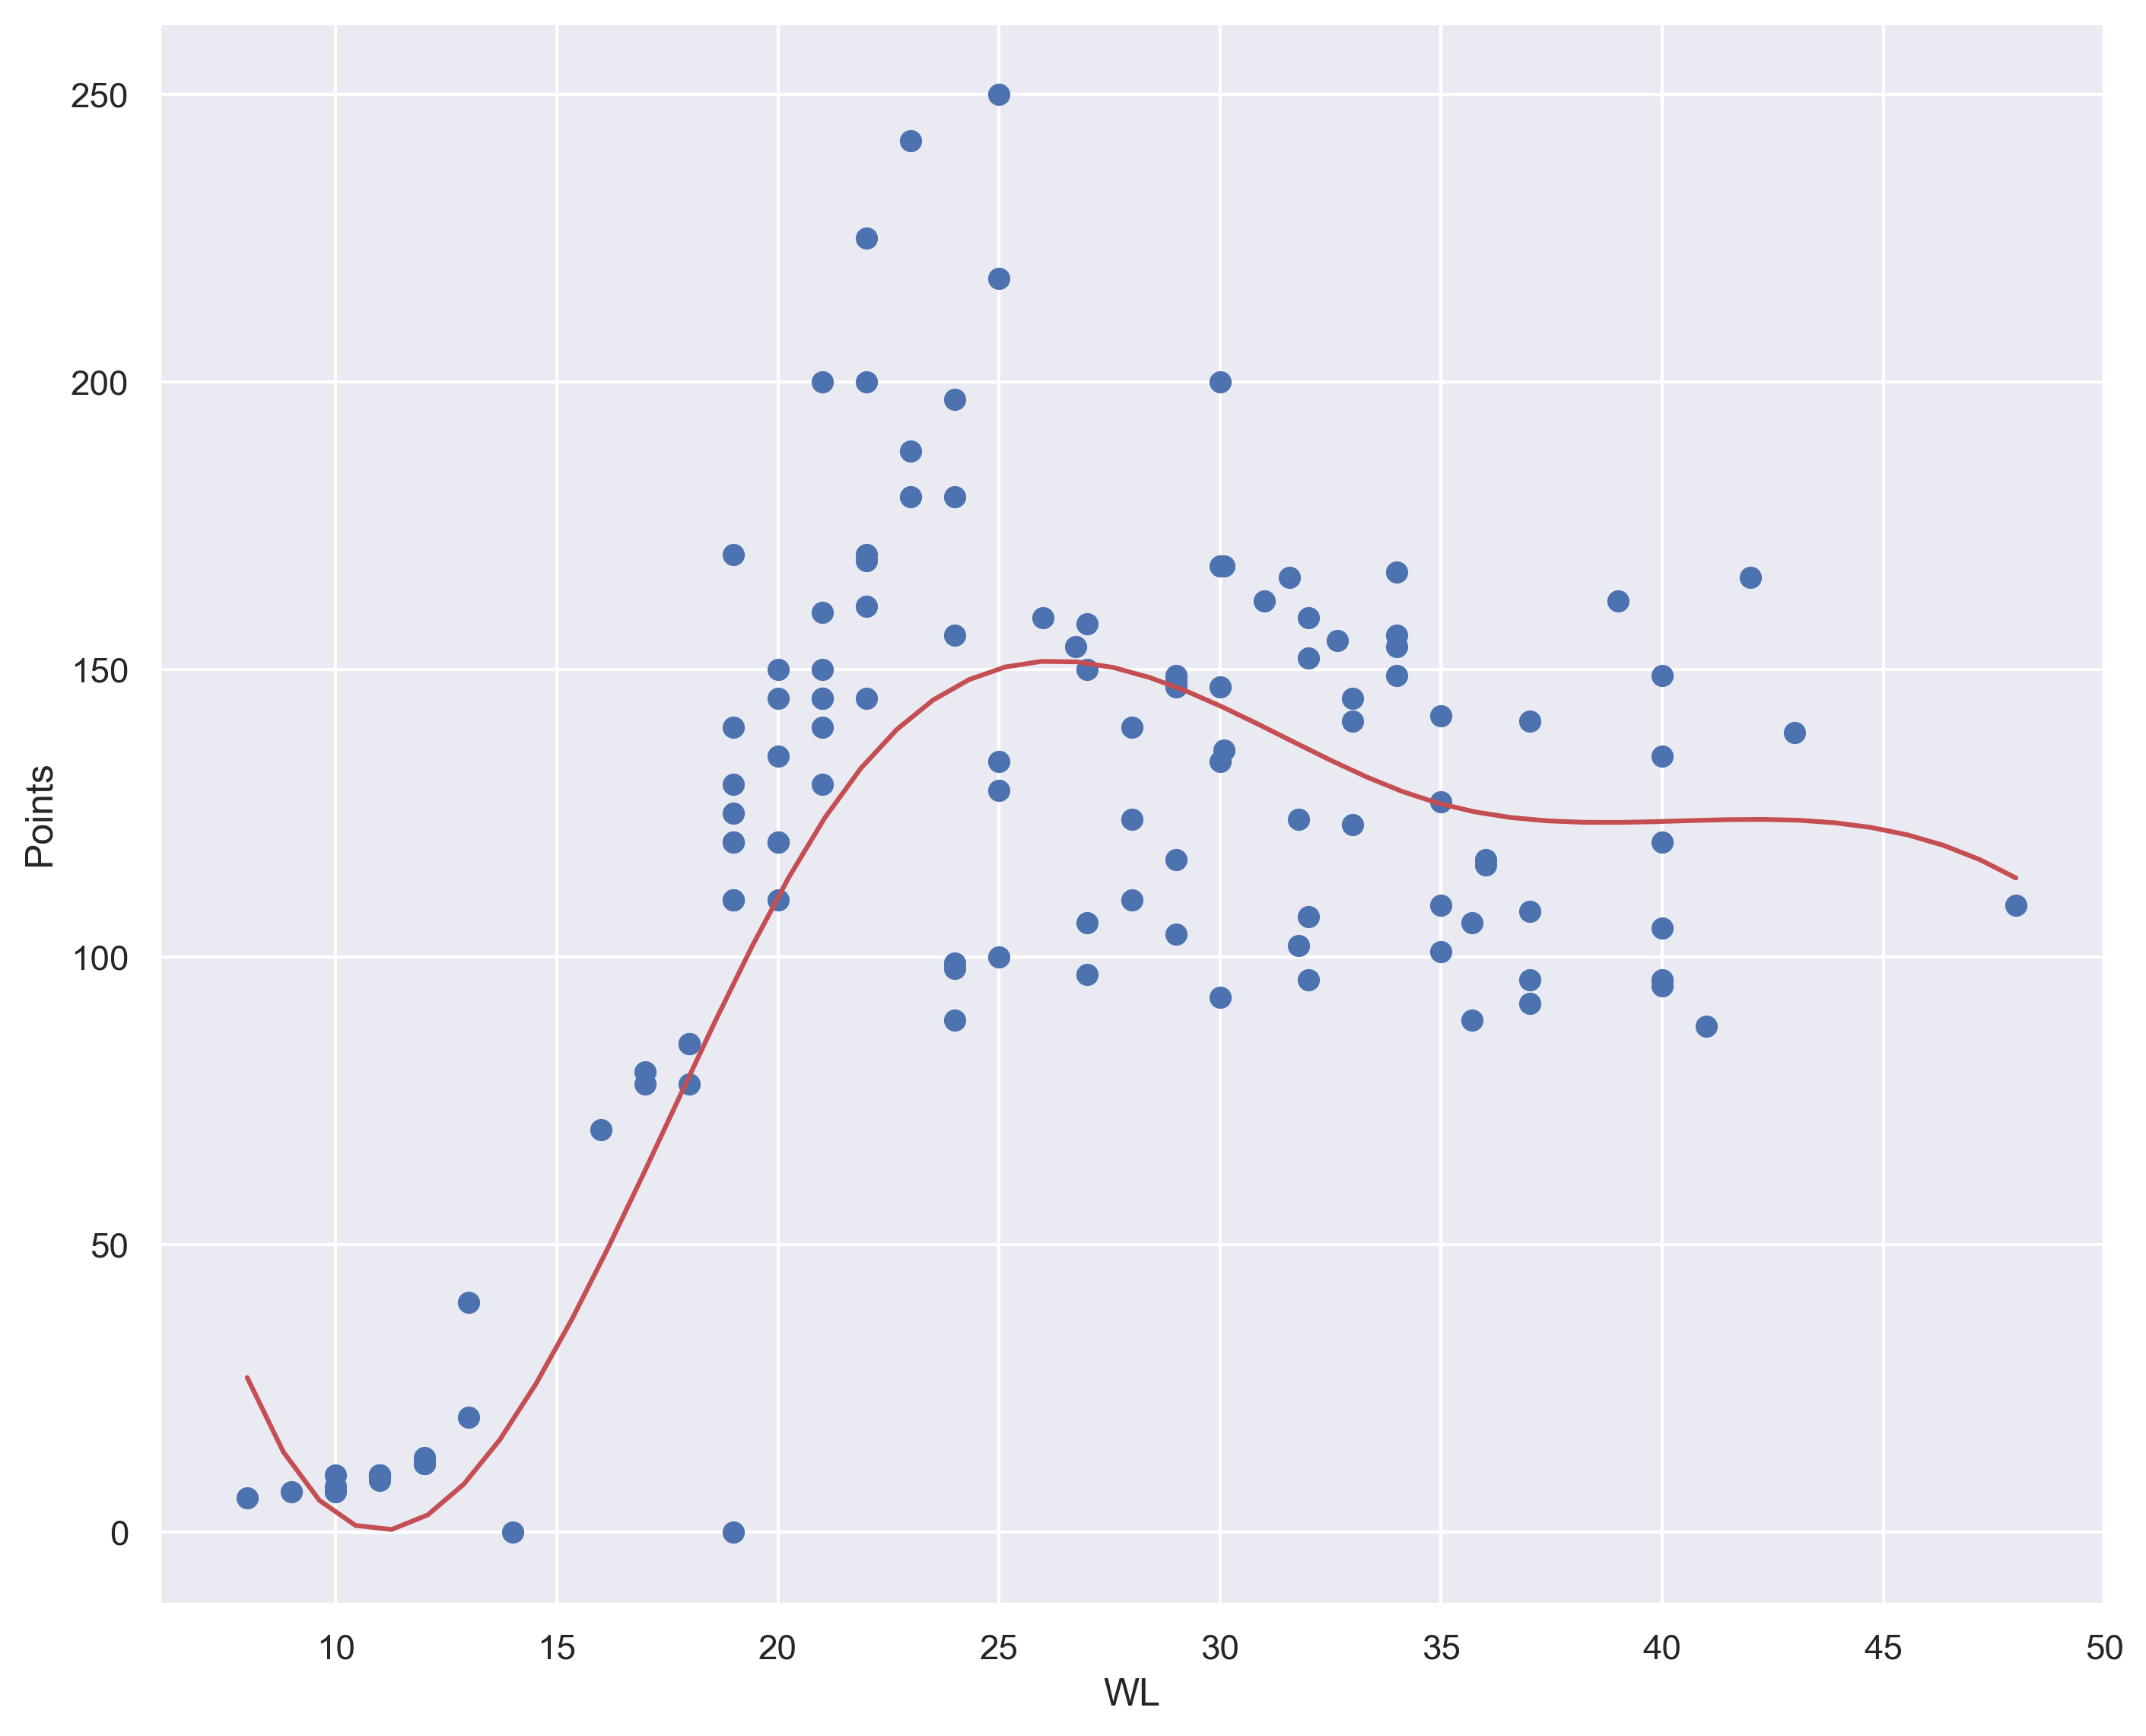

In [248]:
sns.set(rc={'figure.figsize':(11,9)})
plt.scatter(X_train_clean.WL,y_train,marker='o')
plt.plot(range_pred,prediction,color='r',label='5 knots and 3 degrees')
plt.xlabel('WL')
plt.ylabel('Points')
plt.plot()

In [257]:
pip install csaps


In [258]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from csaps import csaps

np.random.seed(1234)
xdata = [np.linspace(-3, 8, 41), np.linspace(-2.5, 6.5, 31)]


i, j = np.meshgrid(*xdata, indexing='ij')


In [259]:
xdata

[array([-3.   , -2.725, -2.45 , -2.175, -1.9  , -1.625, -1.35 , -1.075,
        -0.8  , -0.525, -0.25 ,  0.025,  0.3  ,  0.575,  0.85 ,  1.125,
         1.4  ,  1.675,  1.95 ,  2.225,  2.5  ,  2.775,  3.05 ,  3.325,
         3.6  ,  3.875,  4.15 ,  4.425,  4.7  ,  4.975,  5.25 ,  5.525,
         5.8  ,  6.075,  6.35 ,  6.625,  6.9  ,  7.175,  7.45 ,  7.725,
         8.   ]),
 array([-2.5, -2.2, -1.9, -1.6, -1.3, -1. , -0.7, -0.4, -0.1,  0.2,  0.5,
         0.8,  1.1,  1.4,  1.7,  2. ,  2.3,  2.6,  2.9,  3.2,  3.5,  3.8,
         4.1,  4.4,  4.7,  5. ,  5.3,  5.6,  5.9,  6.2,  6.5])]

In [260]:
j

array([[-2.5, -2.2, -1.9, ...,  5.9,  6.2,  6.5],
       [-2.5, -2.2, -1.9, ...,  5.9,  6.2,  6.5],
       [-2.5, -2.2, -1.9, ...,  5.9,  6.2,  6.5],
       ...,
       [-2.5, -2.2, -1.9, ...,  5.9,  6.2,  6.5],
       [-2.5, -2.2, -1.9, ...,  5.9,  6.2,  6.5],
       [-2.5, -2.2, -1.9, ...,  5.9,  6.2,  6.5]])

In [261]:
#The purpose of this code is to create noisy data based on a mathematical function with two variables, 
# i and j. The first line defines the mathematical function, which appears to be a combination of exponential and 
#polynomial terms. The second line adds random noise to the data using NumPy's random.randn function, with a 
#standard deviation of 0.75.


ydata = (3 * (1 - j)**2. * np.exp(-(j**2) - (i + 1)**2)
         - 10 * (j / 5 - j**3 - i**5) * np.exp(-j**2 - i**2)
         - 1 / 3 * np.exp(-(j + 1)**2 - i**2))
ydata = ydata + (np.random.randn(*ydata.shape) * 0.75)

In [262]:
ydata_s = csaps(xdata, ydata, xdata, smooth=0.988)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


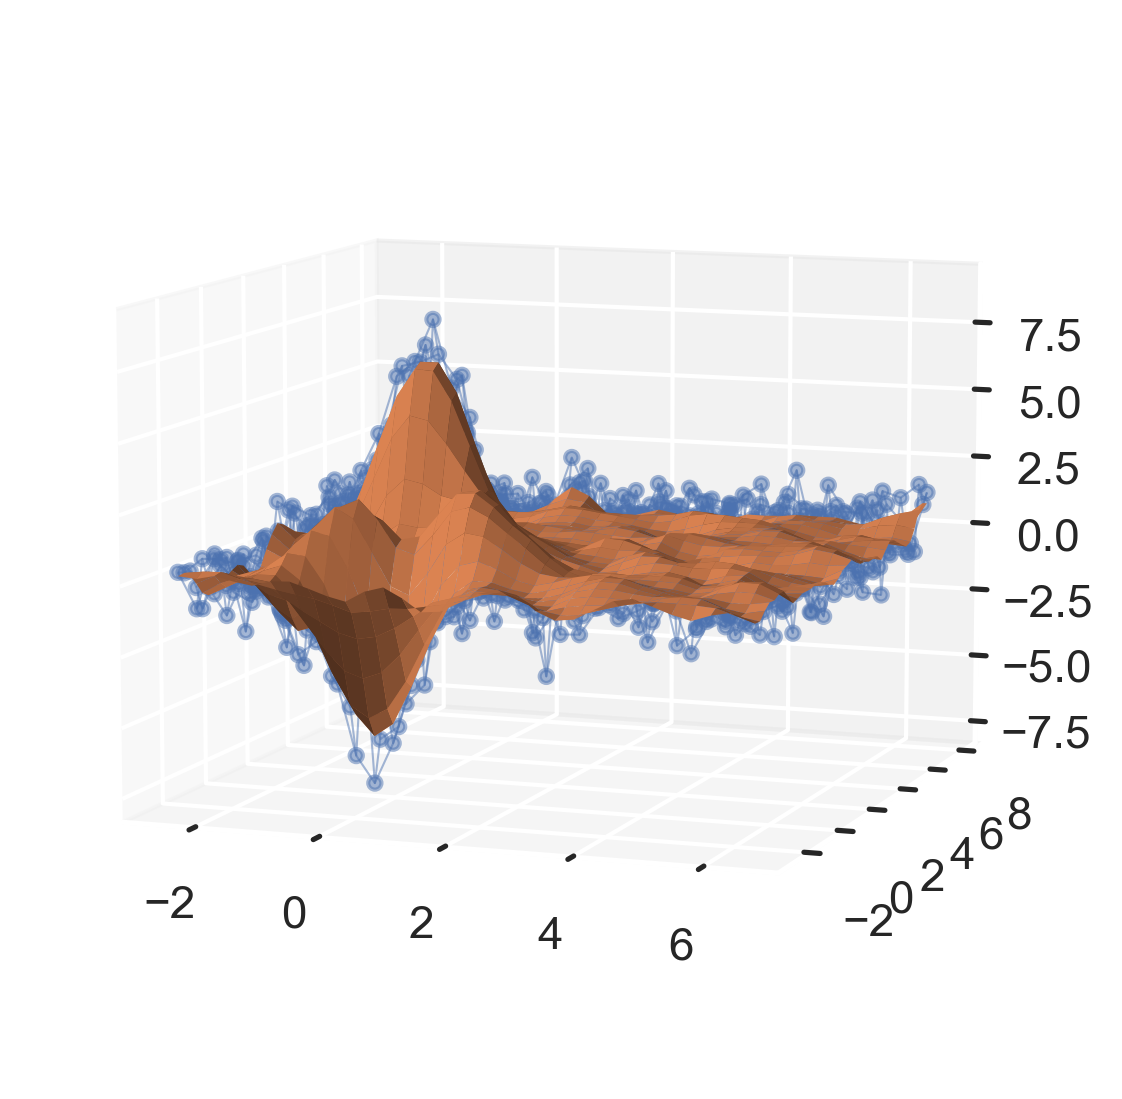

In [263]:
fig = plt.figure(figsize=(7, 4.5))
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('none')
c = [s['color'] for s in plt.rcParams['axes.prop_cycle']]
ax.plot_wireframe(j, i, ydata, linewidths=0.5, color=c[0], alpha=0.5)
ax.scatter(j, i, ydata, s=10, c=c[0], alpha=0.5)
ax.plot_surface(j, i, ydata_s, color=c[1], linewidth=0, alpha=1.0)
ax.view_init(elev=9., azim=290)

plt.show()

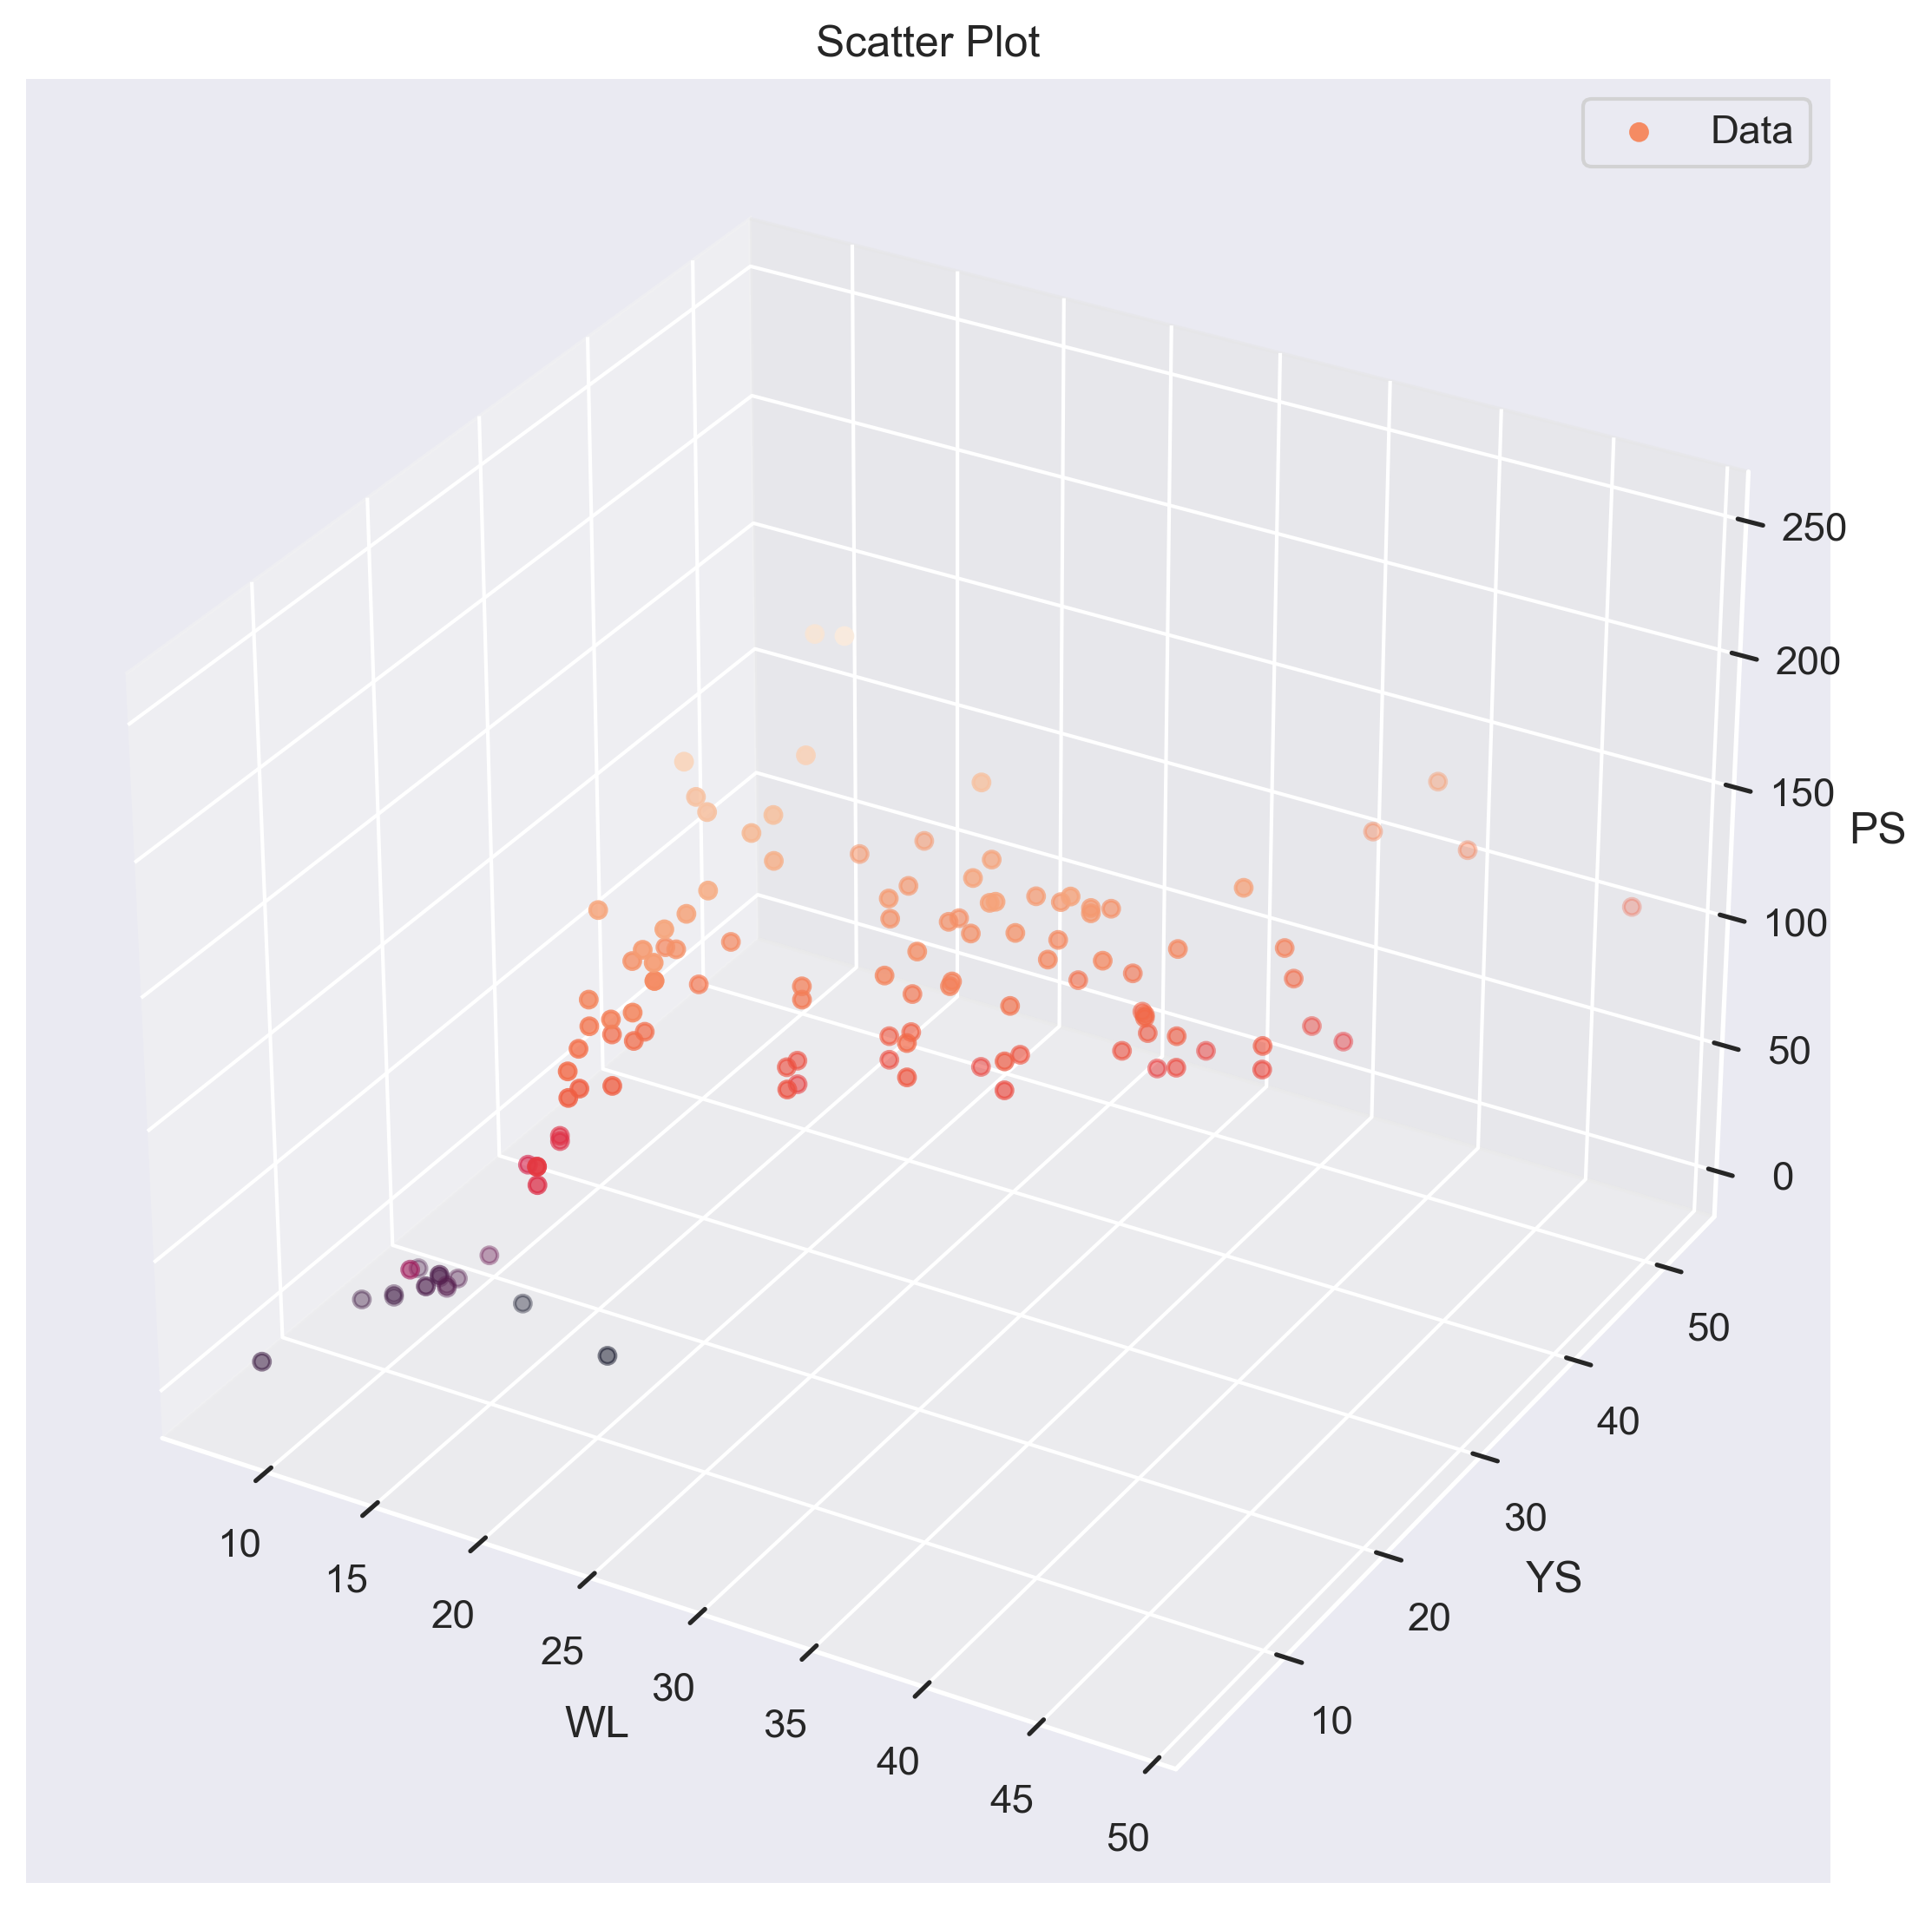

In [266]:
#Plot the data
fig1=plt.figure(figsize=(9,9))
ax=fig1.add_subplot(projection='3d')
ax.scatter(X_train_clean.WL,
           X_train_clean.YS,
           y_train,
           c=np.sqrt(y_train),
           label='Data')

ax.set_title('Scatter Plot')
ax.set_xlabel('WL')
ax.set_ylabel('YS')
ax.set_zlabel('PS')

plt.legend(loc='upper right')
plt.show()

In [267]:
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [268]:
spline_model=make_pipeline(SplineTransformer(n_knots=5,degree=3),LinearRegression())

In [269]:
spline_model.fit(X_train_clean[['WL','YS']],y_train)

Pipeline(steps=[('splinetransformer', SplineTransformer()),
                ('linearregression', LinearRegression())])

In [271]:
spline_model.predict(X_train_clean[['WL','YS']])

array([141.97297064,   4.71740991, 174.22433905, 125.5607941 ,
       129.26987564, 127.0078078 , 125.52130628, 124.01004507,
       124.01004507, 140.83404417, 146.29029904,  85.0092693 ,
       157.47818847,   2.49205472, 123.40709968,   6.76367008,
       146.40487946, 138.63631815,  71.58978517, 130.69612978,
       136.33568531, 133.53917893, 151.47443414, 154.27329048,
       102.10146775, 118.53048712, 152.55513401, 155.09339527,
       121.34720179, 132.92817643, 125.5607941 , 127.29311217,
       154.35285395, 140.99826143, 129.26987564, 118.82806336,
       131.22514617,   9.3974993 , 131.78580775, 143.37536717,
       138.30581249, 160.08973936, 141.97297064,  18.76746365,
       110.34292306, 142.49725974, 161.52559988, 135.57565262,
       121.0401254 ,   4.94835424, 143.32693341, 147.44471813,
       123.40709968, 153.9638527 , 102.10146775, 174.2572093 ,
       125.22241553, 152.0082127 , 148.49890824, 135.57565262,
        12.10369065, 125.22241553, 136.06898346, 108.64

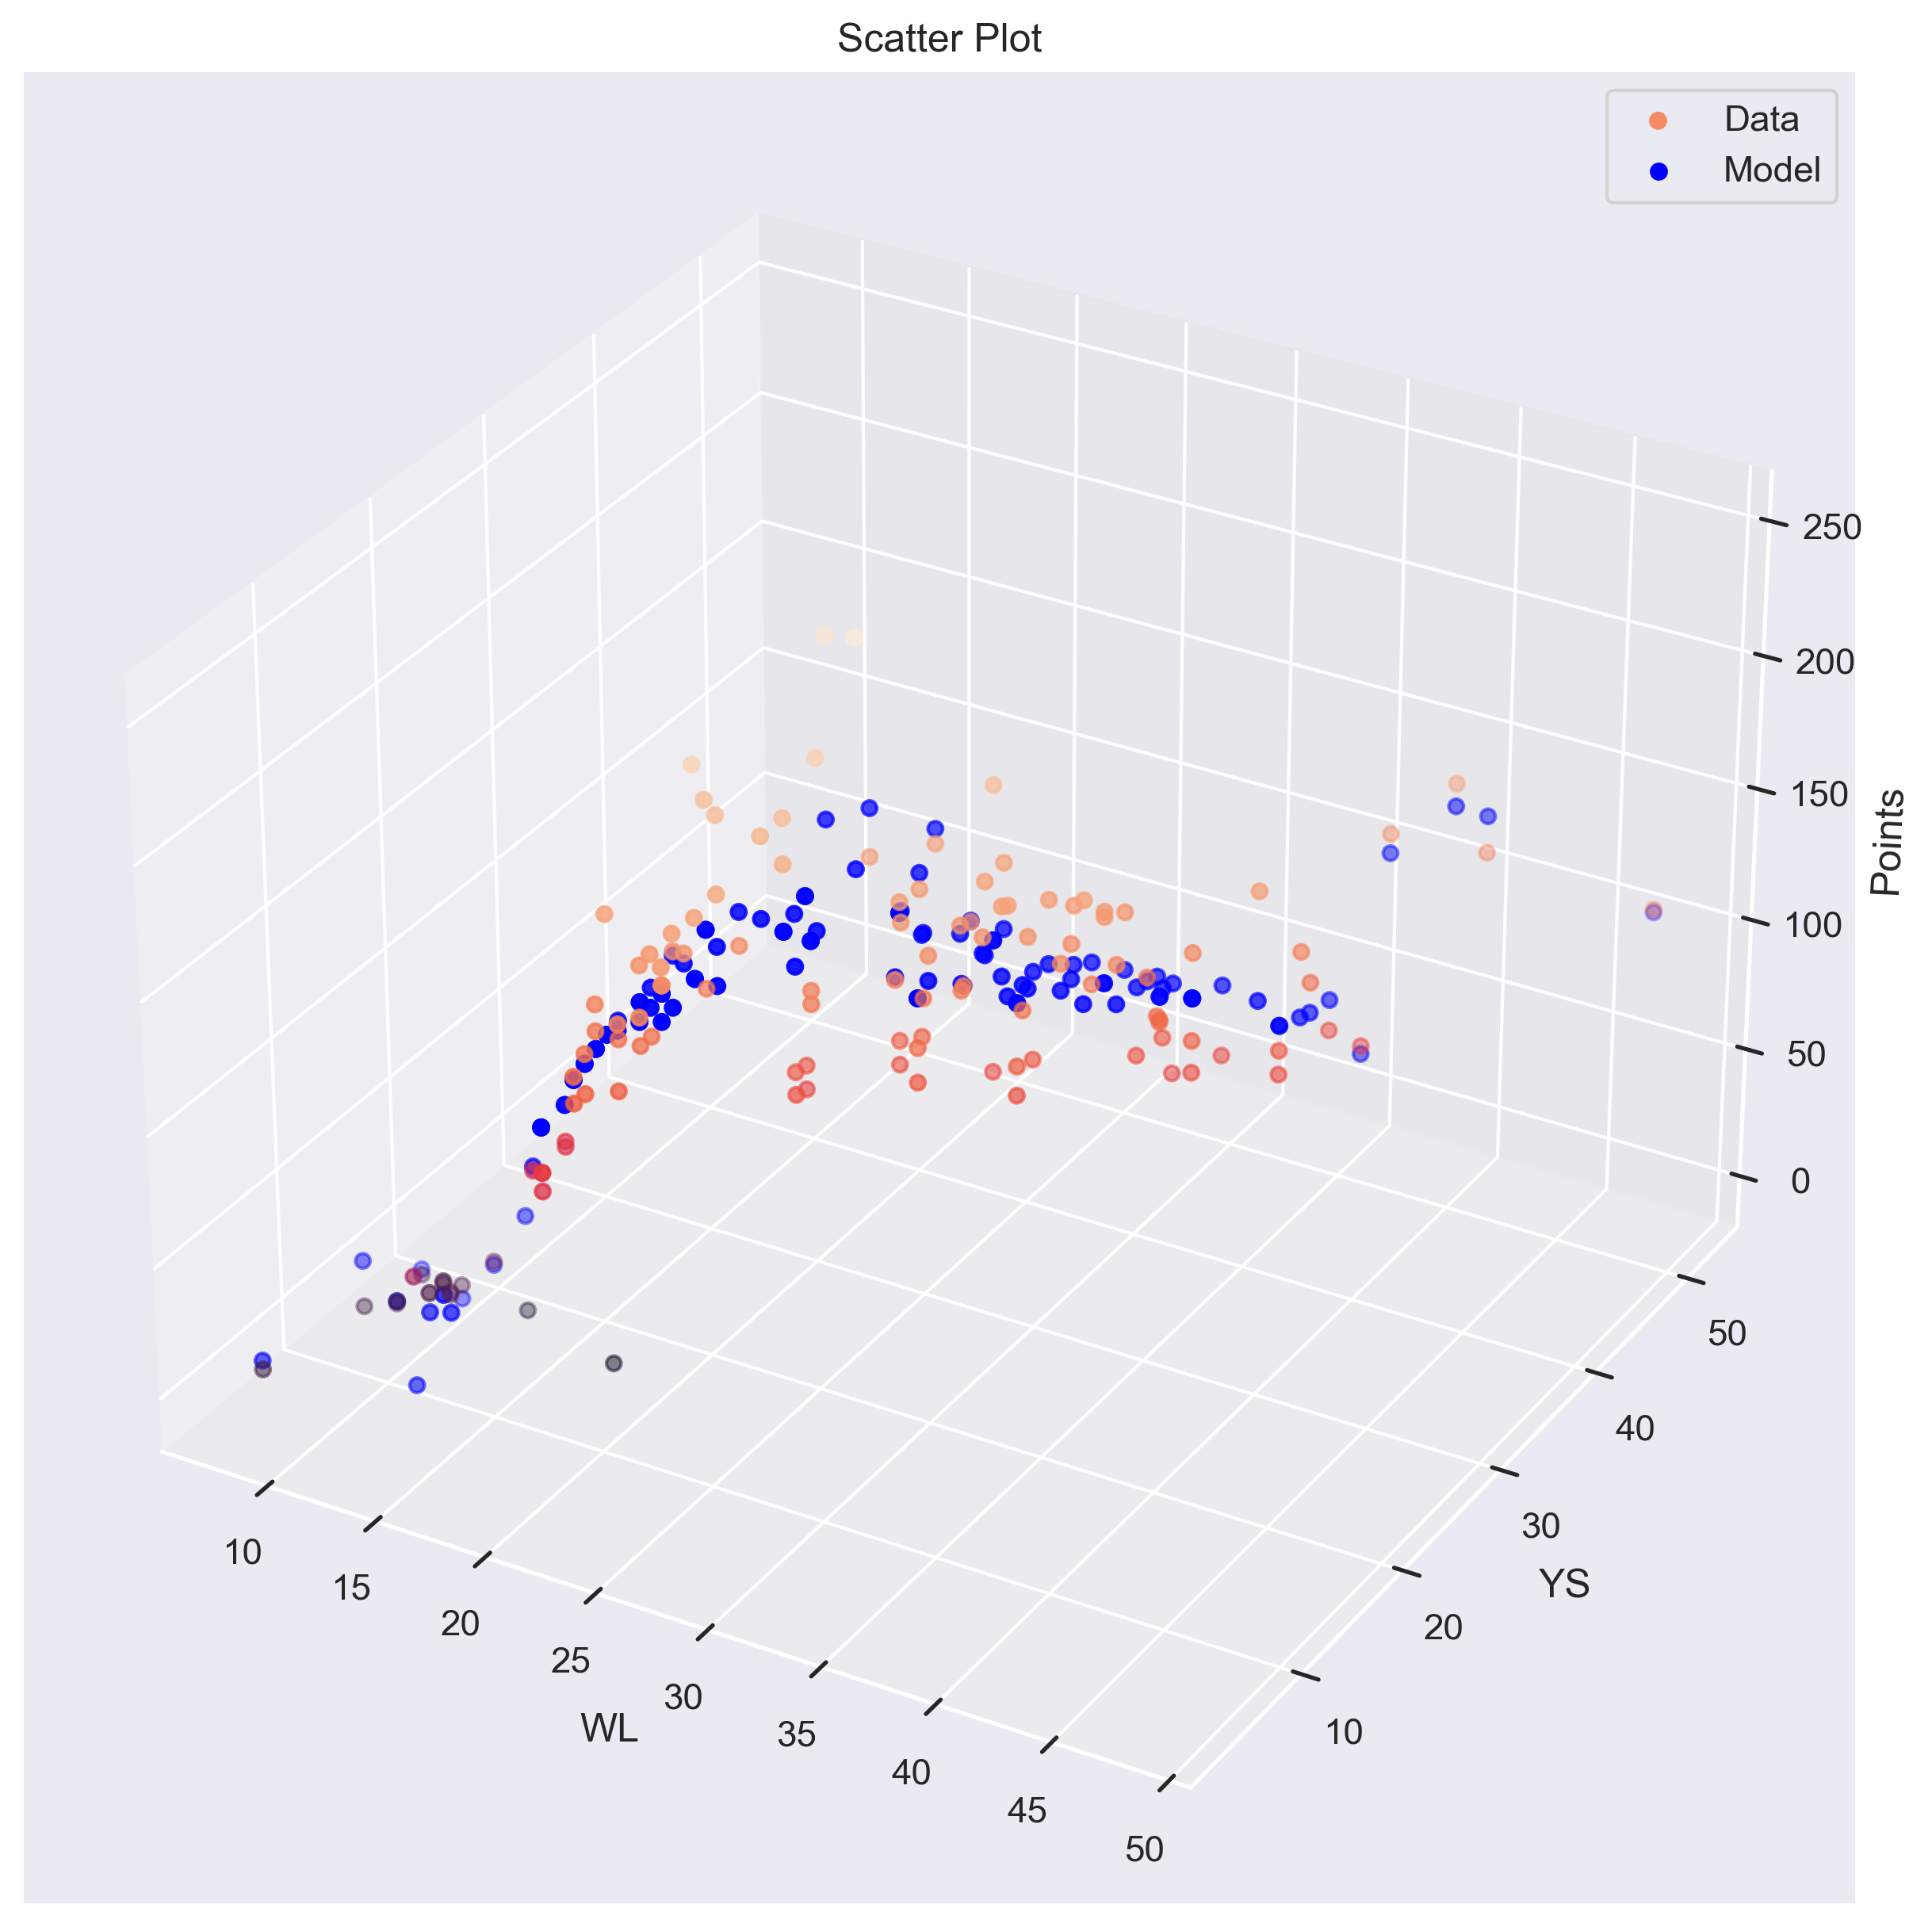

In [273]:
#Plot the data
fig2=plt.figure(figsize=(10,10))
ax=fig2.add_subplot(projection='3d')
ax.scatter(X_train_clean.WL,
           X_train_clean.YS,
           y_train,
           c=np.sqrt(y_train),
           label='Data')

ax.scatter(X_train_clean.WL,
           X_train_clean.YS,
           spline_model.predict(X_train_clean[['WL','YS']]),
           c='blue',
           label='Model')

ax.set_title('Scatter Plot')
ax.set_xlabel('WL')
ax.set_ylabel('YS')
ax.set_zlabel('Points')

plt.legend(loc='upper right')

ax=plt.gca()

plt.show()

In [275]:
y_pred=spline_model.predict(test[['WL','YS']])

In [276]:
y_pred

array([ 97.72928181,  69.52988727, 157.43735554,  -8.37440938,
       144.95764181, 111.68885735, 117.23815641, 127.3736898 ,
       134.55029304, 125.22118938, 146.20948685,  19.21311143,
       146.02984854, 132.37710518,   7.5256152 , 120.50736339,
       173.39466539, 135.11818432, 124.48503909,  27.02678457,
       131.22514617, 107.9793504 ,  92.05180867, 107.81364361,
       125.22241553,  73.40510101, 124.37047903,  19.21311143,
       146.29029904, 111.68885735, 159.96269996, 143.94309782])

In [277]:
rmse_test=np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse_test)
print(r2_score(y_test,y_pred))

32.21757175966753
0.4854637185881905


In [ ]:
###Points which are bugging us:

#1) Too many models -Answer
#2) Keeping track of metrics- Answer
#3) Splines cant be viewed in more than 3 dimensions --> No solution
#4) How do you know which spline is fitting the data best? -> Solve

In [279]:
#Let us jet off to Mars! 
#Multivariate adaptive regression splines

In [327]:
print(model.summary())


                    Breakpoint Regression Results                     
No. Observations                      124
No. Model Parameters                   12
Degrees of Freedom                    112
Res. Sum of Squares               99965.4
Total Sum of Squares          3.66284e+05
R Squared                        0.727082
Adjusted R Squared               0.697578
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const               -12.4615         56.1     -0.22218         0.825      -123.59       98.668
alpha1               2.15385          5.0      0.43106         0.667      -7.7463       12.054
beta1                18.0387         5.96       3.0286             -       6.2376        29.84
beta2               -30.3143         4.98      -6.0862             -      -40.183      -20.446
beta3            

In [329]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4854637185881905

In [330]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test, y_pred)))

32.21757175966753


The data shows an array of 31 numbers that are the predicted values of a model for a certain set of inputs. The RMSE (root mean squared error) of the model is 32.22, which means that on average, the predicted values are off by 32.22 units from the actual values. The R-squared score of the model is 0.485, which indicates that the model explains 48.5% of the variance in the data.

The model used to generate these predictions is a multivariate adaptive regression spline (MARS) model, which involves fitting a series of piecewise linear regressions on different segments of the data. The output of the model is a set of linear equations with different slopes for each segment of the data. The breakpoints and slopes of each segment are estimated from the data using the MARS algorithm.

Based on these findings, it seems that the MARS model does not fit the data very well, as indicated by the relatively high RMSE and low R-squared score. This suggests that other models or approaches may be needed to better explain the relationships between the input and output variables. However, without additional context about the specific problem being studied, it is difficult to make a concrete recommendation for an alternative approach.